In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_excel("data.xlsx")
df["prod"] = (df["cnt_call"]+ df["cnt_chat"])/(df["dlg_time_call"] + df["dlg_time_chat"])
average_work_time = df.groupby('skill_group')['skill_group_exp'].mean().rename('average_work_time')
data = df.join(average_work_time, on='skill_group')
df["awerage_work_time"] = data["average_work_time"]
df.head()


KeyboardInterrupt: 

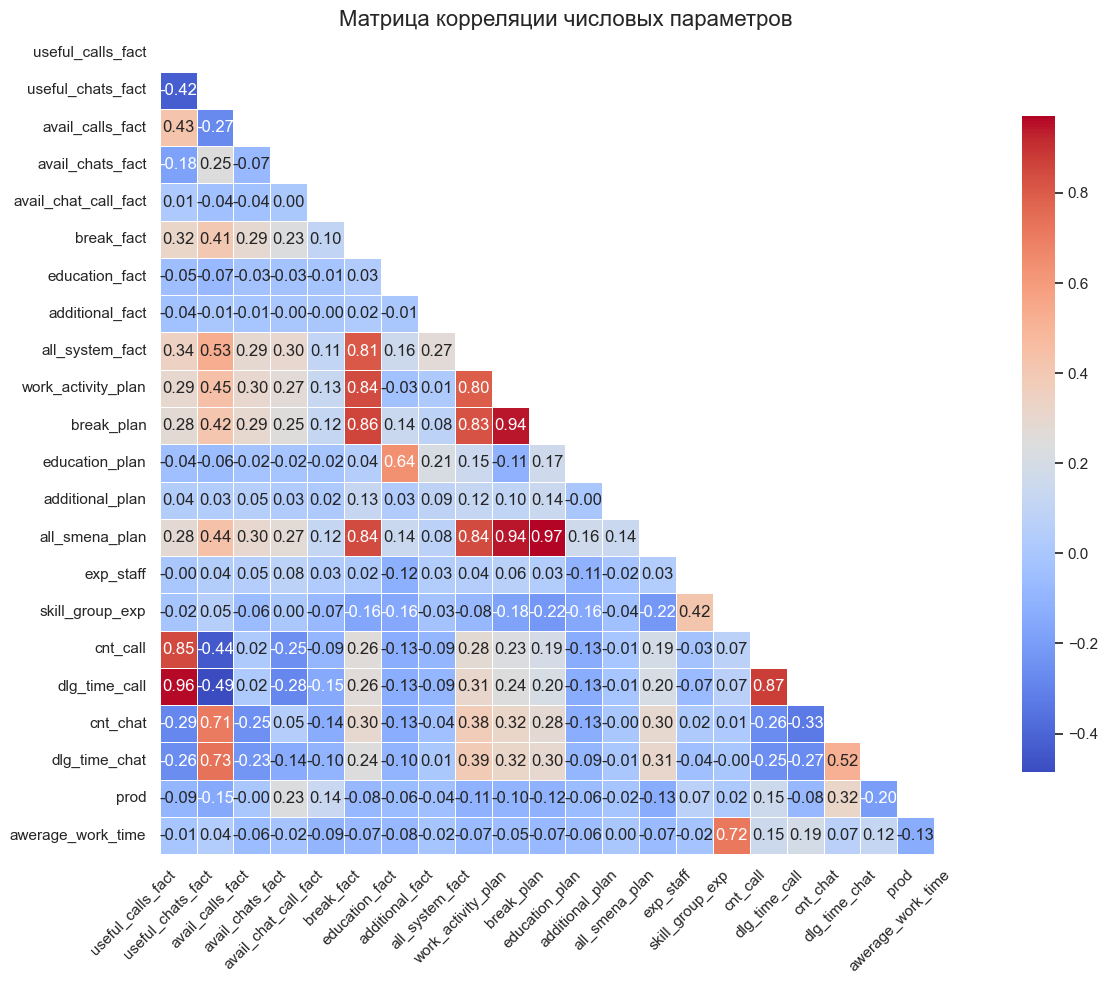

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Визуализация
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

# Используем heatmap из seaborn для лучшей визуализации
import seaborn as sns
sns.set_theme(style="white")
sns.heatmap(corr_matrix, 
            annot=True,  # Показывать значения
            fmt='.2f',   # Формат значений (2 знака после запятой)
            cmap='coolwarm',  # Цветовая схема
            mask=mask,   # Применяем маску для отображения только нижнего треугольника
            linewidths=0.5,  # Ширина линий между ячейками
            cbar_kws={"shrink": .8})  # Настройка цветовой шкалы

plt.title('Матрица корреляции числовых параметров', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Предполагается, что у вас уже есть DataFrame с данными
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Находим пары переменных с корреляцией > 0.7 (по модулю)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Начинаем с i+1, чтобы избежать дублирования и диагонали
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Выводим количество найденных пар
print(f"Найдено {len(high_corr_pairs)} пар переменных с корреляцией > 0.7")

# Строим графики для каждой пары с высокой корреляцией
if high_corr_pairs:
    # Определяем количество строк и столбцов для сетки графиков
    n_plots = len(high_corr_pairs)
    n_cols = 2  # Можно изменить по желанию
    n_rows = (n_plots + n_cols - 1) // n_cols  # Округление вверх
    
    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_plots == 1:
        axes = np.array([axes])  # Преобразуем в массив, если только один график
    axes = axes.flatten()  # Преобразуем в одномерный массив для удобства
    
    # Строим графики
    for i, (var1, var2, corr_value) in enumerate(high_corr_pairs):
        if i < len(axes):
            ax = axes[i]
            
            # Строим scatter plot
            sns.regplot(x=var1, y=var2, data=numeric_columns, ax=ax, scatter_kws={'alpha':0.5})
            
            # Добавляем заголовок с информацией о корреляции
            corr_sign = "+" if corr_value > 0 else "-"
            ax.set_title(f"{var1} vs {var2}\nКорреляция: {corr_value:.2f} ({corr_sign})", fontsize=12)
            
            # Улучшаем внешний вид
            #ax.grid(True, linestyle='--', alpha=0.7)
    
    # Скрываем пустые подграфики, если они есть
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("Нет пар переменных с корреляцией выше 0.7")


KeyboardInterrupt: 

C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\1835816592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["emp_type"].fillna("Неизвестно", inplace=True)


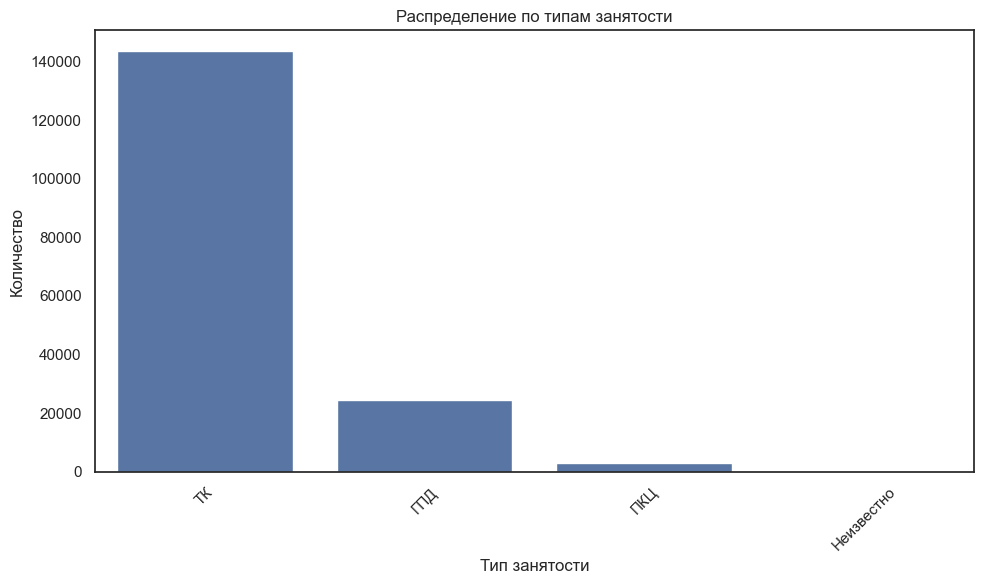

In [ ]:
# Заполняем пропущенные значения строкой "Неизвестно"
df["emp_type"].fillna("Неизвестно", inplace=True)
# Используем countplot вместо barplot - он автоматически считает количество
plt.figure(figsize=(10, 6))
sns.countplot(x="emp_type", data=df)
plt.title("Распределение по типам занятости")
plt.xlabel("Тип занятости")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Статистика до очистки:
Минимум: 0.0, Максимум: inf
Среднее: inf, Медиана: 0.9601267281105991
Количество записей: 170774
Количество пропущенных значений: 30130

Границы для определения выбросов:
Нижняя граница: -4.853368055555556
Верхняя граница: 10.1296875

Статистика после очистки:
Минимум: 0.0, Максимум: 1.0
Среднее: 0.7498920101890728, Медиана: 0.828695652173913
Количество записей: 87417
Удалено записей: 83357


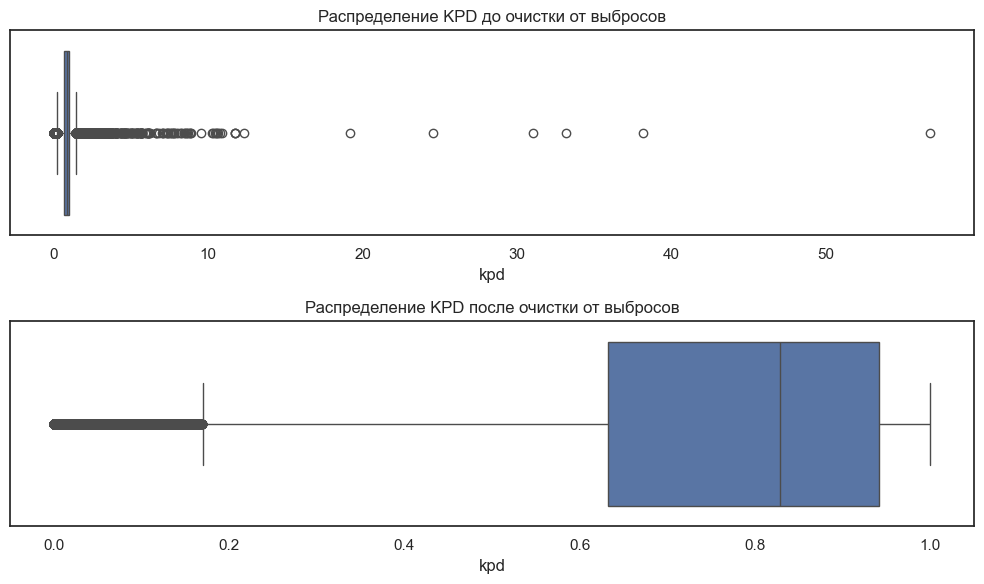

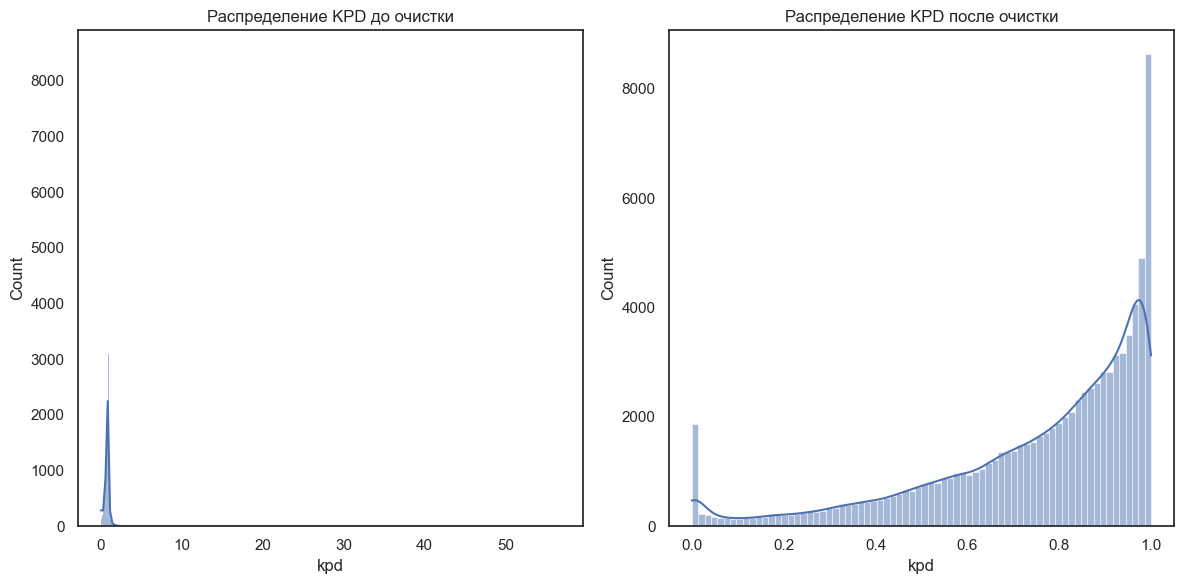

In [ ]:
df["kpd"] = (df["useful_calls_fact"]+ df["useful_chats_fact"]) / (df["work_activity_plan"])


# Сначала посмотрим на распределение значений до очистки
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df["kpd"])
plt.title("Распределение KPD до очистки от выбросов")

# Вычисляем квартили и IQR
Q1 = df["kpd"].quantile(0.25)
Q3 = df["kpd"].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Статистика до очистки:")
print(f"Минимум: {df['kpd'].min()}, Максимум: {df['kpd'].max()}")
print(f"Среднее: {df['kpd'].mean()}, Медиана: {df['kpd'].median()}")
print(f"Количество записей: {len(df['kpd'])}")
print(f"Количество пропущенных значений: {df['kpd'].isna().sum()}")
print("\nГраницы для определения выбросов:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

# Создаем новый DataFrame без выбросов
df_cleaned = df.copy()
df_cleaned = df_cleaned[(df_cleaned["kpd"] >= 0) & (df_cleaned["kpd"] <= 1)]

# Альтернативно, можно заменить выбросы на границы
# df_cleaned["kpd"] = df["kpd"].clip(lower=lower_bound, upper=upper_bound)

print(f"\nСтатистика после очистки:")
print(f"Минимум: {df_cleaned['kpd'].min()}, Максимум: {df_cleaned['kpd'].max()}")
print(f"Среднее: {df_cleaned['kpd'].mean()}, Медиана: {df_cleaned['kpd'].median()}")
print(f"Количество записей: {len(df_cleaned['kpd'])}")
print(f"Удалено записей: {len(df) - len(df_cleaned)}")

# Визуализируем результат после очистки
plt.subplot(2, 1, 2)
sns.boxplot(x=df_cleaned["kpd"])
plt.title("Распределение KPD после очистки от выбросов")
plt.tight_layout()
plt.show()

# Гистограмма до и после очистки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["kpd"], kde=True)
plt.title("Распределение KPD до очистки")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["kpd"], kde=True)
plt.title("Распределение KPD после очистки")
plt.tight_layout()
plt.show()


Тип данных в столбце 'grafik': object
Уникальные значения: ['5/2' '2/2' '4' 'ГПД' 'Ночь' 'Нет графика' 'ПКЦ' '35 часов' '36 часов']
Количество пропущенных значений: 0


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\2067518458.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["grafik"].fillna("Не указано", inplace=True)


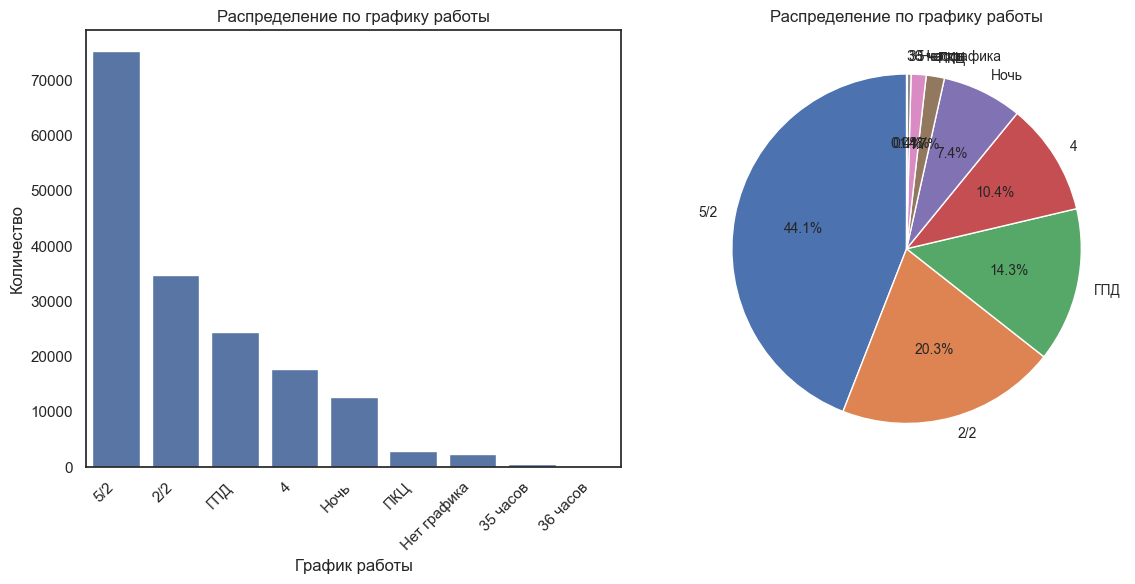

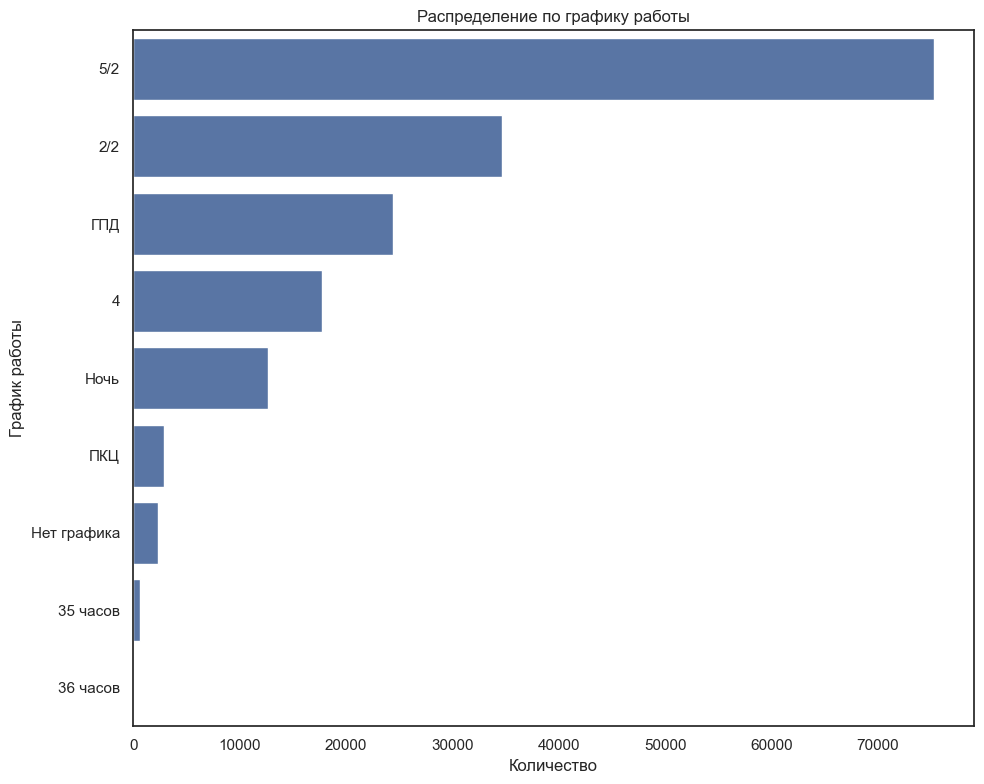

In [ ]:
# Проверяем тип данных и уникальные значения
print(f"Тип данных в столбце 'grafik': {df['grafik'].dtype}")
print(f"Уникальные значения: {df['grafik'].unique()}")
print(f"Количество пропущенных значений: {df['grafik'].isna().sum()}")

# Заполняем пропущенные значения, если они есть
df["grafik"].fillna("Не указано", inplace=True)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))

# Вариант 1: Столбчатая диаграмма
plt.subplot(1, 2, 1)
counts = df["grafik"].value_counts().sort_values(ascending=False)
sns.barplot(x=counts.index, y=counts.values)
plt.title("Распределение по графику работы")
plt.xlabel("График работы")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha='right')

# Вариант 2: Круговая диаграмма
plt.subplot(1, 2, 2)
df["grafik"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                     wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                     textprops={'fontsize': 10})
plt.title("Распределение по графику работы")
plt.ylabel("")  # Убираем метку оси Y для круговой диаграммы

plt.tight_layout()
plt.show()

# Дополнительно: Горизонтальная столбчатая диаграмма для лучшей читаемости длинных названий
plt.figure(figsize=(10, 8))
sns.countplot(y="grafik", data=df, order=df["grafik"].value_counts().index)
plt.title("Распределение по графику работы")
plt.xlabel("Количество")
plt.ylabel("График работы")
plt.tight_layout()
plt.show()


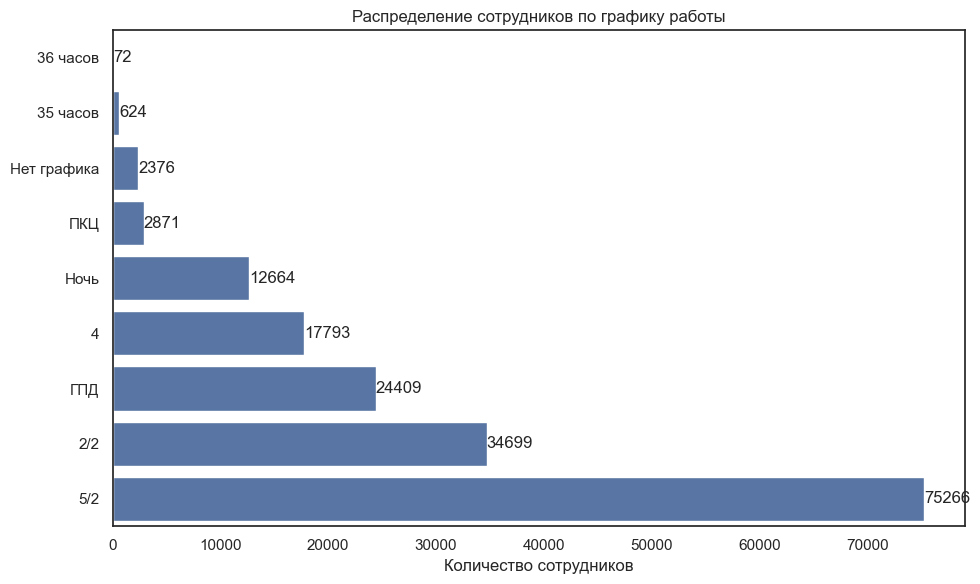

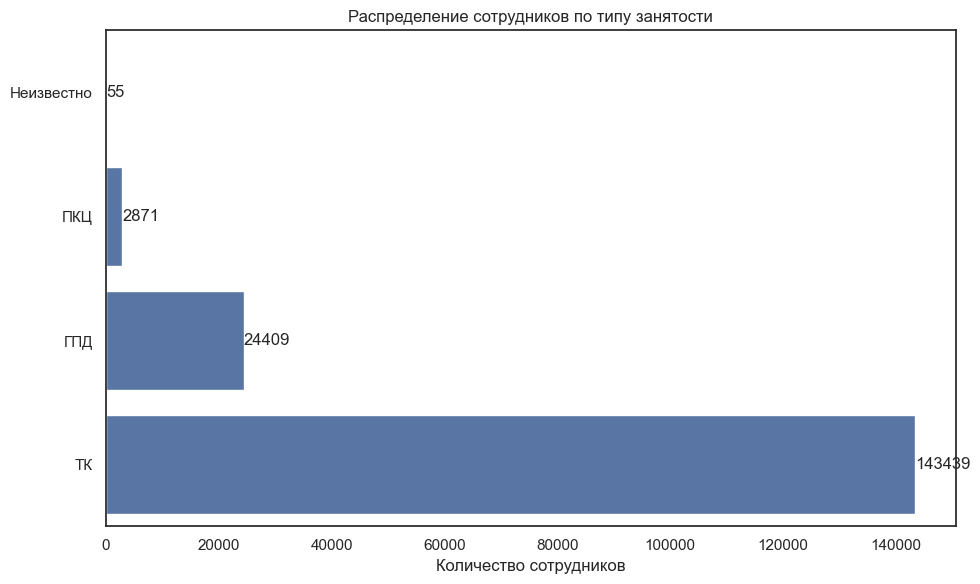

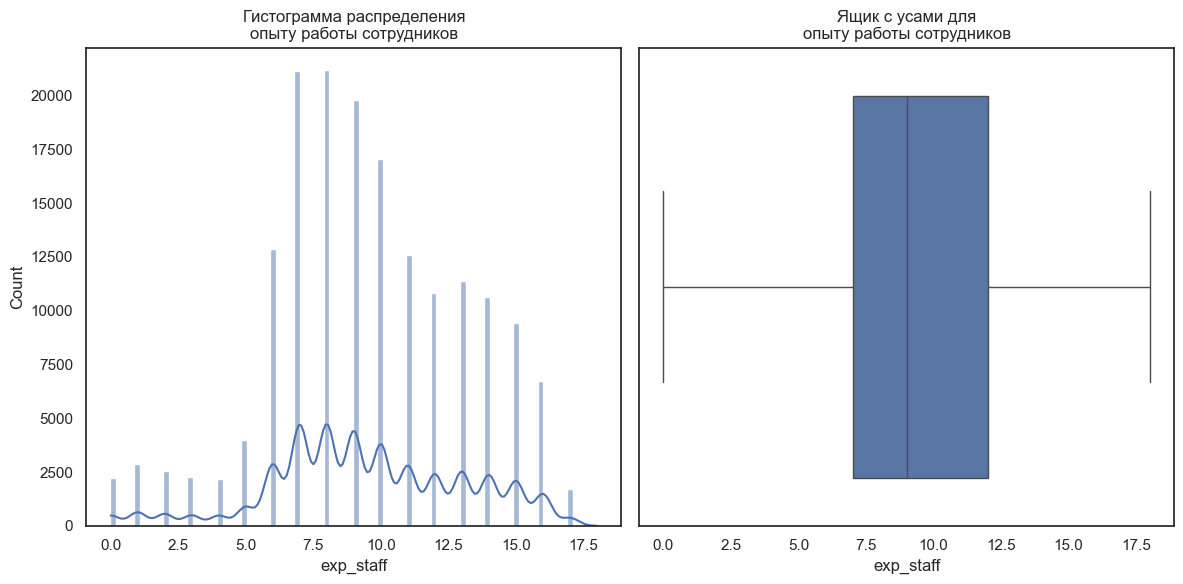

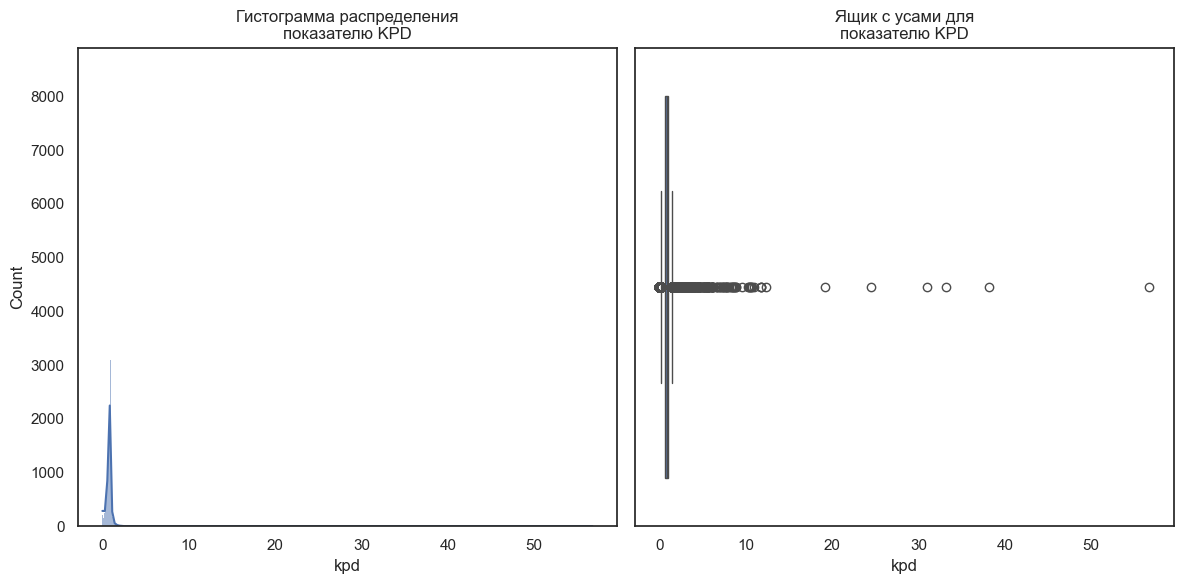

In [ ]:
# Создаем функцию для построения графиков распределения категориальных переменных
def plot_categorical_distribution(df, column_name, title=None, figsize=(10, 6), limit=10):
    if column_name not in df.columns:
        print(f"Столбец '{column_name}' не найден в DataFrame")
        return
    
    # Заполняем пропущенные значения
    temp_df = df.copy()
    temp_df[column_name] = temp_df[column_name].fillna("Не указано")
    
    # Получаем топ-N категорий (если их много)
    value_counts = temp_df[column_name].value_counts()
    if len(value_counts) > limit:
        top_categories = value_counts.nlargest(limit-1).index.tolist()
        temp_df[column_name] = temp_df[column_name].apply(
            lambda x: x if x in top_categories else "Другие")
    
    # Строим график
    plt.figure(figsize=figsize)
    
    # Горизонтальная столбчатая диаграмма
    counts = temp_df[column_name].value_counts().sort_values(ascending=True)
    ax = sns.barplot(y=counts.index, x=counts.values)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(counts.values):
        ax.text(v + 0.1, i, str(v), va='center')
    
    # Настраиваем график
    plt.title(title or f"Распределение сотрудников по {column_name}")
    plt.xlabel("Количество сотрудников")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# Создаем функцию для построения графиков распределения числовых переменных
def plot_numerical_distribution(df, column_name, title=None, figsize=(12, 6)):
    if column_name not in df.columns:
        print(f"Столбец '{column_name}' не найден в DataFrame")
        return
    
    # Проверяем тип данных
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Столбец '{column_name}' не является числовым")
        return
    
    # Строим график
    plt.figure(figsize=figsize)
    
    # Гистограмма с кривой плотности
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name].dropna(), kde=True)
    plt.title(f"Гистограмма распределения\n{title or column_name}")
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name].dropna())
    plt.title(f"Ящик с усами для\n{title or column_name}")
    
    plt.tight_layout()
    plt.show()

# Предполагаемые столбцы для анализа распределения сотрудников
# Замените их на реальные столбцы из вашего DataFrame

# 1. Распределение по должностям (если есть столбец с должностями)
if 'position' in df.columns:
    plot_categorical_distribution(df, 'position', "Распределение сотрудников по должностям")
elif 'job_title' in df.columns:
    plot_categorical_distribution(df, 'job_title', "Распределение сотрудников по должностям")
elif 'title' in df.columns:
    plot_categorical_distribution(df, 'title', "Распределение сотрудников по должностям")

# 2. Распределение по отделам (если есть столбец с отделами)
if 'department' in df.columns:
    plot_categorical_distribution(df, 'department', "Распределение сотрудников по отделам")
elif 'dept' in df.columns:
    plot_categorical_distribution(df, 'dept', "Распределение сотрудников по отделам")

# 3. Распределение по графику работы
if 'grafik' in df.columns:
    plot_categorical_distribution(df, 'grafik', "Распределение сотрудников по графику работы")

# 4. Распределение по типу занятости
if 'emp_type' in df.columns:
    plot_categorical_distribution(df, 'emp_type', "Распределение сотрудников по типу занятости")

# 5. Распределение по опыту работы
if 'exp_staff' in df.columns:
    plot_numerical_distribution(df, 'exp_staff', "опыту работы сотрудников")
elif 'experience' in df.columns:
    plot_numerical_distribution(df, 'experience', "опыту работы сотрудников")

# 6. Распределение по возрасту (если есть)
if 'age' in df.columns:
    plot_numerical_distribution(df, 'age', "возрасту сотрудников")

# 7. Распределение по KPD
if 'kpd' in df.columns:
    plot_numerical_distribution(df, 'kpd', "показателю KPD")
if 'another_kpd' in df.columns:
    plot_numerical_distribution(df, 'another_kpd', "показателю another_KPD")

# 8. Круговая диаграмма для небольшого числа категорий (например, пол)
if 'gender' in df.columns:
    plt.figure(figsize=(8, 8))
    df['gender'].fillna('Не указано').value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    plt.title("Распределение сотрудников по полу")
    plt.ylabel("")
    plt.show()


Столбец 'training_time' не найден в DataFrame.
Доступные столбцы: ['calendar_dt', 'id_employee', 'useful_calls_fact', 'useful_chats_fact', 'avail_calls_fact', 'avail_chats_fact', 'avail_chat_call_fact', 'break_fact', 'education_fact', 'additional_fact', 'all_system_fact', 'work_activity_plan', 'break_plan', 'education_plan', 'additional_plan', 'all_smena_plan', 'business_line', 'napravlenie', 'grid_group', 'skill_group', 'emp_type', 'hire_dt', 'exp_staff', 'gender_desc', 'skill_group_exp', 'planning_group_nm', 'residential_district_nm', 'residential_city_nm', 'residential_state_nm', 'residential_settlement_nm', 'grafik', 'cnt_call', 'dlg_time_call', 'cnt_chat', 'dlg_time_chat', 'kpd']
Возможно, вы имели в виду один из этих столбцов: ['education_fact', 'education_plan']
Используем столбец 'education_fact' для времени обучения
Количество строк для построения графика: 170719


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\2921809482.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['exp_category'] = plot_df['exp_staff'].round().astype(int)


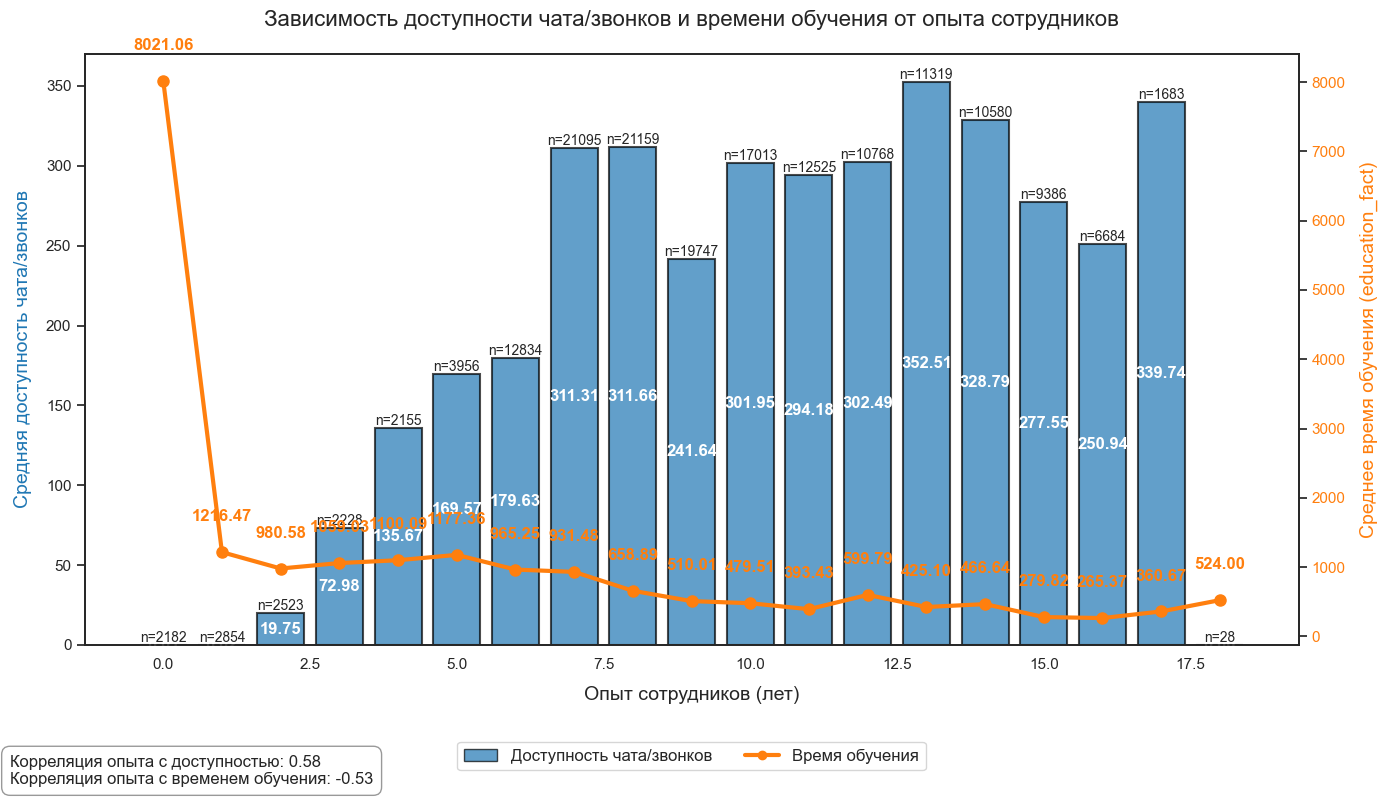

C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\2921809482.py:112: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = plot_df.pivot_table(


<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Предполагаем, что столбец с временем обучения называется 'training_time'
# Если у вас другое название, замените его в коде
training_column = 'training_time'

# Проверяем наличие столбца с временем обучения
if training_column not in df.columns:
    print(f"Столбец '{training_column}' не найден в DataFrame.")
    print(f"Доступные столбцы: {df.columns.tolist()}")
    # Если столбца нет, попробуем найти похожий по названию
    possible_columns = [col for col in df.columns if 'train' in col.lower() or 'learn' in col.lower() or 'educ' in col.lower()]
    if possible_columns:
        print(f"Возможно, вы имели в виду один из этих столбцов: {possible_columns}")
        training_column = possible_columns[0]  # Берем первый подходящий
        print(f"Используем столбец '{training_column}' для времени обучения")
    else:
        print("Не найдено подходящих столбцов для времени обучения")
        # Создаем случайные данные для демонстрации
        df['training_time'] = np.random.uniform(1, 10, size=len(df))
        training_column = 'training_time'
        print("Созданы случайные данные для демонстрации")

# Удаляем строки с пропущенными значениями для всех трех столбцов
plot_df = df.dropna(subset=['exp_staff', 'avail_chat_call_fact', training_column])
print(f"Количество строк для построения графика: {len(plot_df)}")

# Создаем категории опыта для группировки
plot_df['exp_category'] = plot_df['exp_staff'].round().astype(int)

# Вычисляем средние значения для каждой категории опыта
grouped_data = plot_df.groupby('exp_category').agg({
    'avail_chat_call_fact': ['mean', 'count', 'std'],
    training_column: ['mean', 'std']
}).reset_index()

# Преобразуем мультииндексные столбцы в обычные
grouped_data.columns = ['exp_category', 'avg_availability', 'employees_count', 'std_availability', 
                        'avg_training_time', 'std_training_time']

# Отфильтруем группы с малым количеством сотрудников
min_employees = 3
filtered_data = grouped_data[grouped_data['employees_count'] >= min_employees]

# Создаем график с двумя осями Y
plt.figure(figsize=(14, 8))


# Основная ось Y для доступности чата/звонков
ax1 = plt.gca()
ax1.set_xlabel('Опыт сотрудников (лет)', fontsize=14, labelpad=10)
ax1.set_ylabel('Средняя доступность чата/звонков', fontsize=14, labelpad=10, color='#1f77b4')
ax1.tick_params(axis='y')

# Создаем столбчатую диаграмму для доступности
bars = ax1.bar(filtered_data['exp_category'], filtered_data['avg_availability'], 
               color='#1f77b4', alpha=0.7, edgecolor='black', linewidth=1.5)

# Добавляем значения на столбцы
for bar, value in zip(bars, filtered_data['avg_availability']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
            f"{value:.2f}", ha='center', va='center', color='white', fontweight='bold')

# Добавляем количество сотрудников над столбцами
for i, count in enumerate(filtered_data['employees_count']):
    ax1.text(i, filtered_data['avg_availability'].iloc[i] + 0.02, 
             f"n={count}", ha='center', va='bottom', fontsize=10)

# Вторая ось Y для времени обучения
ax2 = ax1.twinx()
ax2.set_ylabel(f'Среднее время обучения ({training_column})', fontsize=14, labelpad=10, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Линия для времени обучения
line = ax2.plot(filtered_data['exp_category'], filtered_data['avg_training_time'], 
                'o-', color='#ff7f0e', linewidth=3, markersize=8, label='Время обучения')

# Добавляем значения времени обучения
for i, value in enumerate(filtered_data['avg_training_time']):
    ax2.text(i, value + 0.05 * max(filtered_data['avg_training_time']), 
             f"{value:.2f}", ha='center', va='bottom', color='#ff7f0e', fontweight='bold')

# Добавляем заголовок
plt.title('Зависимость доступности чата/звонков и времени обучения от опыта сотрудников', 
          fontsize=16, pad=20)

# Добавляем легенду
bars_legend = plt.Rectangle((0, 0), 1, 1, fc='#1f77b4', alpha=0.7, edgecolor='black')
line_legend = plt.Line2D([0], [0], color='#ff7f0e', linewidth=3, marker='o')
ax1.legend([bars_legend, line_legend], ['Доступность чата/звонков', 'Время обучения'], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True, fontsize=12)

# Добавляем информацию о корреляции
corr_availability = np.corrcoef(filtered_data['exp_category'], filtered_data['avg_availability'])[0, 1]
corr_training = np.corrcoef(filtered_data['exp_category'], filtered_data['avg_training_time'])[0, 1]

plt.figtext(0.01, 0.01, 
           f"Корреляция опыта с доступностью: {corr_availability:.2f}\n"
           f"Корреляция опыта с временем обучения: {corr_training:.2f}", 
           fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# Улучшаем внешний вид
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показываем график
plt.show()

# Дополнительно: создаем тепловую карту для визуализации взаимосвязи трех переменных
plt.figure(figsize=(12, 10))

# Создаем сетку для тепловой карты
pivot_table = plot_df.pivot_table(
    values=training_column,
    index=pd.cut(plot_df['exp_staff'], bins=10),  # Разбиваем опыт на 10 интервалов
    columns=pd.cut(plot_df['avail_chat_call_fact'], bins=10),  # Разбиваем доступность на 10 интервалов
    aggfunc='mean'
)

# # Строим тепловую карту
# sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
# plt.title('Тепловая карта: Время обучения в зависимости от опыта и доступности', fontsize=16)
# plt.xlabel('Доступность чата/звонков (интервалы)', fontsize=14)
# plt.ylabel('Опыт сотрудников (интервалы)', fontsize=14)
# plt.tight_layout()
plt.show()




In [ ]:
sns.boxplot([df["work_activity_plan"],df["break_plan"], df["education_plan"], df["additional_plan"], df["all_smena_plan"]])

KeyboardInterrupt: 

0.7315850323084558
0.6578652768575635


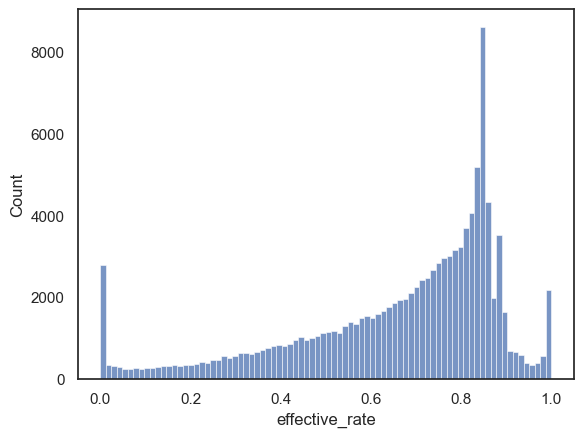

In [ ]:
df["effective_rate"] = (df["useful_calls_fact"] + df["useful_chats_fact"]) / df["all_system_fact"]
df["effective_rate"] = df[df["effective_rate"] < 1]["effective_rate"]
df["effective_rate"] = df[df["emp_type"] == "ТК"]["effective_rate"]
sns.histplot(df["effective_rate"])
print(df["effective_rate"].median())
print(df["effective_rate"].mean())


0.9355294275813715
0.8749983655930706


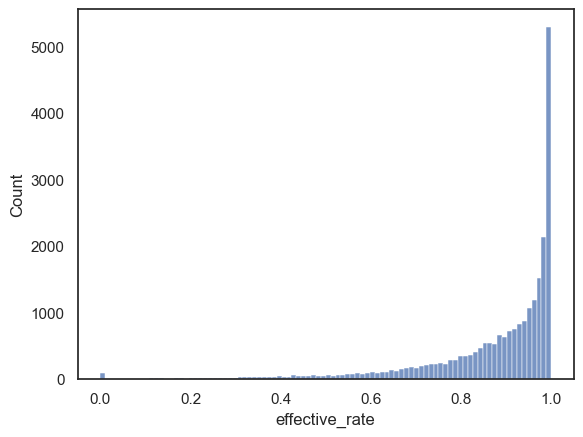

In [ ]:
df["effective_rate"] = (df["useful_calls_fact"] + df["useful_chats_fact"]) / df["all_system_fact"]
df["effective_rate"] = df[df["effective_rate"] < 1]["effective_rate"]
df["effective_rate"] = df[df["emp_type"] == "ГПД"]["effective_rate"]
sns.histplot(df["effective_rate"])
print(df["effective_rate"].median())
print(df["effective_rate"].mean())

0.7635299644000164
0.7307421525972815


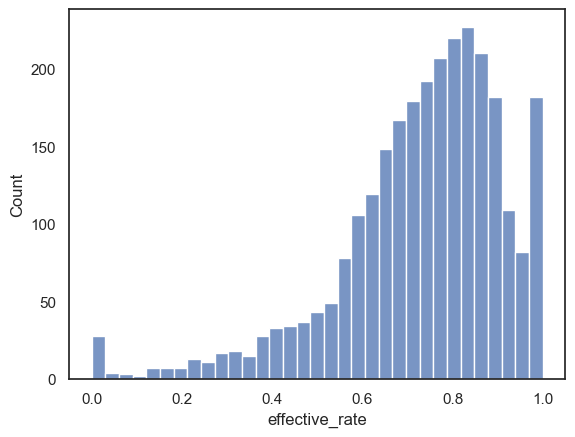

In [ ]:
df["effective_rate"] = (df["useful_calls_fact"] + df["useful_chats_fact"]) / df["all_system_fact"]
df["effective_rate"] = df[df["effective_rate"] < 1]["effective_rate"]
df["effective_rate"] = df[df["emp_type"] == "ПКЦ"]["effective_rate"]
sns.histplot(df["effective_rate"])
print(df["effective_rate"].median())
print(df["effective_rate"].mean())

281.28491982653304


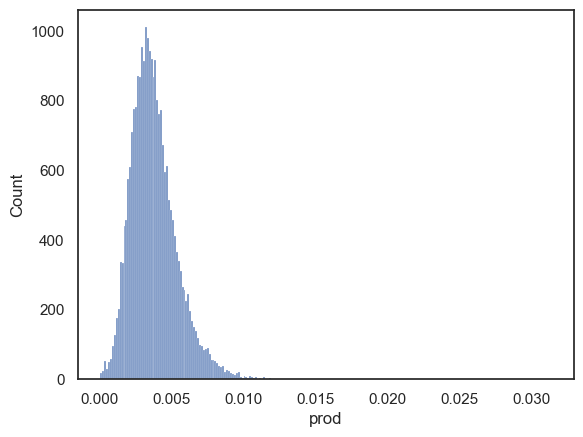

In [ ]:
df["prod"] = (df["cnt_call"]+ df["cnt_chat"])/(df["dlg_time_call"] + df["dlg_time_chat"])
sns.histplot(df["prod"])
print(1/df["prod"].median())

248.54285714285714


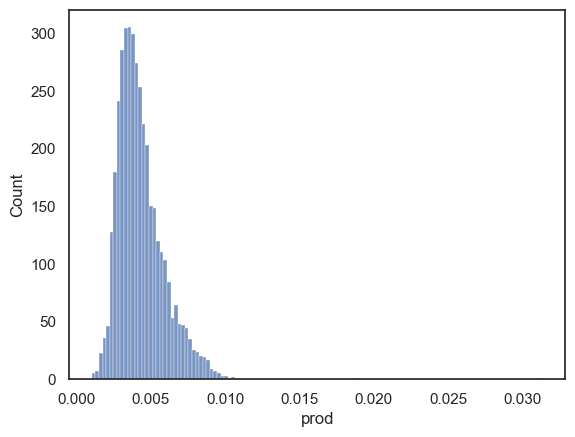

In [ ]:
sns.histplot(df[df["emp_type"] == "ГПД"]["prod"])
print(1/df[df["emp_type"] == "ГПД"]["prod"].median())

296.4877669562742


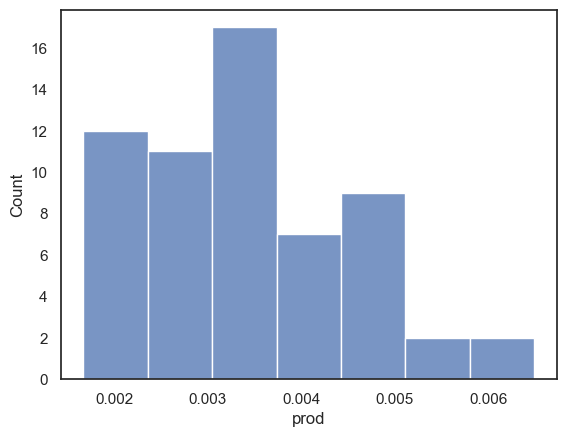

In [ ]:
sns.histplot(df[df["emp_type"] == "ПКЦ"]["prod"])
print(1/df[df["emp_type"] == "ПКЦ"]["prod"].median())

289.8382352941176


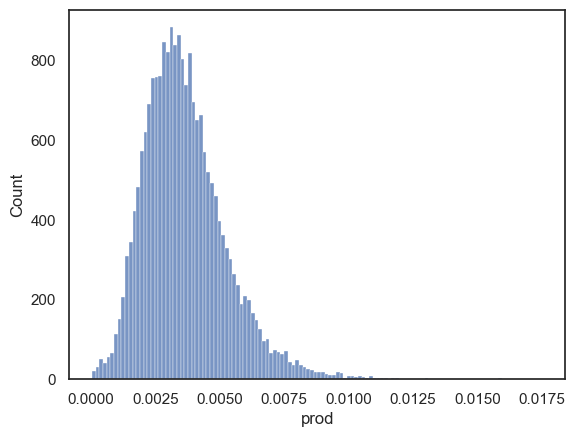

In [ ]:
sns.histplot(df[df["emp_type"] == "ТК"]["prod"])
print(1/df[df["emp_type"] == "ТК"]["prod"].median())

['Женщина', 'Мужчина', nan]
281.71296296296293


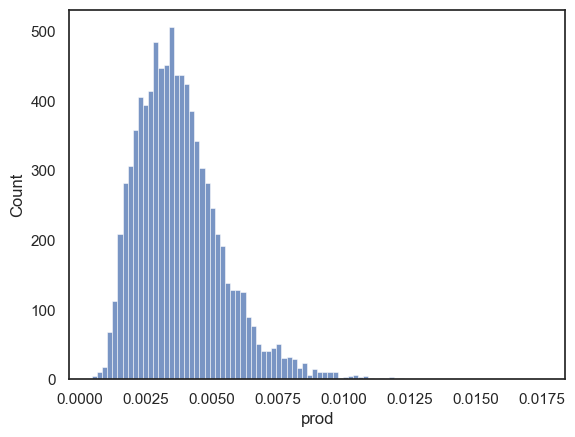

In [ ]:
print(list(set(df["gender_desc"])))
sns.histplot(df[df["gender_desc"] == "Мужчина"]["prod"])
print(1/df[df["gender_desc"] == "Мужчина"]["prod"].median())

281.0272727272727


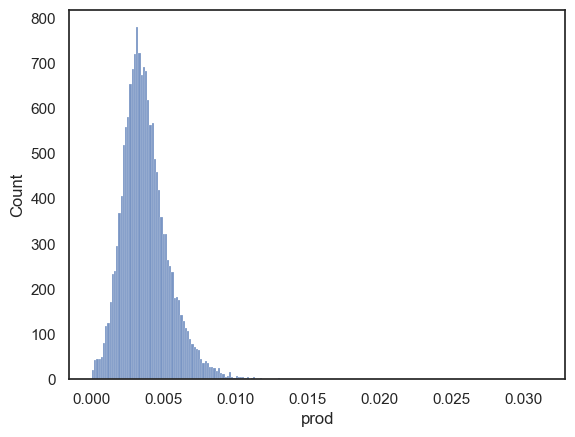

In [ ]:
sns.histplot(df[df["gender_desc"] == "Женщина"]["prod"])
print(1/df[df["gender_desc"] == "Женщина"]["prod"].median())

C:\Users\Админ\AppData\Local\Temp\ipykernel_5448\273472197.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender_desc"] = df["gender_desc"].replace({"Мужчина": 1, "Женщина": 0})
C:\Users\Админ\AppData\Local\Temp\ipykernel_5448\273472197.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["emp_type"] = df["emp_type"].replace({"ТК":0, "ГПД":1, "ПКЦ":2,"Неизвестно": 1})


[0, 1, 2]


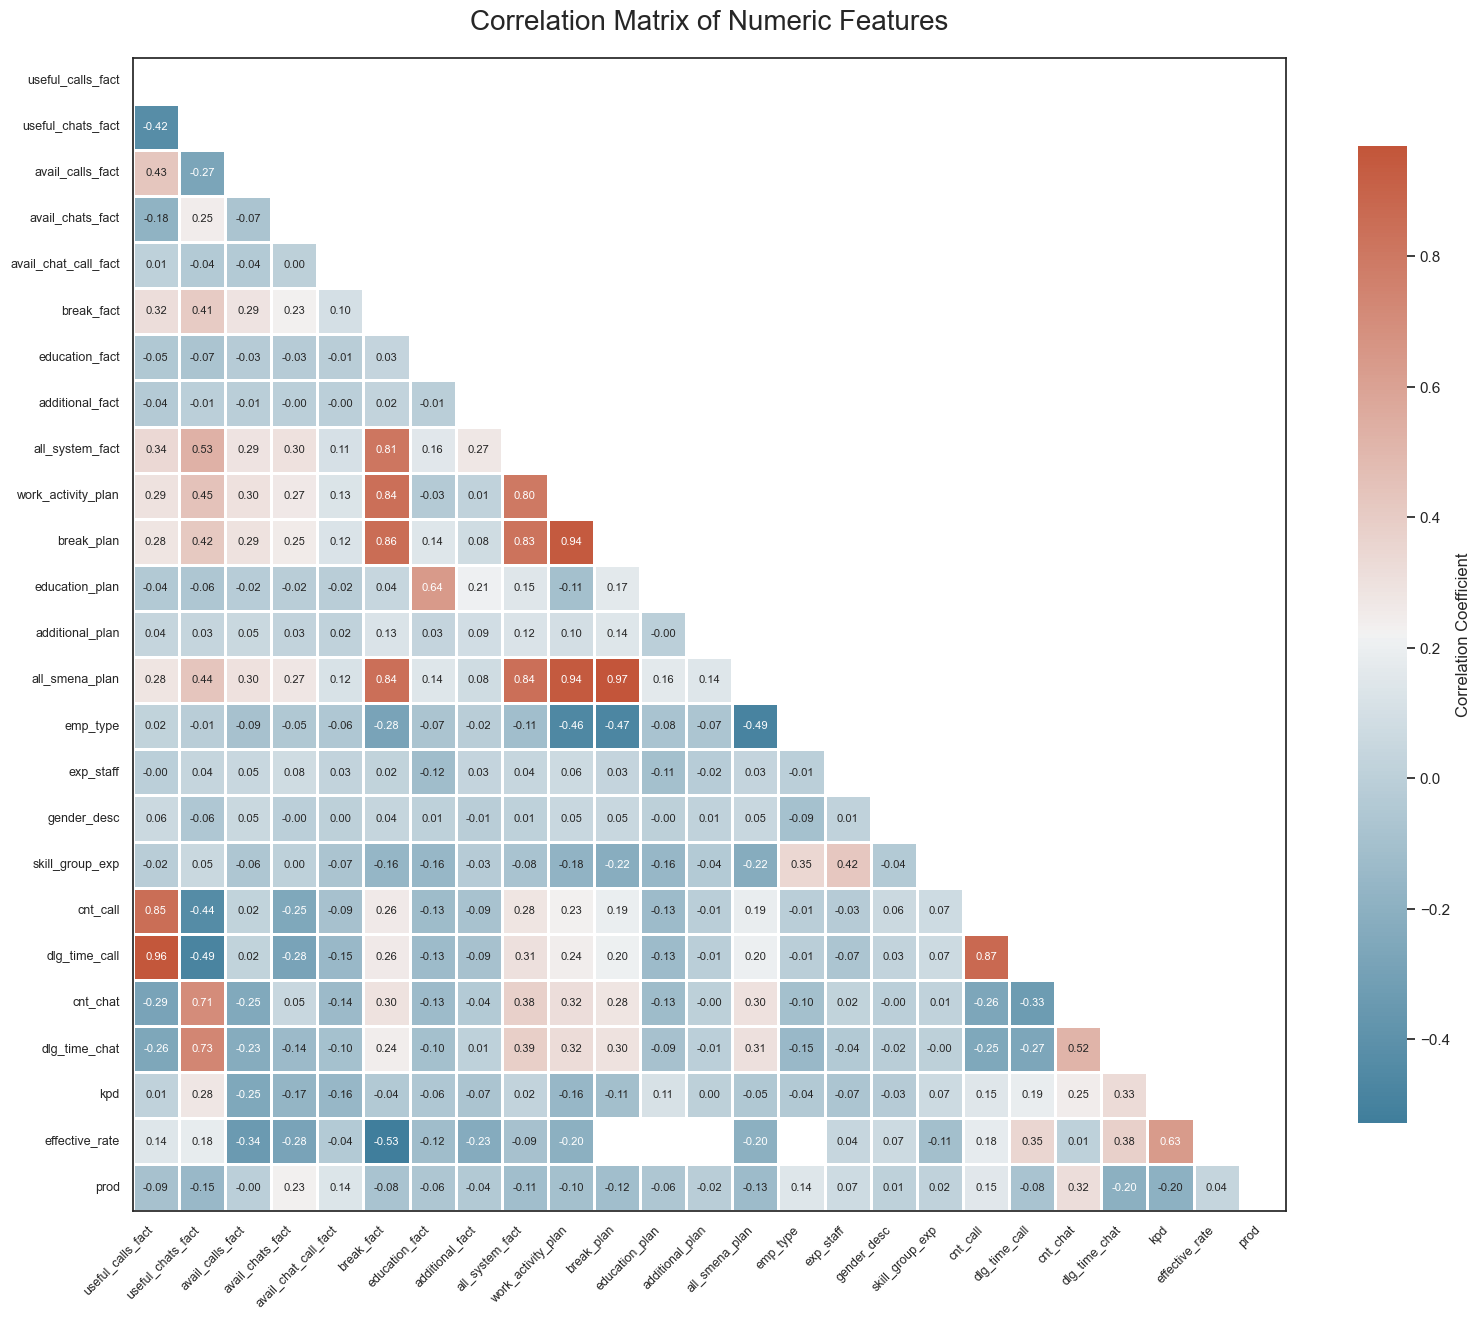

In [ ]:
# Convert gender to binary values
df["gender_desc"] = df["gender_desc"].replace({"Мужчина": 1, "Женщина": 0})
df["emp_type"] = df["emp_type"].replace({"ТК":0, "ГПД":1, "ПКЦ":2,"Неизвестно": 1})
df["emp_type"].fillna(1)
print(list(set((df["emp_type"]))))
# Create correlation matrix with all numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with improved aesthetics
sns.heatmap(corr_matrix, 
            annot=True,
            fmt='.2f',
            cmap=cmap,
            mask=mask,
            square=True,
            linewidths=.8,
            annot_kws={"size": 8},
            cbar_kws={"shrink": .75, "label": "Correlation Coefficient"})

# Adjust labels and title
plt.title('Correlation Matrix of Numeric Features', fontsize=20, pad=20)
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)

# Add grid to make it easier to trace
plt.grid(False)

# Improve layout
plt.tight_layout()

# Add a border around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()


Инвестиции
0.003256033888558084


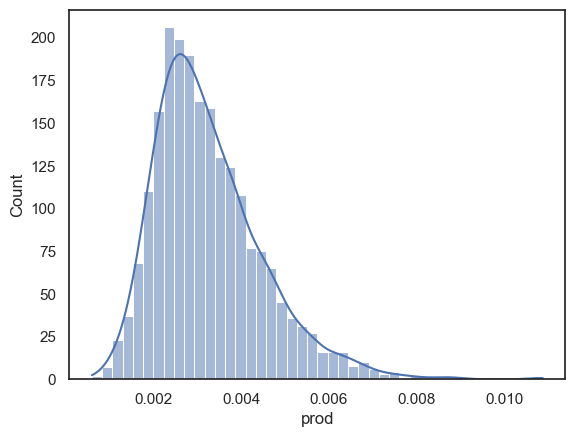

Кредитные продукты
0.004225105893495423


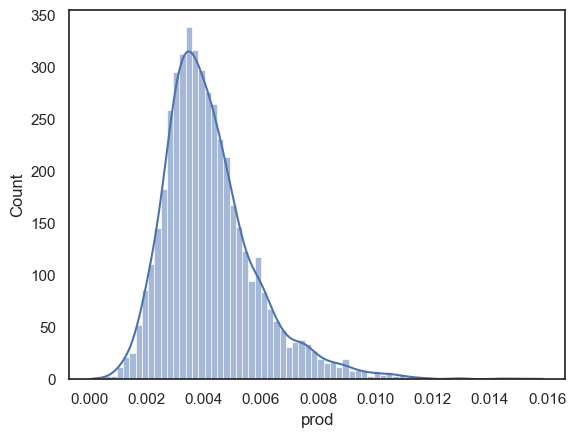

nan
nan


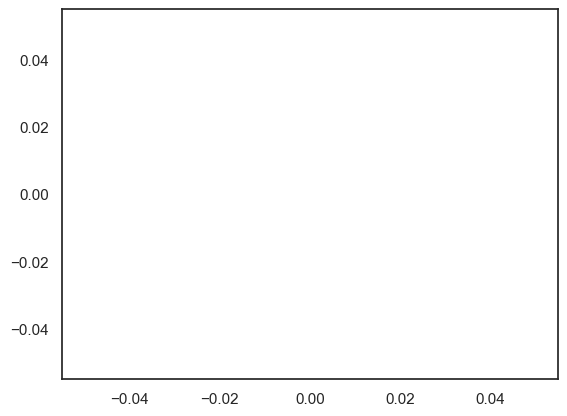

SME
0.0027639966145494013


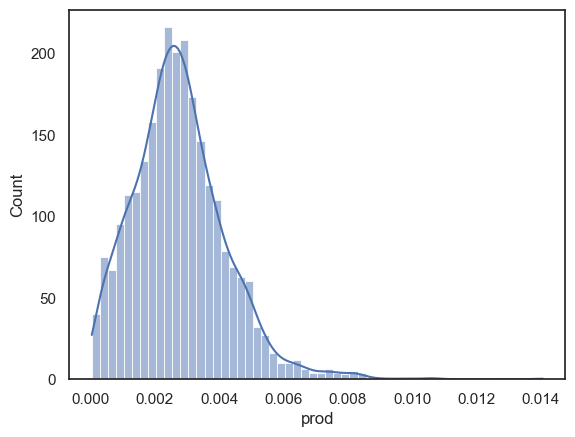

Нефинансовые продукты
0.003220601773777037


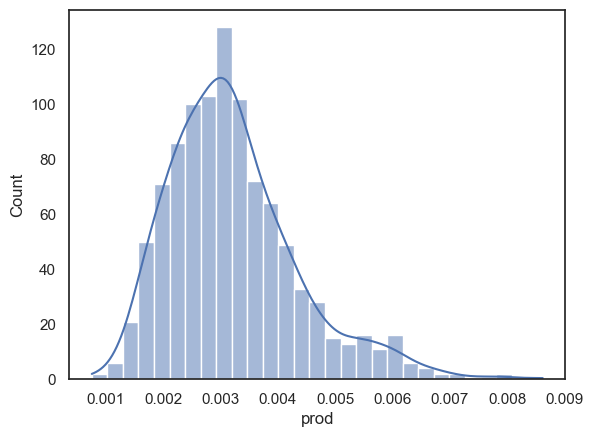

Premium Банк
0.002365904862869513


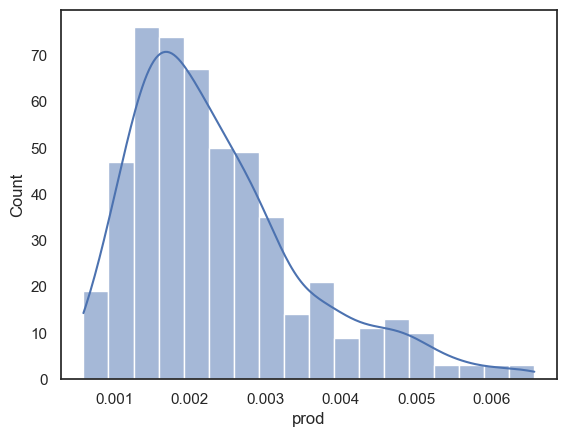

Mobile
0.004105335994037259


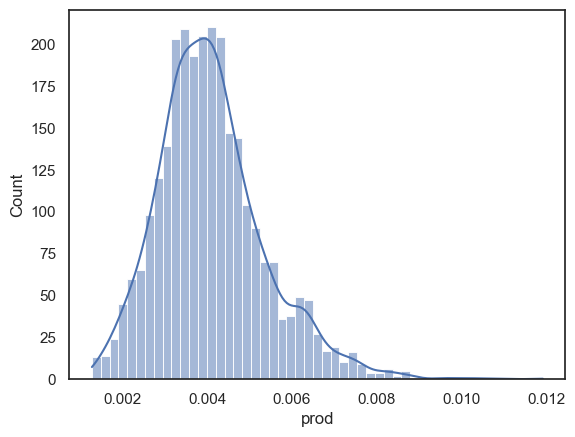

Кросс-функции
0.003288973183218747


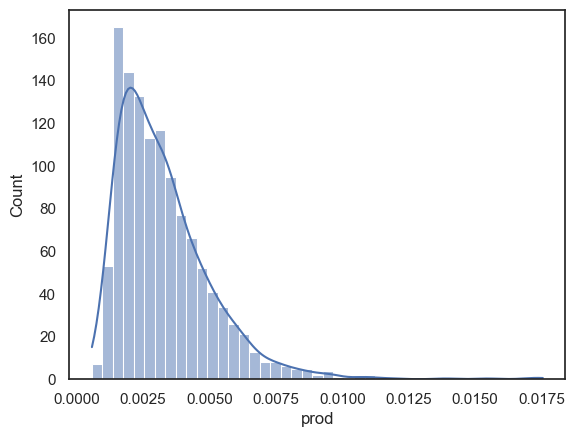

Депозитные продукты
0.0037646232518345588


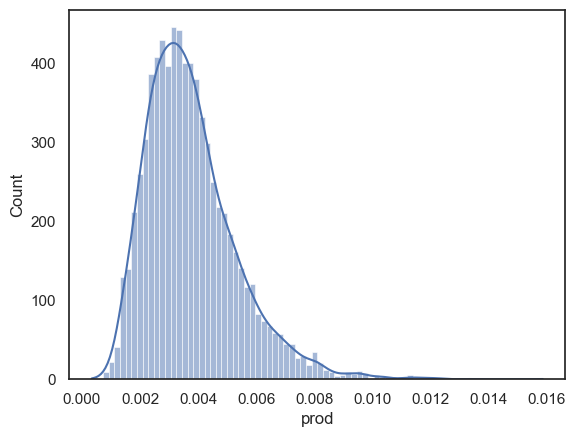

Страховая
0.0047303240592132265


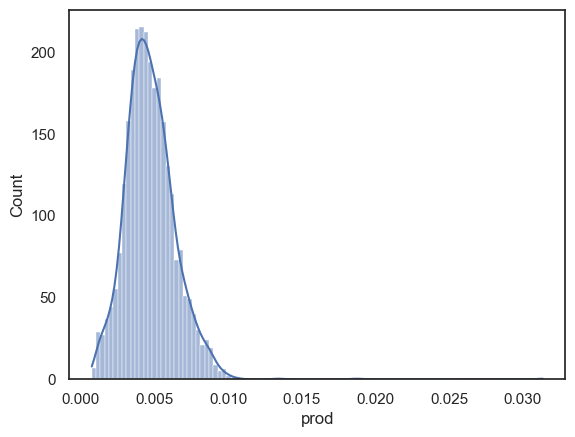

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.001, '0.001'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.003, '0.003'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.005, '0.005')])

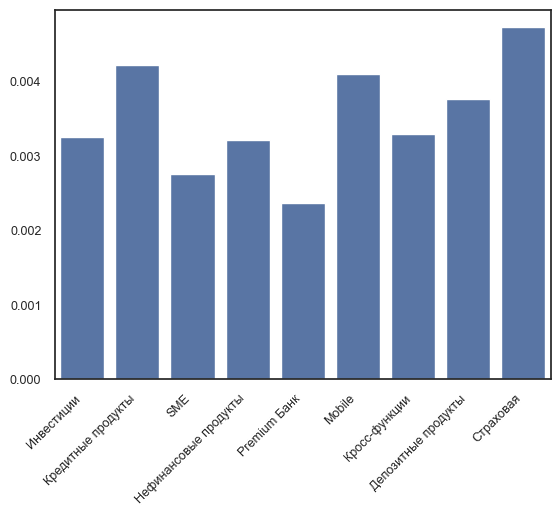

In [ ]:
res = {}
for i in list(set(df["business_line"])):
    print(i)
    print(df[df["business_line"]==i]["prod"].mean())
    res[i] = df[df["business_line"]==i]["prod"].mean()
    sns.histplot(df[df["business_line"]==i]["prod"], kde=True)
    plt.show()

sns.barplot(x=list(res.keys()), y=list(res.values()))
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)

['Инвестиции', 'Нерезиденты', 'Saving Premium Банк', 'Партнеры', 'ME', 'Семейный банк', 'Дебетовые карты', 'Guard', 'Другое', 'Бухгалтерия SME', 'Кобренды', 'Mob 1ая линия', 'Ins Решатели', 'SE EACQ', 'Support Premium Банк', 'Travel', 'Вклады', 'Непродуктовые обращения', 'Ins 1ая линия', nan, 'Lifestyle', 'Беззалоговые ПК', 'Залоговые ПК', 'Антифрод', 'Кредитные карты', 'SE', 'SE TACQ', 'SE VED']


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

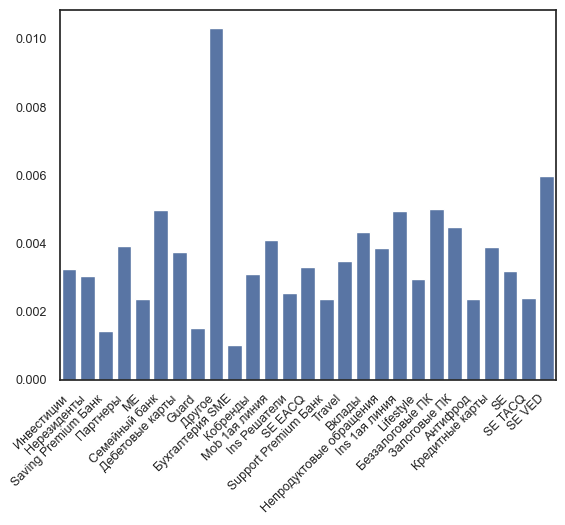

In [ ]:
res = {}
print(list(set(df["napravlenie"])))
for i in list(set(df["napravlenie"])):
    res[i] = df[df["napravlenie"] == i]["prod"].mean()

sns.barplot(x=list(res.keys()), y=list(res.values()))
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)

[0, 1, 2]
['Deposit', 'SME_AML', 'Prem_Saving', 'No', 'TMobile_Standart_plus', 'SE_VED', 'UI', 'PL', 'SME_Partners', 'UI Uzbek', 'English', 'Prem_Other', 'RK Help', 'TMobile_Standart', 'SE_Base', 'PK KNP', '[INS ГОО] Решатели', 'SE_Ishod', '[INS ГОО] Решатели Support', 'Ins Motor', 'БО_СППл_Невозможность', 'SME_acc_HO_easy', 'SME_TCB_Card', 'TMobile_Assist_Support', 'Advisor Junior', 'Promo', 'Guard FL Digital', 'Lifestyle Multy', 'Trial', 'fraud', 'fraud Advisor', 'SE_TCB', 'SE_TACQ', 'Ipoteka', 'PK KNZ', 'SME_Guard_NO', 'RG', '[INS ГОО] Решатели Support+премиальное обслуживание', 'Invest_Advisor', 'Invest_Assist', 'Junior Multy', 'Ins Assist', 'Travel', 'RK Base', 'Prem_Junior', 'PK KN', 'Prem_Trial', 'SME_acc_easy_account_front', 'Lifestyle new', 'Guard FL Base', 'SE_Profi', 'KK Base2', 'БО_СППК_КН', 'ME_Profi', 'RG_CREDIT', 'SE_EACQ', 'Invest_Newbie', nan, 'Tadj', 'UI English', 'LPR', 'Uzb', 'PK Auto', 'БО_СПЗК_Росреестр', 'Avia GDS', 'Изменения', 'Wallet NFS', 'Ins All', 'Guard FL

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 ]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0005, '0.0005'),
  Text(0, 0.001, '0.0010'),
  Text(0, 0.0015, '0.0015'),
  Text(0, 0.002, '0.0020'),
  Text(0, 0.0025, '0.0025'),
  Text(0, 0.003, '0.0030'),
  Text(0, 0.0035, '0.0035'),
  Text(0, 0.004, '0.0040')])

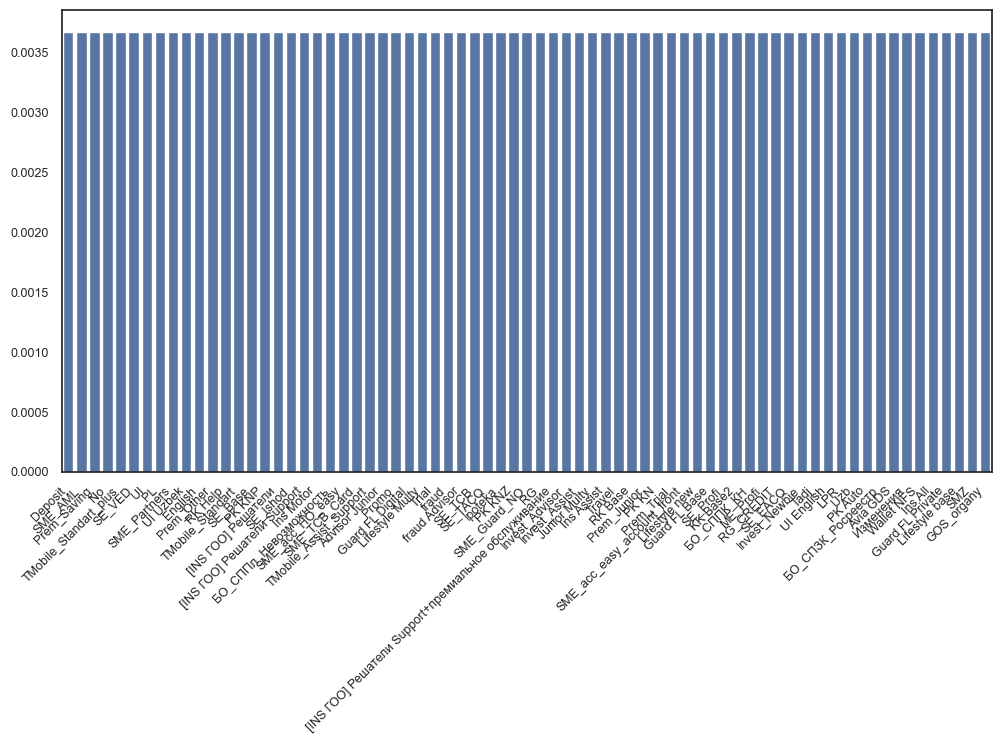

In [ ]:
res = {}
plt.figure(figsize=(12, 6))
print(list(set(df["emp_type"])))
print(list(set(df[df["emp_type"] == 0]["skill_group"])))
for i in list(set(df[df["emp_type"] == 0]["skill_group"])):
    res[i] =df[df["emp_type"] == 0]["prod"].mean()

sns.barplot(x=list(res.keys()), y=list(res.values()))
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)

[0, 1, 2]
['2 ГП Сервис Вход. [Чаты] Инвестиции', 'ПКЦ Телесейлз RK Base [звонки]', 'ПКЦ HVG RK Base [чаты]', 'ДКО. [Чаты] Инвестиции Assist', '2 ГП Сервис Вход. [Звонки] Страховая', '[Чаты]  Лайфстайл', '[Чаты] Лайфстайл', '[Чаты] mobile_gpd_kc', '[Омни] KK Base2', 'ПКЦ Телесейлз RK Base [чаты]', 'ПКЦ Lifecall RK Base [звонки]', '[Чаты] RK Base', 'ПКЦ Контакт RK Base [звонки]', '[Омни] Страховая', 'ПКЦ Уфа RK Base [звонки]', '[Омни]  Тревел', 'mobile_gpd_kc', '[Звонки] RK Base', 'ПКЦ HVG RK Base [звонки]', 'Junior_ГПД', 'ПКЦ Уфа RK Base [чаты]', '[Звонки] KK Base2', '[Омни] Тревел', '[Омни] RK Base', nan, 'ДКО. [Чаты] Инвестиции Newbie', 'ГП Сервис SME. [Чаты] SME - чаты', 'ПКЦ Акции [омни]', 'ПКЦ LeadLine RK Base [звонки]', '[Омни] Мульти Тревел']


(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.001, '0.001'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.003, '0.003'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.005, '0.005')])

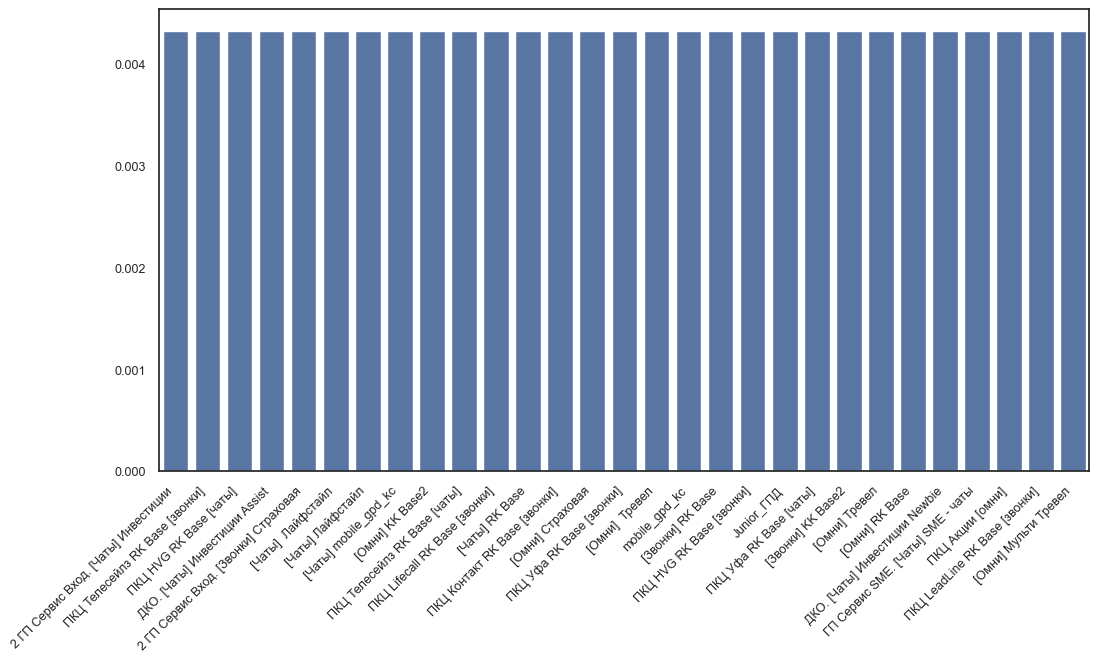

In [ ]:
res = {}
plt.figure(figsize=(12, 6))
print(list(set(df["emp_type"])))
print(list(set(df[df["emp_type"] != 0]["planning_group_nm"])))
for i in list(set(df[df["emp_type"] != 0]["planning_group_nm"])):
    res[i] =df[df["emp_type"] != 0]["prod"].mean()

sns.barplot(x=list(res.keys()), y=list(res.values()))
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)

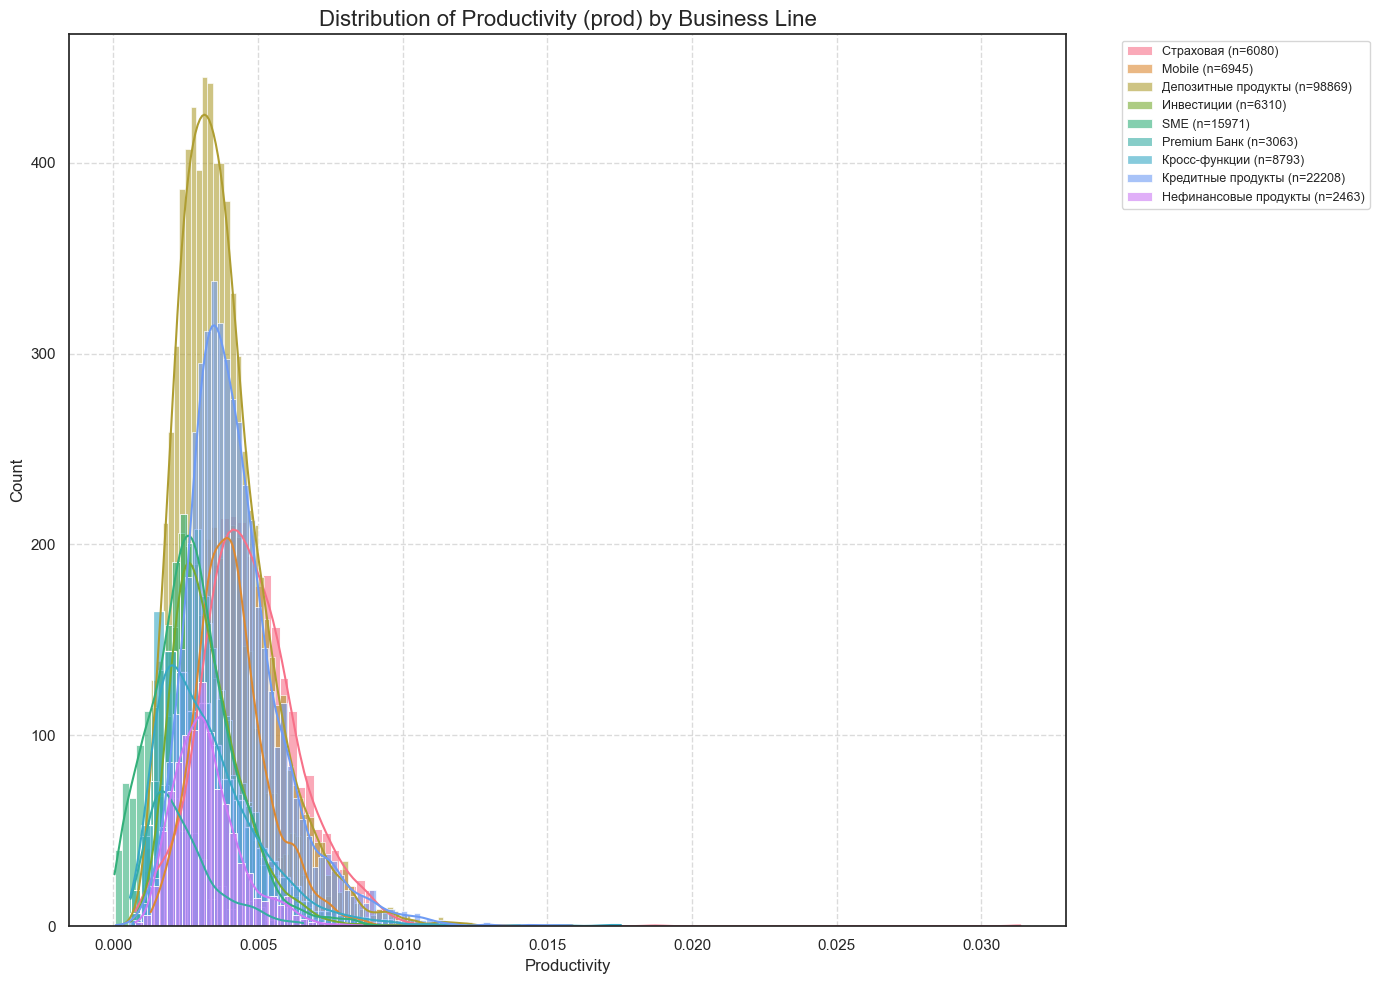

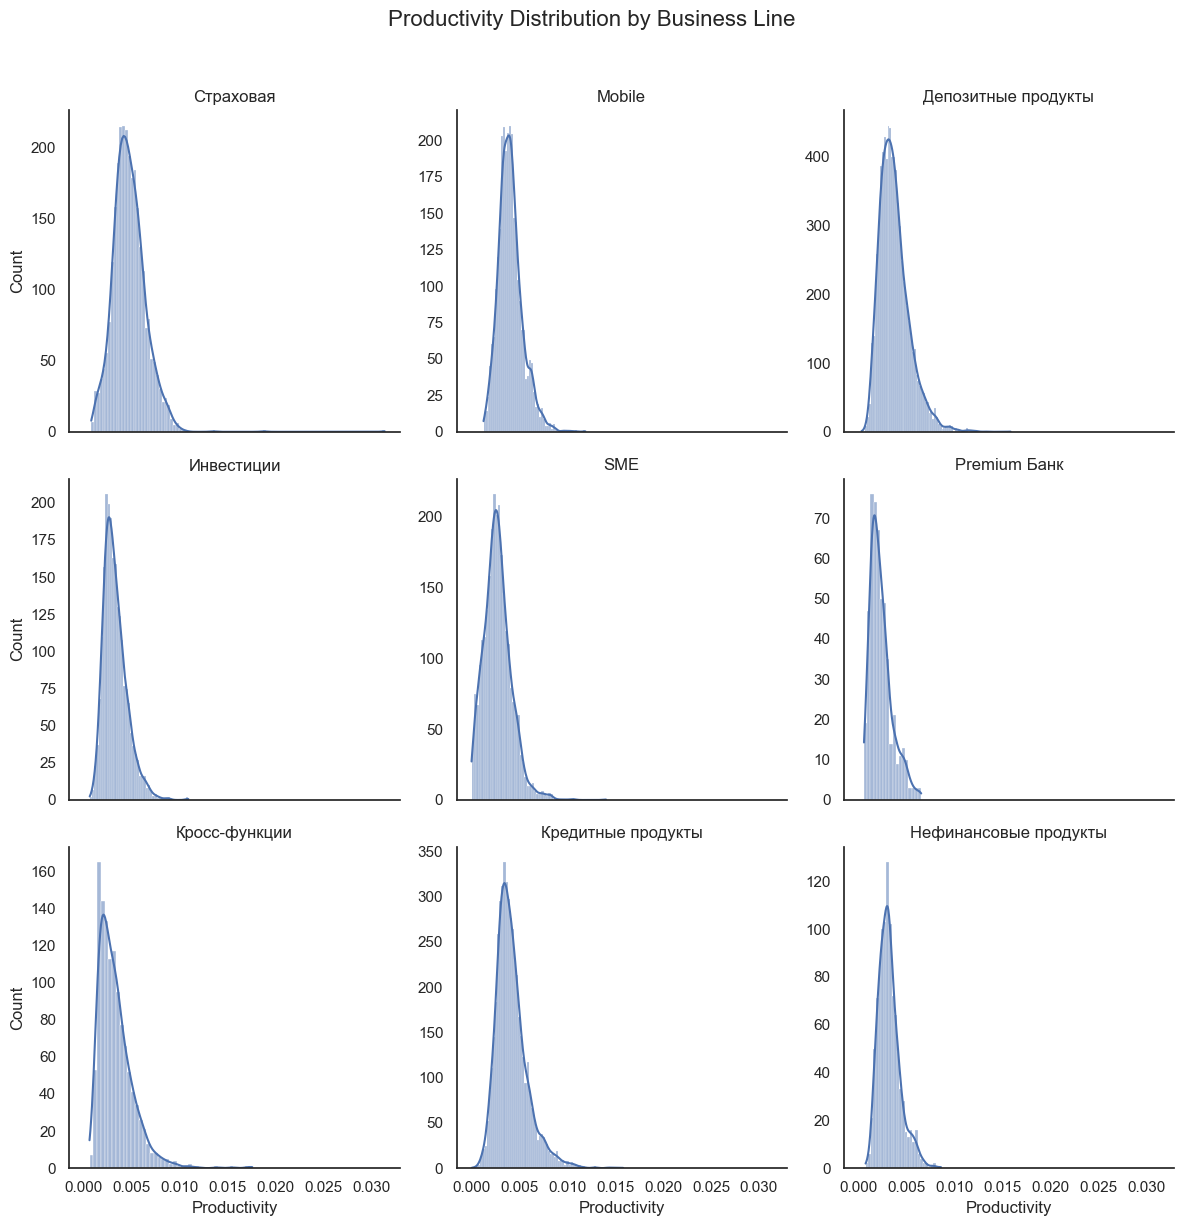

In [ ]:
# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Get unique business lines
business_lines = df['business_line'].unique()

# Create a color palette with enough colors
colors = sns.color_palette("husl", len(business_lines))

# Plot histograms for each business line
for i, business_line in enumerate(business_lines):
    # Filter data for this business line
    line_data = df[df['business_line'] == business_line]['prod']
    
    # Skip if no data
    if len(line_data) == 0:
        continue
    
    # Plot histogram with transparency
    sns.histplot(line_data, 
                 label=f"{business_line} (n={len(line_data)})",
                 alpha=0.6,
                 color=colors[i],
                 kde=True)

# Add labels and title
plt.title('Distribution of Productivity (prod) by Business Line', fontsize=16)
plt.xlabel('Productivity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend with smaller font size and place it outside the plot
plt.legend(fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

# Alternative visualization: FacetGrid for separate subplots
g = sns.FacetGrid(df, col="business_line", col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, "prod", kde=True)
g.set_axis_labels("Productivity", "Count")
g.set_titles("{col_name}")
g.fig.suptitle('Productivity Distribution by Business Line', y=1.02, fontsize=16)
g.tight_layout()
plt.show()


Analyzing: calendar_dt
Analyzing: id_employee
Analyzing: useful_calls_fact
Analyzing: useful_chats_fact
Analyzing: avail_calls_fact
Analyzing: avail_chats_fact
Analyzing: avail_chat_call_fact
Analyzing: break_fact
Analyzing: education_fact
Analyzing: additional_fact
Analyzing: all_system_fact
Analyzing: work_activity_plan
Analyzing: break_plan
Analyzing: education_plan
Analyzing: additional_plan
Analyzing: all_smena_plan
Analyzing: business_line


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


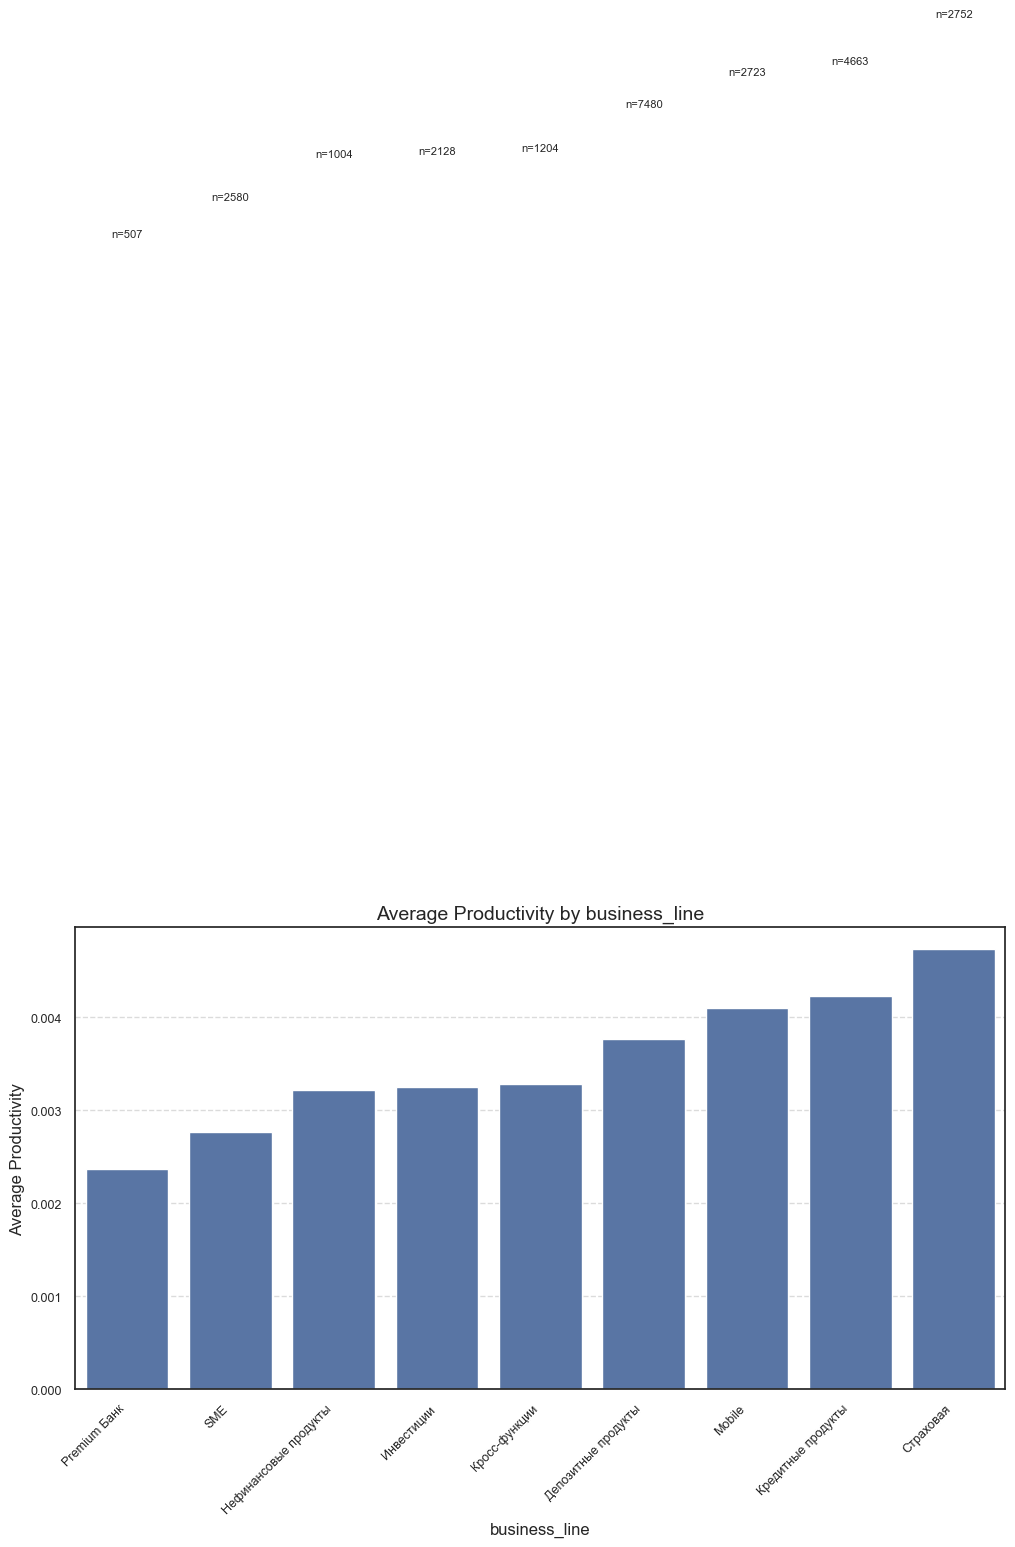

C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values


Analyzing: napravlenie
Analyzing: grid_group
Analyzing: skill_group
Analyzing: emp_type


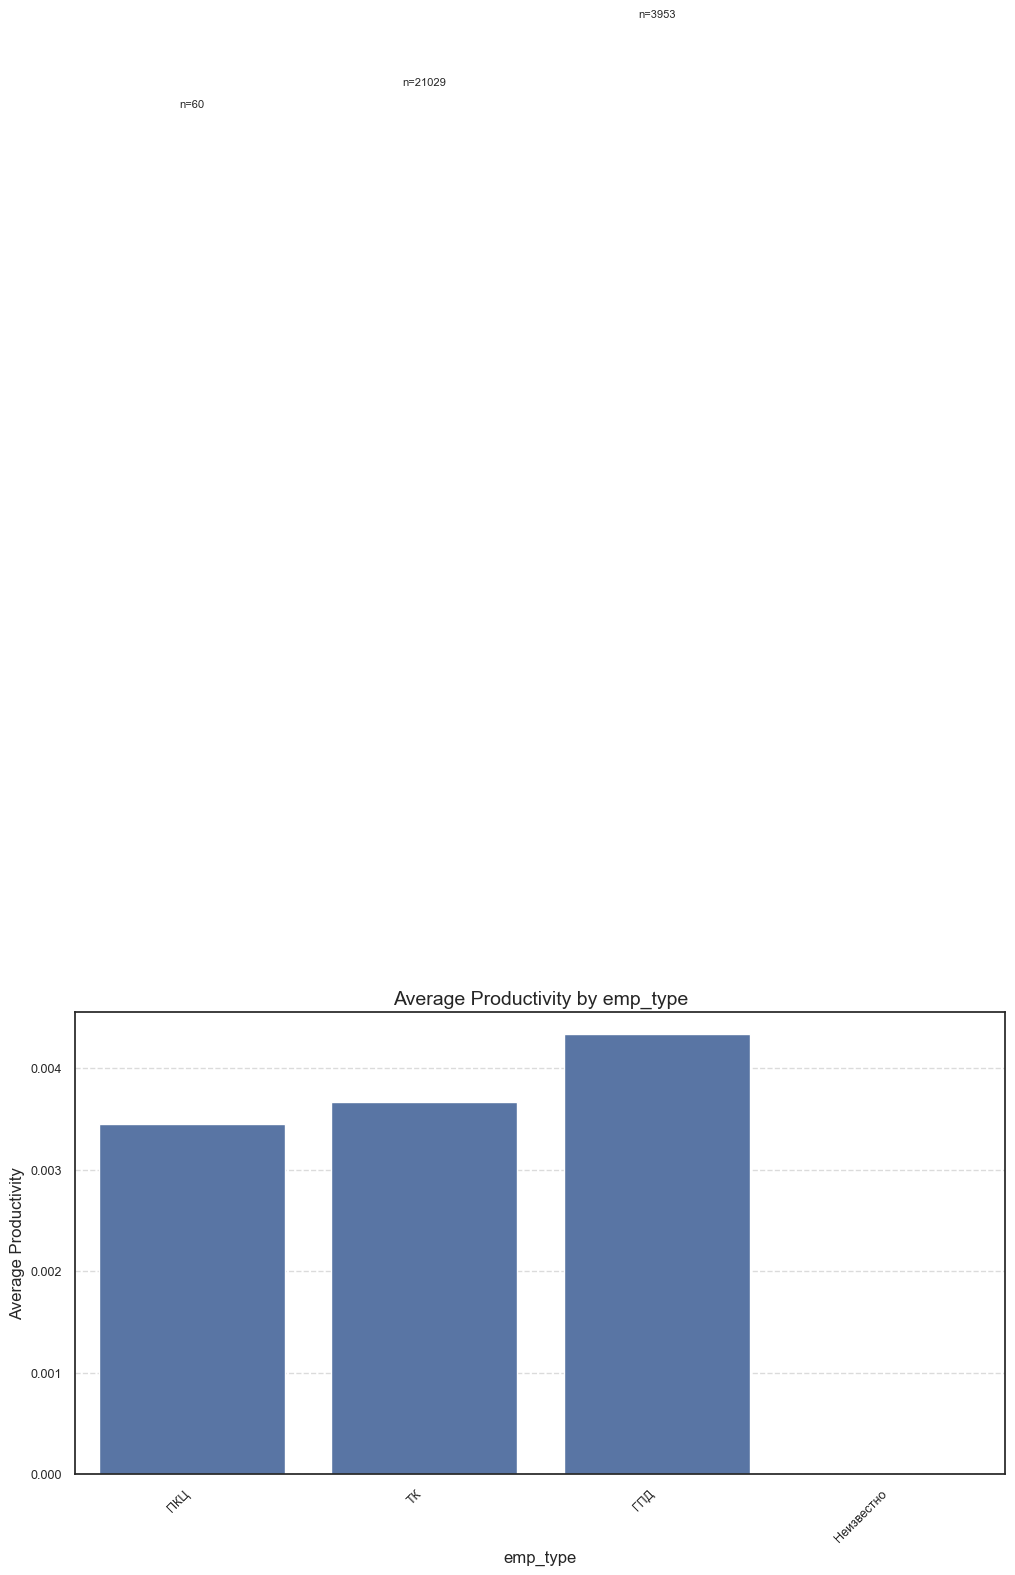

C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
posx and posy should be finite values


Analyzing: hire_dt
Analyzing: exp_staff


posx and posy should be finite values


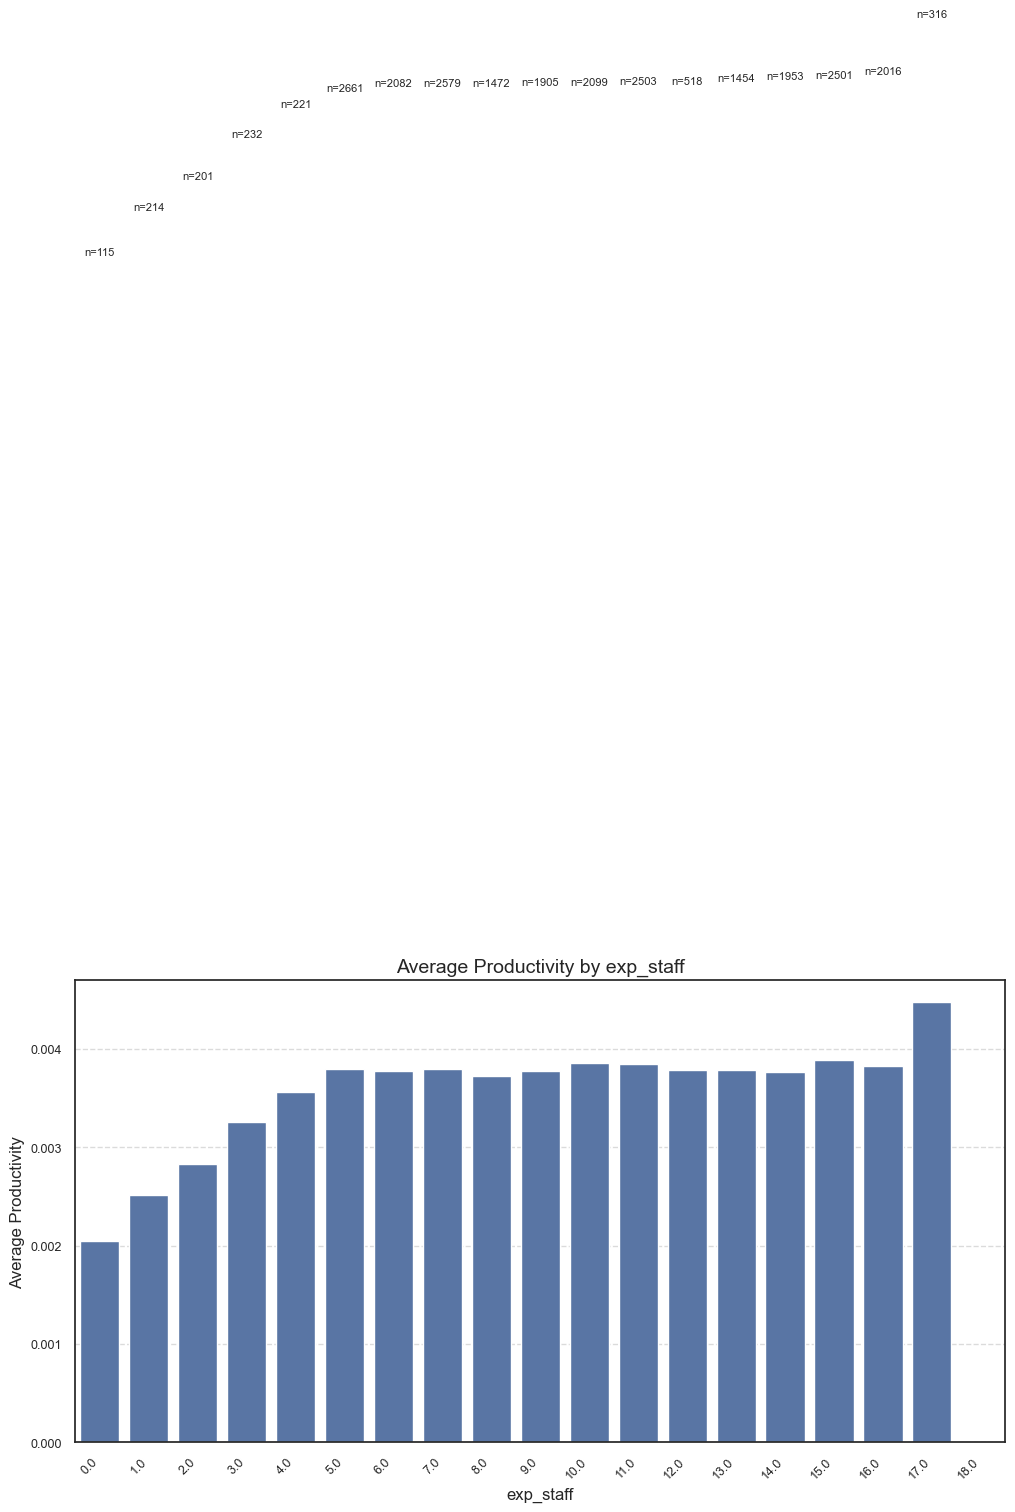

Analyzing: gender_desc


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


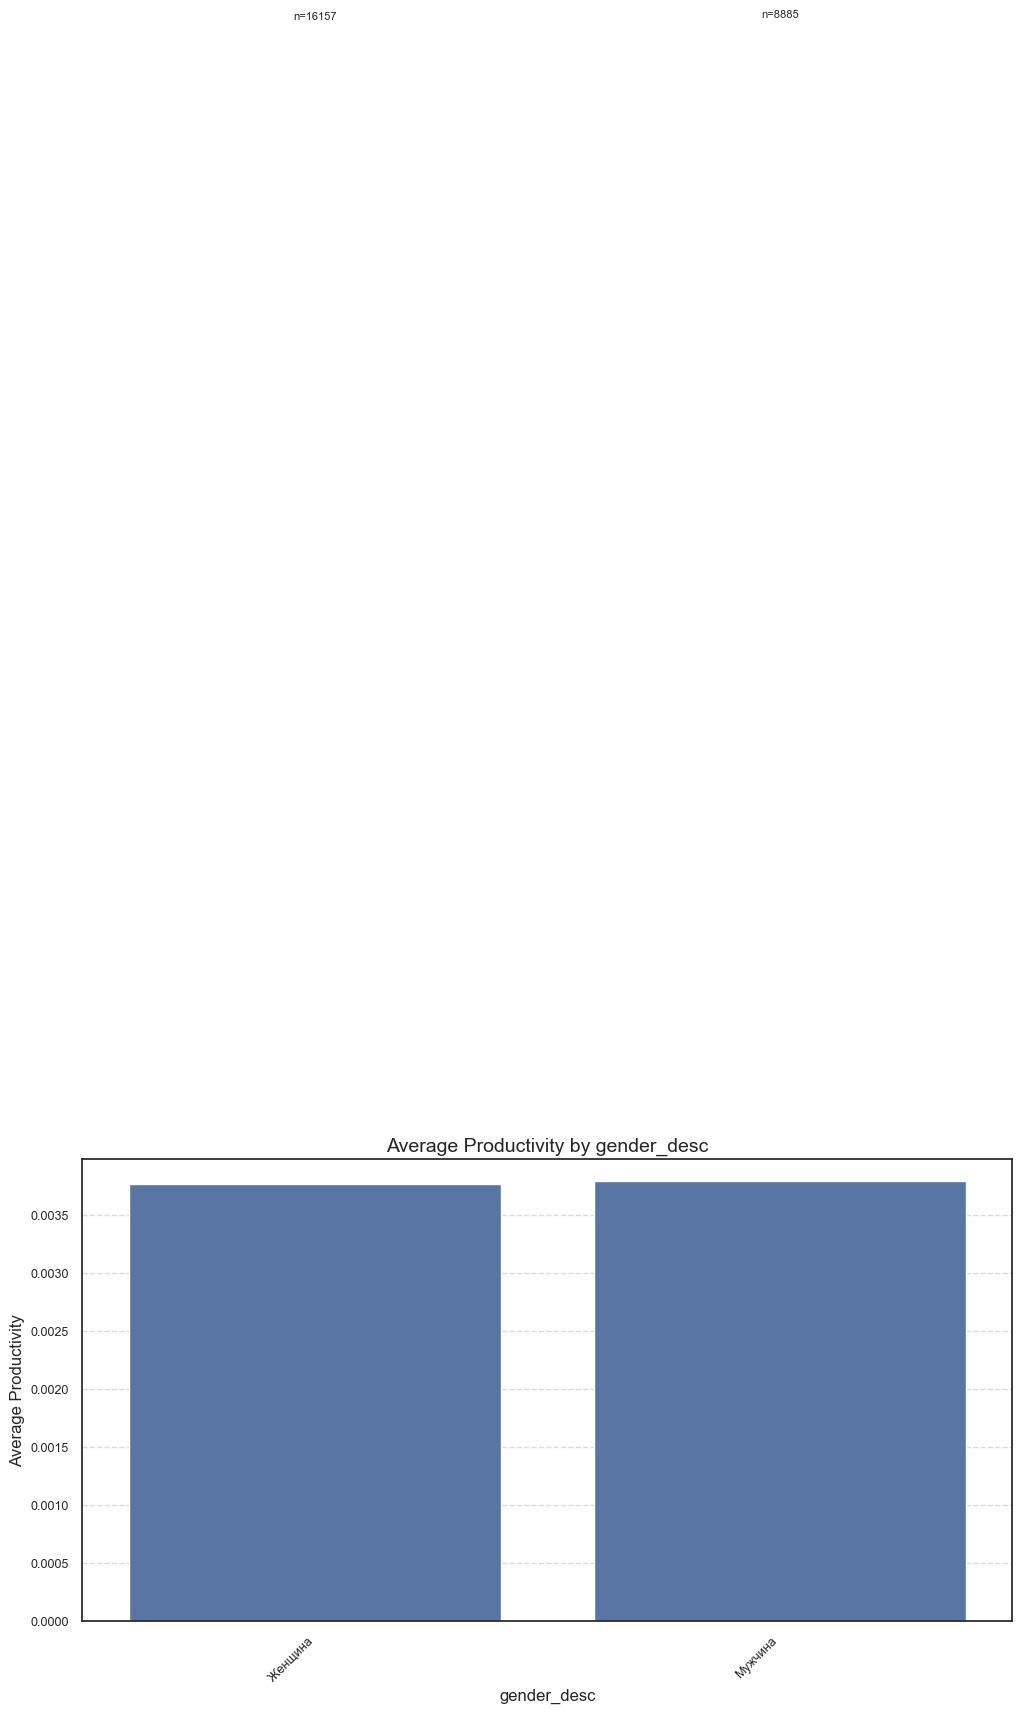

Analyzing: skill_group_exp


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


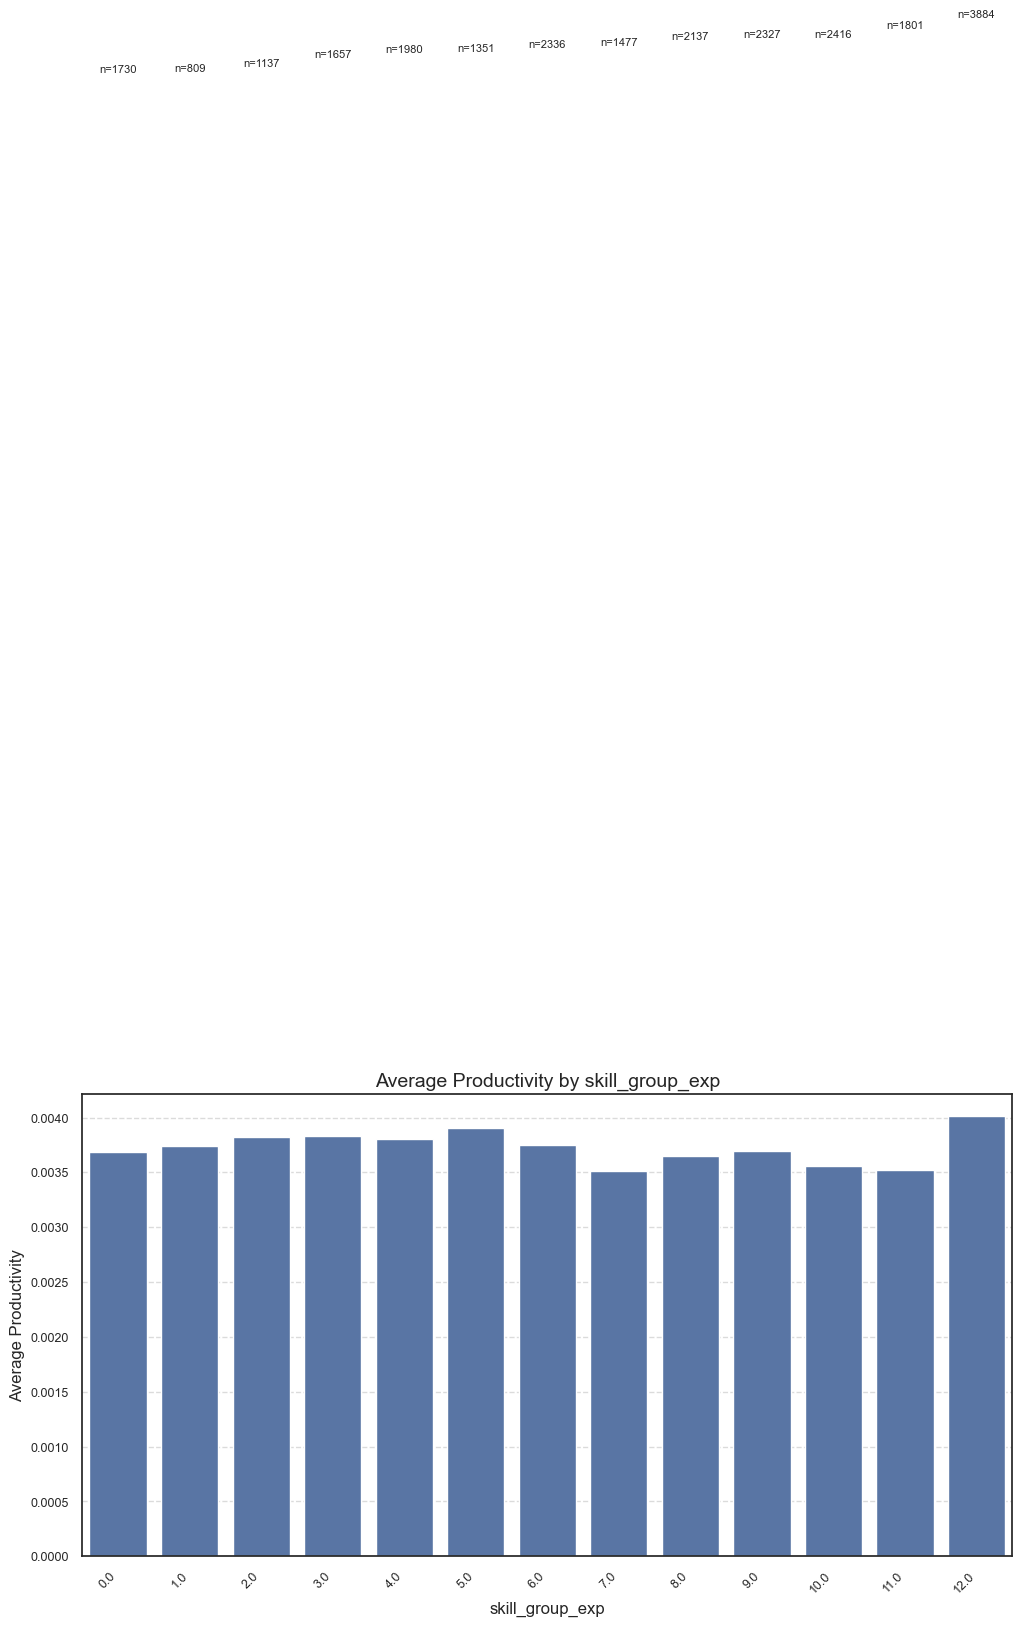

Analyzing: planning_group_nm
Analyzing: residential_district_nm
Analyzing: residential_city_nm
Analyzing: residential_state_nm
Analyzing: residential_settlement_nm
Analyzing: grafik


C:\Users\Админ\AppData\Local\Temp\ipykernel_14440\126278104.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


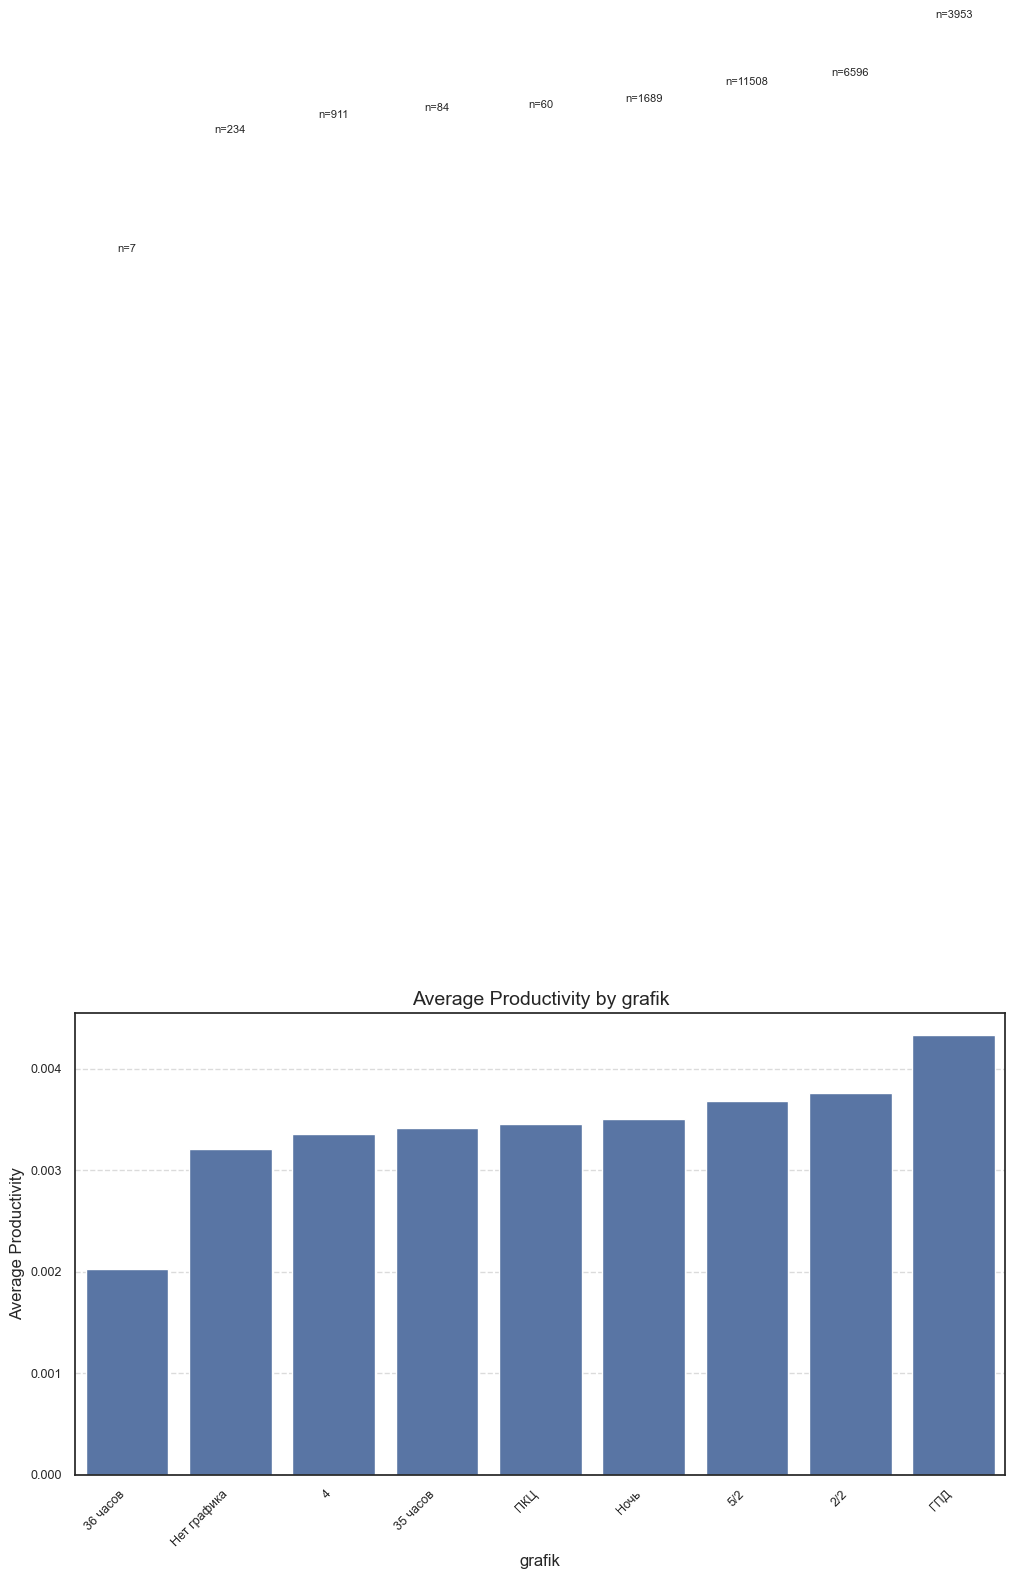

Analyzing: cnt_call
Analyzing: dlg_time_call
Analyzing: cnt_chat
Analyzing: dlg_time_chat
Analyzing: kpd


In [ ]:
def plot_productivity_by_parameter(parameter_column):
    """
    Plot average productivity grouped by values of the given parameter column.
    
    Args:
        parameter_column: The column name to group by
    """
    # Skip if the parameter is 'prod' itself or if it's not a categorical column
    if parameter_column == 'prod' or df[parameter_column].nunique() > 20:
        return
    
    # Group by the parameter and calculate mean productivity
    grouped_data = df.groupby(parameter_column)['prod'].agg(['mean', 'count']).reset_index()
    
    # Sort by mean productivity for better visualization
    grouped_data = grouped_data.sort_values('mean')
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create bar plot
    ax = sns.barplot(x=parameter_column, y='mean', data=grouped_data)
    
    # Add count annotations
    for i, row in enumerate(grouped_data.itertuples()):
        ax.text(i, row.mean + 0.01, f"n={row.count}", ha='center', va='bottom', fontsize=8)
    
    # Add labels and title
    plt.title(f'Average Productivity by {parameter_column}', fontsize=14)
    plt.xlabel(parameter_column, fontsize=12)
    plt.ylabel('Average Productivity', fontsize=12)
    
    # Rotate x-axis labels if needed
    plt.xticks(fontsize=9, rotation=45, ha='right')
    plt.yticks(fontsize=9)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Loop through all columns and create plots
for column in df.columns:
    if column != 'prod':  # Skip the productivity column itself
        try:
            print(f"Analyzing: {column}")
            plot_productivity_by_parameter(column)
        except Exception as e:
            print(f"Error plotting {column}: {e}")


       calendar_dt                       id_employee  useful_calls_fact  \
6       2024-12-25  2c2351a37b67acb9bf6f24bda28ad0f5                  0   
7       2024-12-25  4d2368a248400e3ac8c2f83b7966168a               9303   
14      2024-10-22  0a7b8d5a56610a66970095bdaf772f82                  0   
21      2024-09-20  0b7fa9d10806dd1bc5d25486bd40d989                  0   
22      2024-10-22  35de822d3c2f8be1b1f135b7b26e0478                  0   
...            ...                               ...                ...   
170752  2024-11-20  066ed4c030a65aefbd47ccb271795488              13355   
170755  2024-11-04  d8eace11d444947759a2108d01278481              13279   
170763  2024-09-16  f471263718b934f096ce5bacb6a2084b              11925   
170765  2024-12-11  eddc48ff92b80c2d6e776db00689f161              10890   
170768  2024-09-06  27ef91fbecdac19c26efeca07cfb0266                  0   

        useful_chats_fact  avail_calls_fact  avail_chats_fact  \
6                   14327         

Text(0.5, 1.0, 'Сравнение продуктивности по городам')

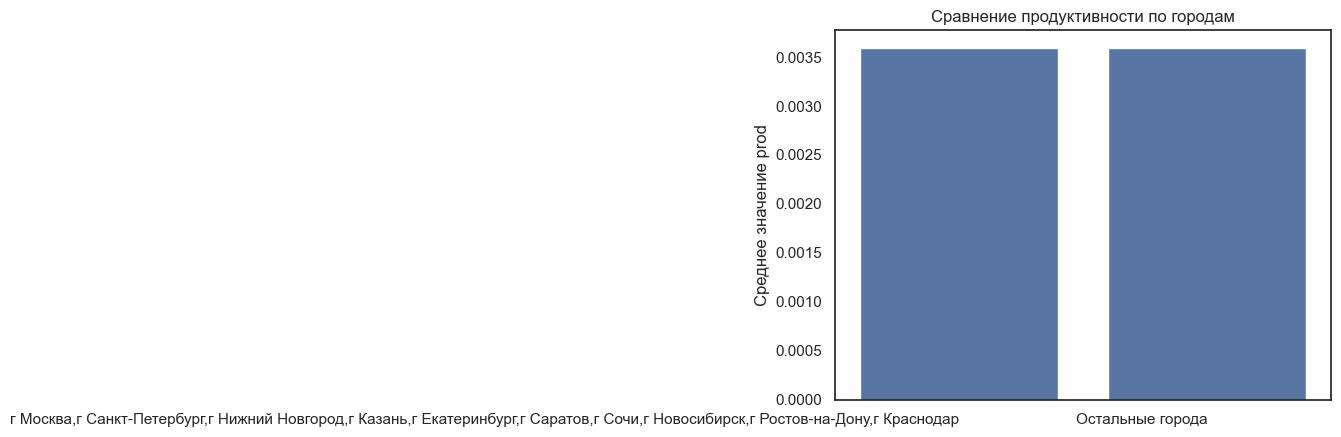

In [ ]:
a = list(set(df["residential_city_nm"]))

# Create masks using isin() method instead of 'in' operator
a = ["г Москва", "г Санкт-Петербург","г Нижний Новгород", "г Казань", "г Екатеринбург", "г Саратов", "г Сочи", "г Новосибирск", "г Ростов-на-Дону", "г Краснодар"]
moscow_spb_mask = df["residential_city_nm"].isin(a)
other_cities_mask = ~df["residential_city_nm"].isin(a)

# Calculate means using the masks
print(df[moscow_spb_mask])
moscow_spb_mean = df[moscow_spb_mask]["prod"].mean()
other_cities_mean = df[other_cities_mask]["prod"].mean()

# Create the barplot
sns.barplot(x=[",".join(a), "Остальные города"], 
            y=[moscow_spb_mean, other_cities_mean])
plt.xticks(ha="right")
plt.ylabel("Среднее значение prod")
plt.title("Сравнение продуктивности по городам")


Корреляция между prod и average_work_time: -0.134


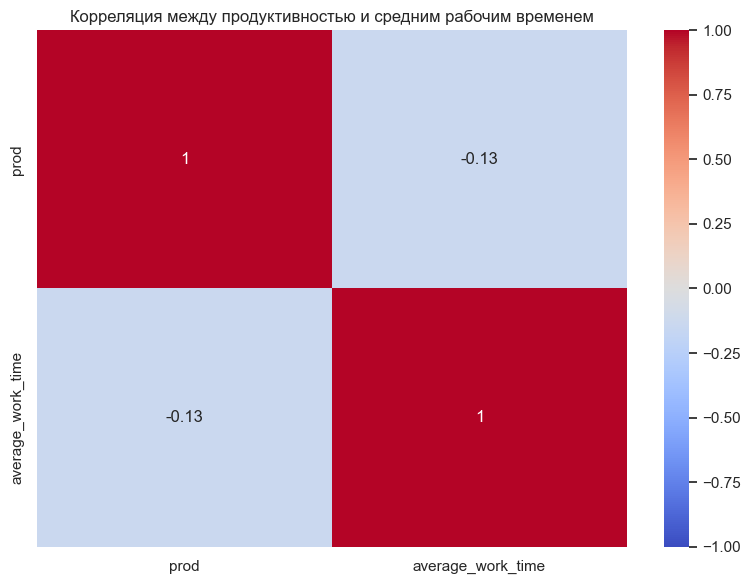

In [ ]:
average_work_time = df.groupby('skill_group')['skill_group_exp'].mean().rename('average_work_time')

# Добавляем новый столбец в исходный DataFrame
data = df.join(average_work_time, on='skill_group')

# Рассчитываем корреляцию Пирсона между prod и average_work_time
correlation = df["prod"].corr(data["average_work_time"])

# Выводим результат с округлением до 3 знаков после запятой
print(f"Корреляция между prod и average_work_time: {correlation:.3f}")

# Визуализируем корреляцию
plt.figure(figsize=(8, 6))
sns.heatmap([[1, correlation], [correlation, 1]], 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1,
            xticklabels=["prod", "average_work_time"],
            yticklabels=["prod", "average_work_time"])
plt.title("Корреляция между продуктивностью и средним рабочим временем")
plt.tight_layout()
plt.show()


Корреляция между prod и average_work_time: -0.077


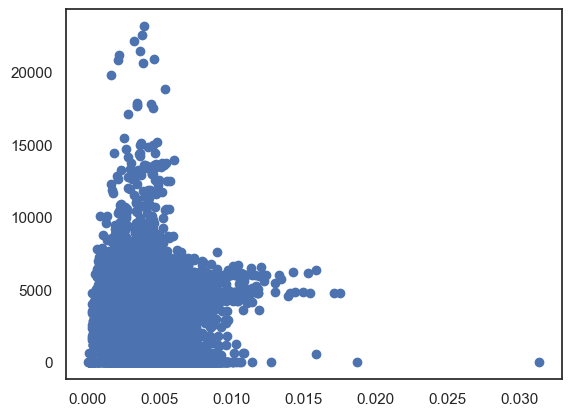

In [ ]:
df["break_fact"] = df["break_fact"]

plt.scatter(df["prod"],df["break_fact"])

correlation = df["prod"].corr(df["break_fact"])

# Выводим результат с округлением до 3 знаков после запятой
print(f"Корреляция между prod и average_work_time: {correlation:.3f}")

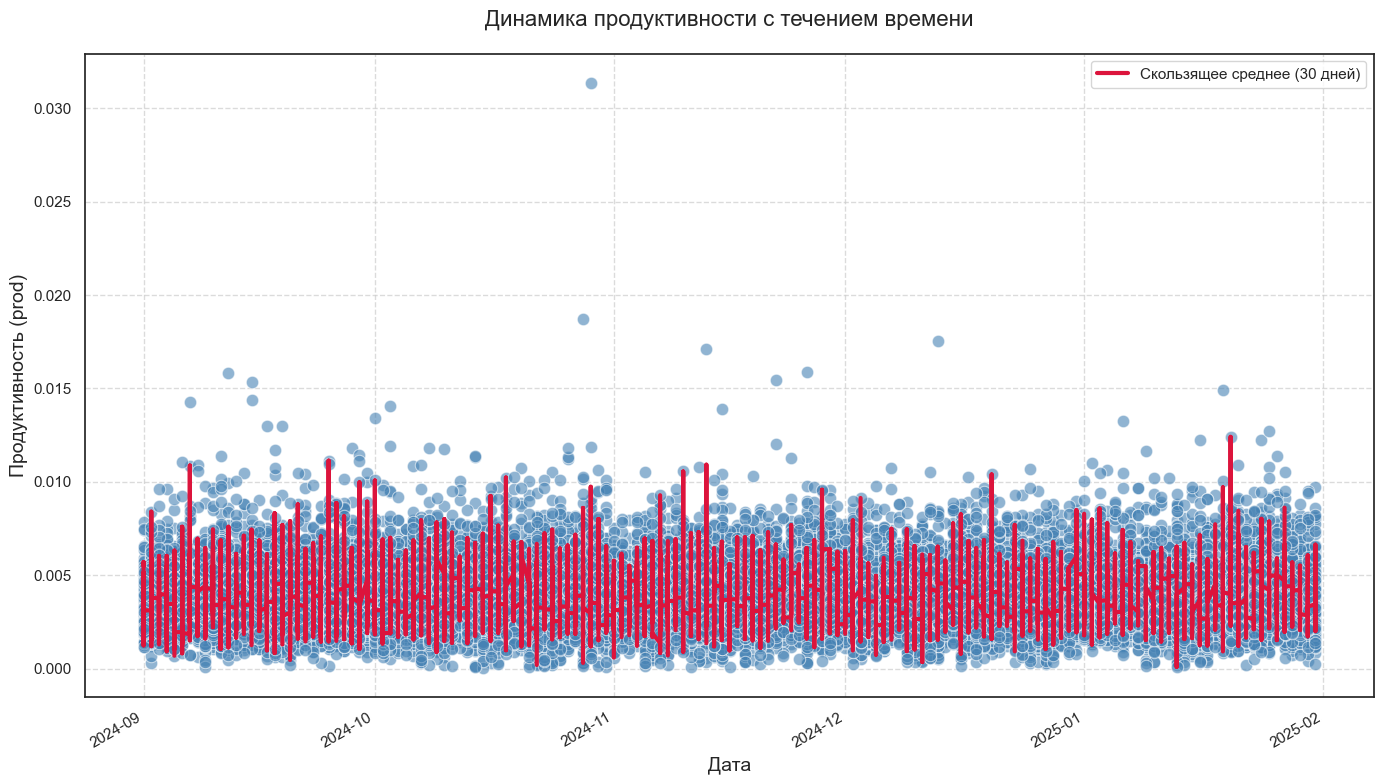

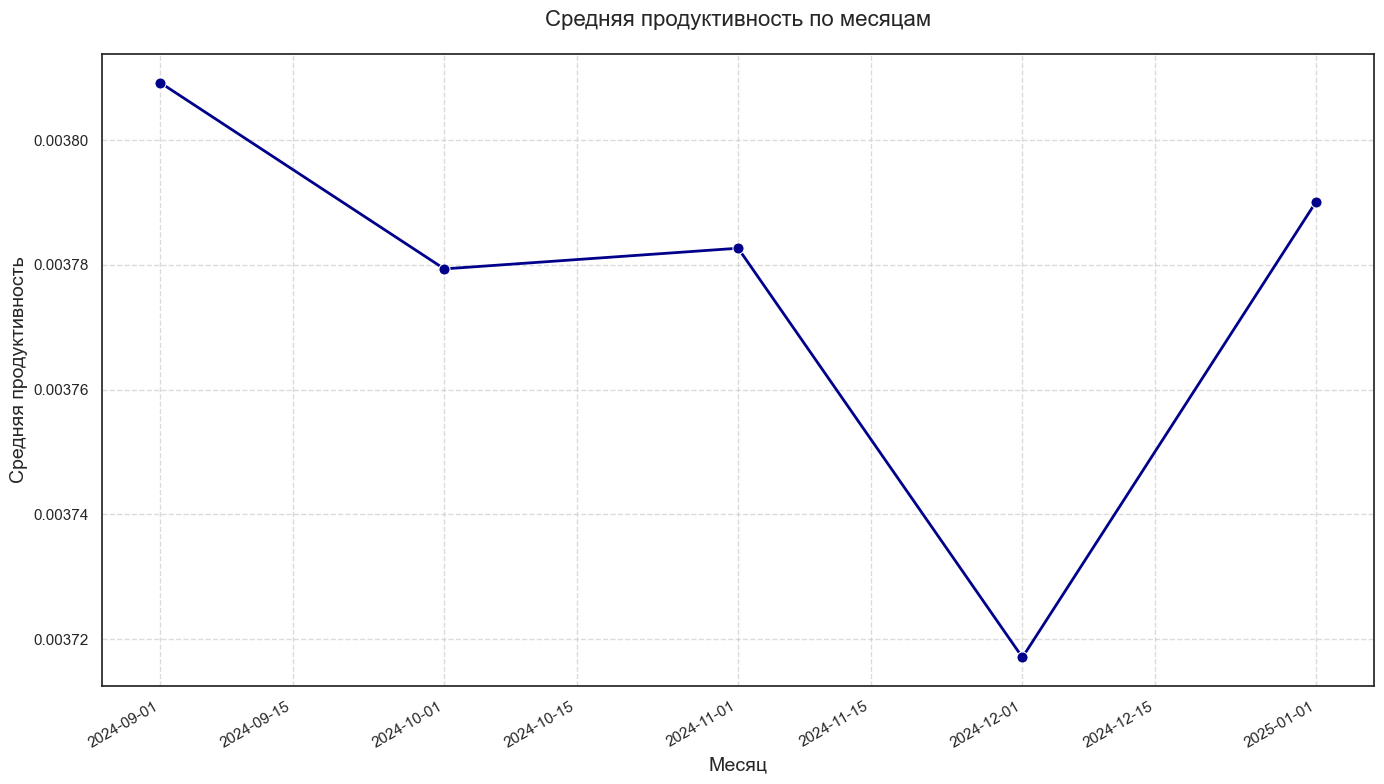

In [ ]:

if not pd.api.types.is_datetime64_any_dtype(df['calendar_dt']):
    df['calendar_dt'] = pd.to_datetime(df['calendar_dt'])

# Создаем график
plt.figure(figsize=(14, 8))

# Точечная диаграмма
sns.scatterplot(
    data=df,
    x='calendar_dt',
    y='prod',
    alpha=0.6,
    s=80,
    color='steelblue'
)

# Добавляем линию тренда (скользящее среднее)
df_sorted = df.sort_values('calendar_dt')
df_sorted['rolling_avg'] = df_sorted['prod'].rolling(window=30, min_periods=1).mean()

plt.plot(
    df_sorted['calendar_dt'],
    df_sorted['rolling_avg'],
    color='crimson',
    linewidth=3,
    label='Скользящее среднее (30 дней)'
)

# Улучшаем внешний вид графика
plt.title('Динамика продуктивности с течением времени', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Продуктивность (prod)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Форматируем ось X для лучшего отображения дат
plt.gcf().autofmt_xdate()
plt.tight_layout()

# Добавляем аннотацию с общим трендом
# from scipy import stats
# if len(df) > 1:  # Проверяем, что у нас достаточно данных для расчета тренда
#     # Преобразуем даты в числовой формат для расчета тренда
#     x_numeric = df['calendar_dt'].astype(int) / 10**18  # Нормализуем для избежания переполнения
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, df['prod'])
    
#     trend_direction = "возрастающий" if slope > 0 else "убывающий"
#     plt.annotate(
#         f"Общий тренд: {trend_direction} (r²={r_value**2:.3f})",
#         xy=(0.05, 0.95),
#         xycoords='axes fraction',
#         fontsize=12,
#         bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8)
#     )

# Показываем график
plt.show()

# Дополнительно: создаем график по месяцам для выявления сезонности
plt.figure(figsize=(14, 8))

# Добавляем колонку с месяцем и годом
df['year_month'] = df['calendar_dt'].dt.to_period('M')

# Группируем данные по месяцам и вычисляем среднюю продуктивность
monthly_prod = df.groupby('year_month')['prod'].mean().reset_index()
monthly_prod['year_month'] = monthly_prod['year_month'].dt.to_timestamp()

# Строим линейный график
sns.lineplot(
    data=monthly_prod,
    x='year_month',
    y='prod',
    marker='o',
    markersize=8,
    linewidth=2,
    color='darkblue'
)

plt.title('Средняя продуктивность по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


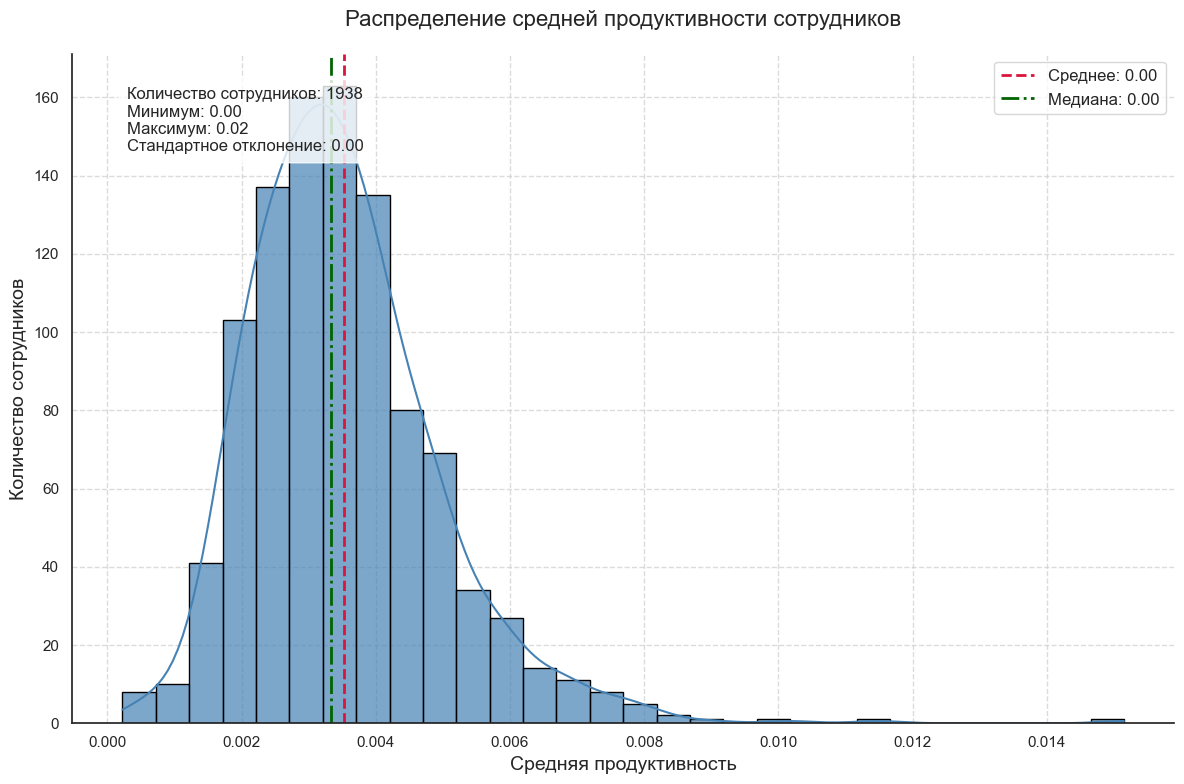

Статистика распределения средней продуктивности сотрудников:
count    1011.000000
mean        0.003522
std         0.001422
min         0.000225
25%         0.002556
50%         0.003340
75%         0.004207
max         0.015151
Name: avg_productivity, dtype: float64


In [ ]:
# Вычисляем среднюю продуктивность для каждого сотрудника
employee_avg_prod = df.groupby('id_employee')['prod'].mean().reset_index()
employee_avg_prod.rename(columns={'prod': 'avg_productivity'}, inplace=True)

# Создаем гистограмму
plt.figure(figsize=(12, 8))

# Используем KDE для сглаженного распределения
sns.histplot(
    data=employee_avg_prod, 
    x='avg_productivity',
    kde=True,
    bins=30,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)

# Добавляем вертикальную линию для среднего значения
plt.axvline(
    x=employee_avg_prod['avg_productivity'].mean(),
    color='crimson',
    linestyle='--',
    linewidth=2,
    label=f'Среднее: {employee_avg_prod["avg_productivity"].mean():.2f}'
)

# Добавляем вертикальную линию для медианы
plt.axvline(
    x=employee_avg_prod['avg_productivity'].median(),
    color='darkgreen',
    linestyle='-.',
    linewidth=2,
    label=f'Медиана: {employee_avg_prod["avg_productivity"].median():.2f}'
)

# Улучшаем внешний вид графика
plt.title('Распределение средней продуктивности сотрудников', fontsize=16, pad=20)
plt.xlabel('Средняя продуктивность', fontsize=14)
plt.ylabel('Количество сотрудников', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Добавляем статистическую информацию
stats_text = (
    f'Количество сотрудников: {len(employee_avg_prod)}\n'
    f'Минимум: {employee_avg_prod["avg_productivity"].min():.2f}\n'
    f'Максимум: {employee_avg_prod["avg_productivity"].max():.2f}\n'
    f'Стандартное отклонение: {employee_avg_prod["avg_productivity"].std():.2f}'
)

plt.annotate(
    stats_text,
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8),
    va='top'
)

# Настраиваем стиль
sns.despine()
plt.tight_layout()
plt.show()

# Дополнительно: выводим основные статистики
print("Статистика распределения средней продуктивности сотрудников:")
print(employee_avg_prod['avg_productivity'].describe())


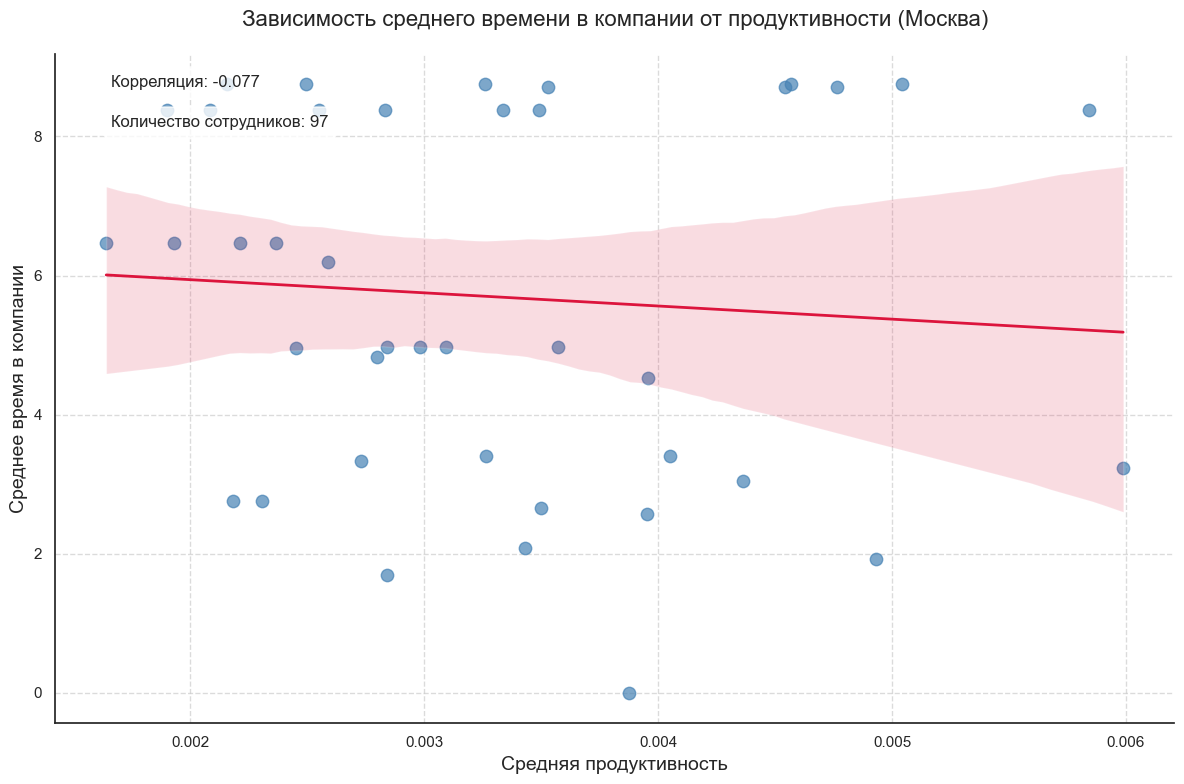

Количество сотрудников в Москве: 97
Корреляция между продуктивностью и временем в компании: -0.077

Статистика по продуктивности:
count    42.000000
mean      0.003320
std       0.001074
min       0.001640
25%       0.002509
50%       0.003176
75%       0.003956
max       0.005988
Name: prod, dtype: float64

Статистика по времени в компании:
count    86.000000
mean      5.932557
std       2.213695
min       0.000000
25%       4.972550
50%       6.468942
75%       6.468942
max       8.750875
Name: average_work_time, dtype: float64


In [ ]:
# Фильтруем данные только для Москвы
df["average_work_time"] = data["average_work_time"]
moscow_df = df[df["residential_city_nm"] == "г Москва"].copy()

# Группируем данные по employee_id и вычисляем средние значения
# Предполагаю, что у вас есть колонка с временем в компании, например 'company_time'
# Если такой колонки нет, замените ее на нужную вам
employee_stats = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'average_work_time': 'mean'  # Замените на вашу колонку с временем в компании
}).reset_index()

# Создаем график
plt.figure(figsize=(12, 8))

# Scatter plot с регрессионной линией
sns.regplot(
    data=employee_stats,
    x='prod',
    y='average_work_time',  # Замените на вашу колонку
    scatter_kws={
        "alpha": 0.7,
        "s": 80,
        "color": "steelblue"
    },
    line_kws={
        "color": "crimson",
        "lw": 2
    }
)

# Улучшаем внешний вид графика
plt.title('Зависимость среднего времени в компании от продуктивности (Москва)', fontsize=16, pad=20)
plt.xlabel('Средняя продуктивность', fontsize=14)
plt.ylabel('Среднее время в компании', fontsize=14)  # Измените название по необходимости
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем аннотацию с коэффициентом корреляции
correlation = employee_stats['prod'].corr(employee_stats['average_work_time'])
plt.annotate(
    f"Корреляция: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Добавляем информацию о количестве сотрудников
plt.annotate(
    f"Количество сотрудников: {len(employee_stats)}",
    xy=(0.05, 0.89),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Настраиваем стиль
sns.despine()
plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print(f"Количество сотрудников в Москве: {len(employee_stats)}")
print(f"Корреляция между продуктивностью и временем в компании: {correlation:.3f}")
print("\nСтатистика по продуктивности:")
print(employee_stats['prod'].describe())
print("\nСтатистика по времени в компании:")
print(employee_stats['average_work_time'].describe())


In [40]:
from scipy import stats

# Создаем группы по опыту - теперь 15 групп вместо 5
moscow_df.sort_values(by='skill_group_exp', inplace=True)
try:
    # Пробуем использовать qcut с 15 группами
    moscow_df['exp_group'] = pd.qcut(
        moscow_df['skill_group_exp'], 
        17, 
        labels=[f'месяцев {i+1}' for i in range(17)],
        duplicates='drop'  # Обрабатываем возможные дубликаты
    )
except:
    # Если возникает ошибка из-за недостаточного количества уникальных значений,
    # используем меньшее количество групп
    n_groups = min(12, moscow_df['skill_group_exp'].nunique())
    print(f"Невозможно создать 15 групп, создаем {n_groups} групп")
    moscow_df['exp_group'] = pd.qcut(
        moscow_df['skill_group_exp'], 
        n_groups, 
        labels=[f'Уровень {i+1}' for i in range(n_groups)],
        duplicates='drop'
    )

# Агрегируем данные по группам опыта
exp_stats = moscow_df.groupby('exp_group').agg({
    'prod': ['mean', 'std', 'count'],
    'id_employee': 'nunique',
    'skill_group_exp': 'mean'  # Добавляем среднее значение опыта для каждой группы
})

exp_stats.columns = ['Средняя продуктивность', 'Стандартное отклонение', 'Количество записей',
                     'Количество сотрудников', 'Средний опыт']
exp_stats = exp_stats.reset_index()

# Создаем фигуру
plt.figure(figsize=(18, 10))

# Создаем bar plot с error bars
plt.errorbar(
    x=exp_stats['exp_group'],
    y=exp_stats['Средняя продуктивность'],
    yerr=exp_stats['Стандартное отклонение'],
    fmt='o',
    capsize=5,
    ecolor='black',
    markersize=8
)

# Добавляем bar plot
bars = plt.bar(
    exp_stats['exp_group'],
    exp_stats['Средняя продуктивность'],
    alpha=0.5,
    color='skyblue',
    width=0.7
)

# Добавляем подиси с количеством сотрудников (только для каждой второй группы, чтобы избежать перекрытия)
for i, bar in enumerate(bars):
    if i % 2 == 0:  # Показываем метки только для каждой второй группы
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.02,
            f"n={exp_stats['Количество сотрудников'].iloc[i]}",
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=45
        )

# Рассчитываем регрессию
x = exp_stats['Средний опыт'].values
y = exp_stats['Средняя продуктивность'].values

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Добавляем вторую ось X для отображения среднего опыта
ax1 = plt.gca()
ax2 = ax1.twiny()

# Устанавливаем позиции и метки для второй оси X
ax2.set_xlim(ax1.get_xlim())
# Показываем только каждую третью метку, чтобы избежать перекрытия
tick_positions = range(0, len(exp_stats), 3)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels([f"{exp_stats['Средний опыт'].iloc[i]:.2f}" for i in tick_positions])
ax2.set_xlabel('Средний опыт в группе (числовое значение)', fontsize=12)

# Создаем более детальную линию регрессии для плавного отображения
x_reg = np.linspace(min(x), max(x), 100)
y_reg = intercept + slope * x_reg

# Преобразуем значения x_reg для соответствия позициям на оси категорий
x_min, x_max = min(x), max(x)
x_reg_normalized = (x_reg - x_min) / (x_max - x_min) * (len(exp_stats) - 1)

# Добавляем линию регрессии на график
ax2.plot(
    x_reg_normalized,
    y_reg,
    'r-',
    linewidth=2,
    label=f'y = {slope:.4f}x + {intercept:.4f}'
)

# Добавляем информацию о регрессии в легенду
plt.legend([
    f'Регрессия: y = {slope:.4f}x + {intercept:.4f}',
    f'R² = {r_value**2:.4f}',
    f'p-value = {p_value:.6f}',
    f'Стандартная ошибка = {std_err:.4f}'
], loc='best', fontsize=12)

# Добавляем текстовую информацию о регрессии на график
plt.text(
    0.05, 0.95,
    f'Регрессионная статистика:\n'
    f'Коэффициент наклона: {slope:.4f}\n'
    f'Свободный член: {intercept:.4f}\n'
    f'R²: {r_value**2:.4f}\n'
    f'p-value: {p_value:.6f}\n'
    f'Стандартная ошибка: {std_err:.4f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.title('Продуктивность сотрудников Москвы по 15 группам опыта с регрессионной прямой', fontsize=16)
plt.xlabel('Группа опыта', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Поворачиваем метки для лучшей читаемости
plt.tight_layout()
plt.show()

# Дополнительно: рассчитываем корреляцию Пирсона между опытом и продуктивностью
# на уровне индивидуальных сотрудников для более точного анализа
employee_level_data = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'skill_group_exp': 'mean'
}).reset_index()

# Создаем дополнительный график регрессии на уровне сотрудников
plt.figure(figsize=(12, 8))

# Scatter plot с регрессионной линией
# Убедимся, что используем правильные имена столбцов
sns.regplot(
    x='skill_group_exp',  # Используем правильное имя столбца
    y='prod',             # Используем правильное имя столбца
    data=employee_level_data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title('Зависимость продуктивности от опыта на уровне сотрудников', fontsize=16)
plt.xlabel('Опыт сотрудника', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

pearson_corr, pearson_p = stats.pearsonr(employee_level_data['skill_group_exp'], employee_level_data['prod'])
spearman_corr, spearman_p = stats.spearmanr(employee_level_data['skill_group_exp'], employee_level_data['prod'])

print("\nАнализ взаимосвязи между опытом и продуктивностью сотрудников в Москве:")
print(f"Количество сотрудников в анализе: {len(employee_level_data)}")
print(f"Корреляция Пирсона: {pearson_corr:.4f} (p-value: {pearson_p:.6f})")
print(f"Корреляция Спирмена: {spearman_corr:.4f} (p-value: {spearman_p:.6f})")

# Интерпретация результатов
print("\nВЫВОД:")
if p_value < 0.05:
    significance = "статистически значимая"
else:
    significance = "статистически незначимая"

if r_value**2 < 0.3:
    strength = "слабая"
elif r_value**2 < 0.6:
    strength = "умеренная"
else:
    strength = "сильная"

if slope > 0:
    direction = "положительная"
else:
    direction = "отрицательная"

print(f"Между опытом сотрудников и их продуктивностью в Москве наблюдается {significance} {strength} {direction} связь.")
print(f"Коэффициент детерминации (R²) составляет {r_value**2:.4f}, что означает, что {r_value**2*100:.1f}% вариации")
print(f"в продуктивности можно объяснить различиями в опыте сотрудников.")

if p_value < 0.05:
    print(f"P-value ({p_value:.6f}) меньше 0.05, что указывает на статистическую значимость результатов.")
    print(f"С увеличением опыта на 1 единицу, продуктивность в среднем изменяется на {slope:.4f} единиц.")
else:
    print(f"P-value ({p_value:.6f}) больше 0.05, что указывает на отсутствие статистически значимой связи.")
    print("Нельзя с уверенностью утверждать, что опыт влияет на продуктивность сотрудников в Москве.")

if pearson_p < 0.05 and spearman_p < 0.05:
    print("\nАнализ на уровне индивидуальных сотрудников также подтверждает наличие статистически значимой связи.")
    print(f"Корреляция Пирсона ({pearson_corr:.4f}) и Спирмена ({spearman_corr:.4f}) указывают на")
    if abs(pearson_corr - spearman_corr) > 0.1:
        print("существенные различия между линейной и ранговой корреляцией, что может говорить о нелинейной связи.")
    else:
        print("схожие значения, что подтверждает характер выявленной линейной зависимости.")

# Дополнительно: проверка на нелинейную зависимость
print("\nПроверка на нелинейную зависимость:")

# Полиномиальная регрессия 2-й степени
poly_features = np.column_stack((x, x**2))
poly_model = np.polyfit(x, y, 2)
poly_y = np.polyval(poly_model, x_reg)

# Рассчитываем R² для полиномиальной модели
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - np.polyval(poly_model, x))**2)
r_squared_poly = 1 - (ss_residual / ss_total)

print(f"R² для линейной модели: {r_value**2:.4f}")
print(f"R² для полиномиальной модели 2-й степени: {r_squared_poly:.4f}")

if r_squared_poly > r_value**2 + 0.1:
    print("Полиномиальная модель значительно лучше описывает данные, что указывает на нелинейную зависимость.")
elif r_squared_poly > r_value**2:
    print("Полиномиальная модель немного лучше описывает данные, возможна слабая нелинейная зависимость.")
else:
    print("Линейная модель адекватно описывает данные, нет существенных признаков нелинейной зависимости.")



Невозможно создать 15 групп, создаем 12 групп


ValueError: Bin labels must be one fewer than the number of bin edges

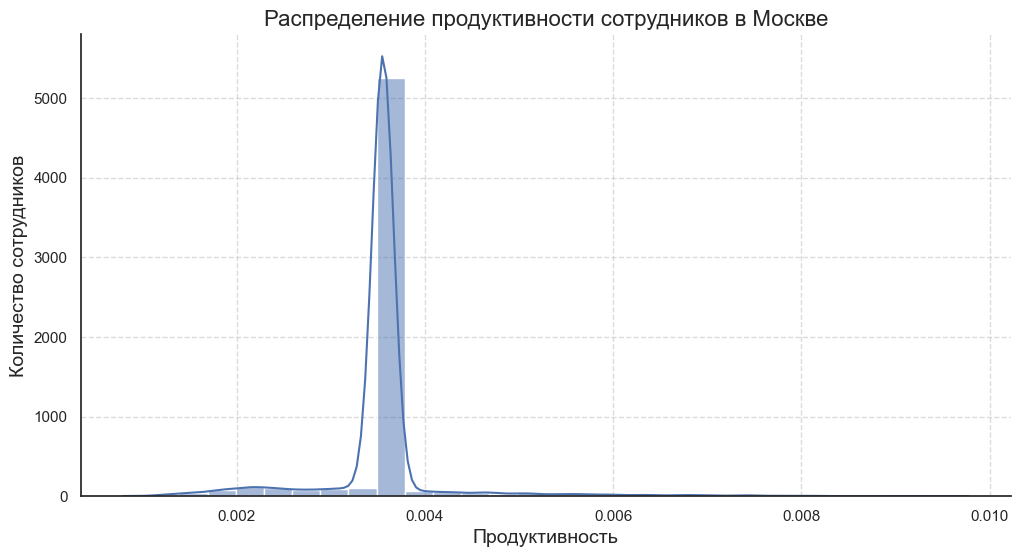

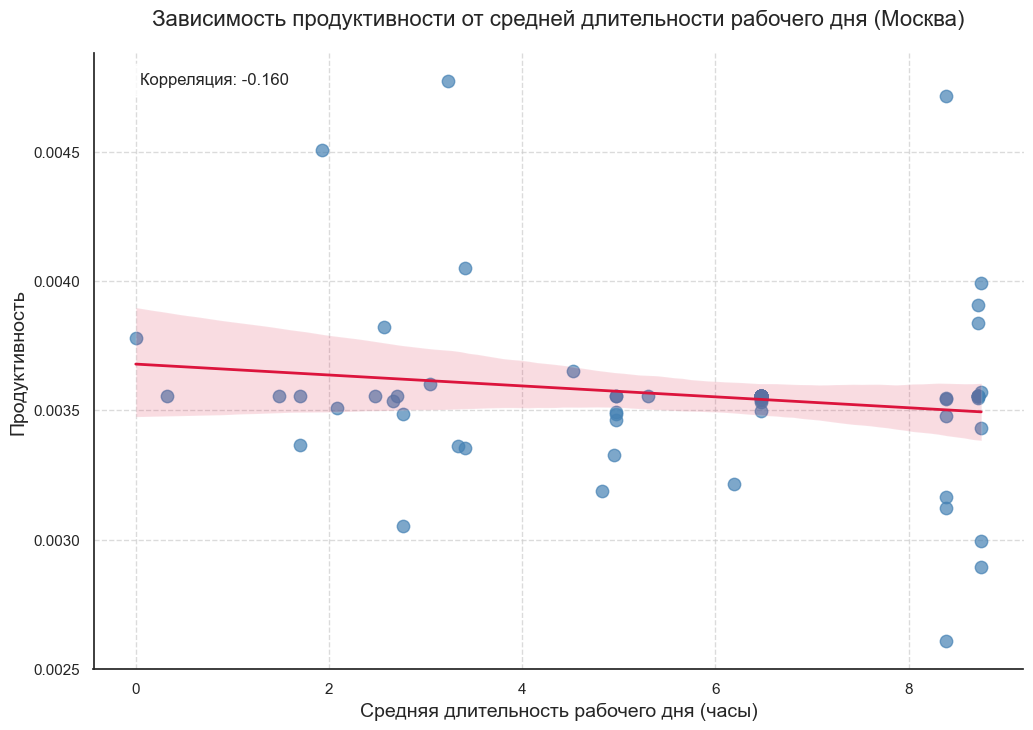

KeyError: 'date_column'

In [ ]:
# 1. Распределение продуктивности в Москве
moscow_df = df[df["residential_city_nm"] == "г Москва"].copy()
plt.figure(figsize=(12, 6))
sns.histplot(moscow_df['prod'], kde=True, bins=30)
plt.title('Распределение продуктивности сотрудников в Москве', fontsize=16)
plt.xlabel('Продуктивность', fontsize=14)
plt.ylabel('Количество сотрудников', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# 2. Продуктивность и средняя длительность рабочего дня
employee_stats = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'average_work_time': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.regplot(
    data=employee_stats,
    x='average_work_time',
    y='prod',
    scatter_kws={"alpha": 0.7, "s": 80, "color": "steelblue"},
    line_kws={"color": "crimson", "lw": 2}
)
plt.title('Зависимость продуктивности от средней длительности рабочего дня (Москва)', fontsize=16, pad=20)
plt.xlabel('Средняя длительность рабочего дня (часы)', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
correlation = employee_stats['average_work_time'].corr(employee_stats['prod'])
plt.annotate(
    f"Корреляция: {correlation:.3f}",
    xy=(0.05, 0.95), xycoords="axes fraction", fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)
sns.despine()
plt.show()

# 3. Боксплот продуктивности по дням недели
if 'day_of_week' not in moscow_df.columns:
    # Если нет колонки с днем недели, создаем её (предполагая, что есть колонка с датой)
    # Замените 'date_column' на имя вашей колонки с датой
    moscow_df['day_of_week'] = moscow_df['date_column'].dt.day_name()

plt.figure(figsize=(14, 8))
sns.boxplot(x='day_of_week', y='prod', data=moscow_df, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Продуктивность по дням недели (Москва)', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()




# 6. Временной тренд продуктивности (если есть данные по датам)
if 'date_column' in moscow_df.columns:
    # Группируем по дате и вычисляем среднюю продуктивность
    time_trend = moscow_df.groupby('date_column')['prod'].mean().reset_index()
    
    plt.figure(figsize=(16, 8))
    plt.plot(time_trend['date_column'], time_trend['prod'], marker='o', linestyle='-')
    plt.title('Динамика средней продуктивности в Москве', fontsize=16)
    plt.xlabel('Дата', fontsize=14)
    plt.ylabel('Средняя продуктивность', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()


# 8. Распределение продуктивности по группам навыков (если есть такая колонка)
if 'skill_group' in moscow_df.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='skill_group', y='prod', data=moscow_df)
    plt.title('Продуктивность по группам навыков (Москва)', fontsize=16)
    plt.xlabel('Группа навыков', fontsize=14)
    plt.ylabel('Продуктивность', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()
    plt.show()

# 9. Кластерный анализ сотрудников по продуктивности и опыту
from sklearn.cluster import KMeans

# Выбираем переменные для кластеризации
X = employee_stats[['prod', 'skill_group_exp']].copy()
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определяем оптимальное количество кластеров (метод локтя)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров', fontsize=16)
plt.xlabel('Количество кластеров', fontsize=14)
plt.ylabel('Инерция', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Выбираем оптимальное количество кластеров (например, 4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
employee_stats['cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
plt.figure(figsize=(12, 8))
scatter = plt.scatter(employee_stats['prod'], employee_stats['skill_group_exp'], 
                      c=employee_stats['cluster'], cmap='viridis', 
                      s=80, alpha=0.7)
plt.colorbar(scatter, label='Кластер')
plt.title('Кластеризация сотрудников по продуктивности и опыту (Москва)', fontsize=16)
plt.xlabel('Продуктивность', fontsize=14)
plt.ylabel('Опыт (лет)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Анализ характеристик кластеров
cluster_stats = employee_stats.groupby('cluster').agg({
    'prod': ['mean', 'std', 'min', 'max'],
    'skill_group_exp': ['mean', 'std', 'min', 'max'],
    'id_employee': 'count'
}).reset_index()
print("Характеристики кластеров:")
print(cluster_stats)




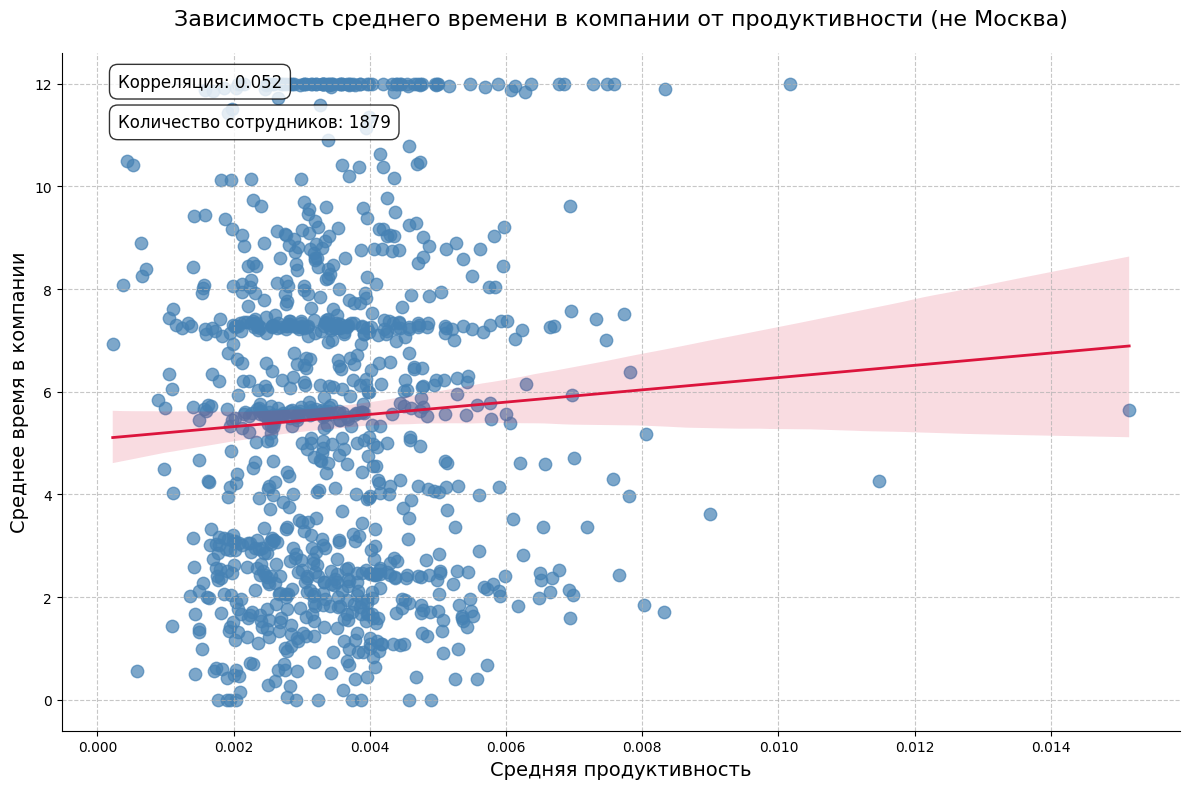

Количество сотрудников в Москве: 1879
Корреляция между продуктивностью и временем в компании: 0.052

Статистика по продуктивности:
count    979.000000
mean       0.003531
std        0.001431
min        0.000225
25%        0.002558
50%        0.003351
75%        0.004224
max        0.015151
Name: prod, dtype: float64

Статистика по времени в компании:
count    1875.000000
mean        5.825896
std         3.250748
min         0.000000
25%         2.842330
50%         6.054545
75%         7.411404
max        12.000000
Name: skill_group_exp, dtype: float64


In [ ]:
#  Фильтруем данные только для Москвы
df["average_work_time"] = data["average_work_time"]
moscow_df = df[df["residential_city_nm"] != "г Москва"].copy()

# Группируем данные по employee_id и вычисляем средние значения
# Предполагаю, что у вас есть колонка с временем в компании, например 'company_time'
# Если такой колонки нет, замените ее на нужную вам
employee_stats = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'skill_group_exp': 'mean'  # Замените на вашу колонку с временем в компании
}).reset_index()

# employee_stats = employee_stats[employee_stats['skill_group_exp'] < 10]

# Создаем график
plt.figure(figsize=(12, 8))

# Scatter plot с регрессионной линией
sns.regplot(
    data=employee_stats,
    x='prod',
    y='skill_group_exp',  # Замените на вашу колонку
    scatter_kws={
        "alpha": 0.7,
        "s": 80,
        "color": "steelblue"
    },
    line_kws={
        "color": "crimson",
        "lw": 2
    }
)

# Улучшаем внешний вид графика
plt.title('Зависимость среднего времени в компании от продуктивности (не Москва)', fontsize=16, pad=20)
plt.xlabel('Средняя продуктивность', fontsize=14)
plt.ylabel('Среднее время в компании', fontsize=14)  # Измените название по необходимости
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем аннотацию с коэффициентом корреляции
correlation = employee_stats['prod'].corr(employee_stats['skill_group_exp'])
plt.annotate(
    f"Корреляция: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Добавляем информацию о количестве сотрудников
plt.annotate(
    f"Количество сотрудников: {len(employee_stats)}",
    xy=(0.05, 0.89),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Настраиваем стиль
sns.despine()
plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print(f"Количество сотрудников в Москве: {len(employee_stats)}")
print(f"Корреляция между продуктивностью и временем в компании: {correlation:.3f}")
print("\nСтатистика по продуктивности:")
print(employee_stats['prod'].describe())
print("\nСтатистика по времени в компании:")
print(employee_stats['skill_group_exp'].describe())


C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\1897019570.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_prod.index, y=weekday_prod.values, palette='viridis')


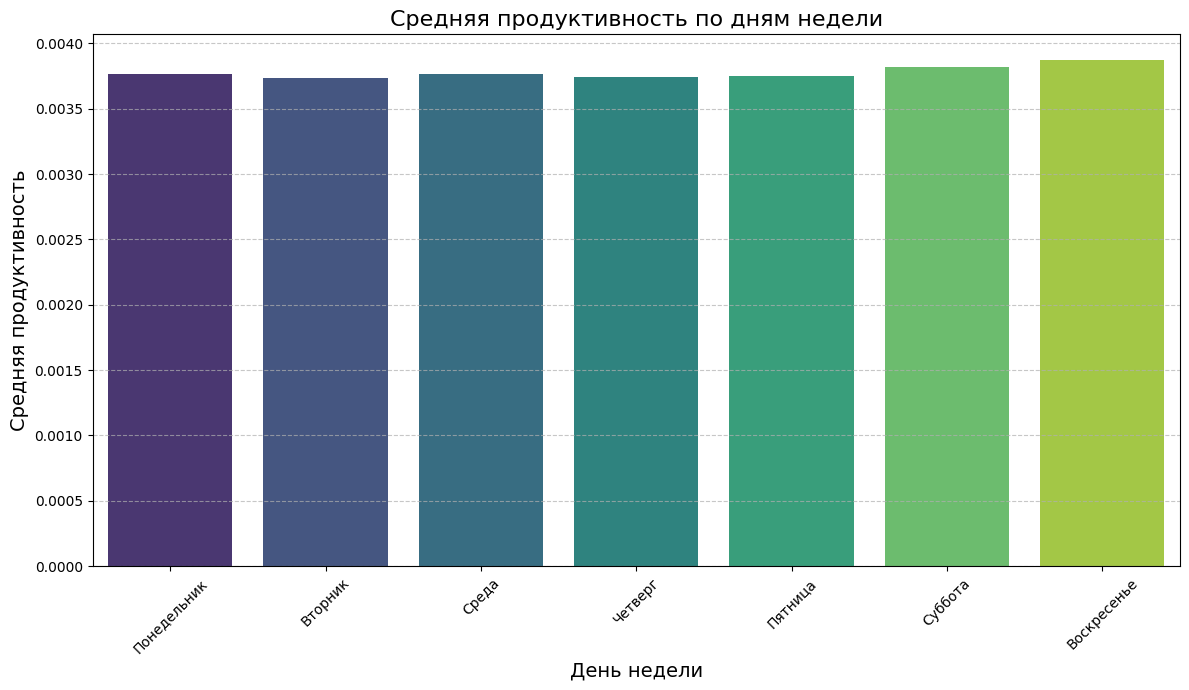

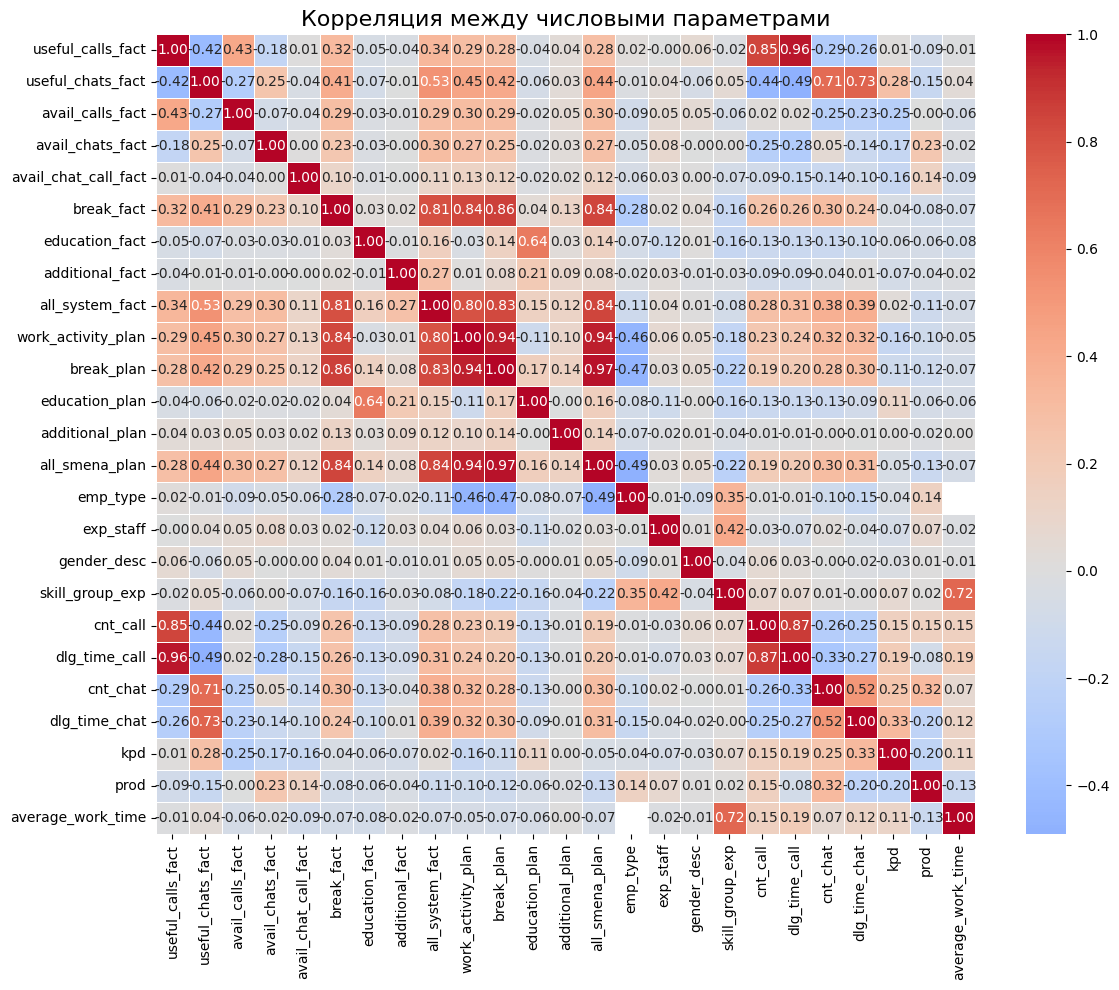

C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\1897019570.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


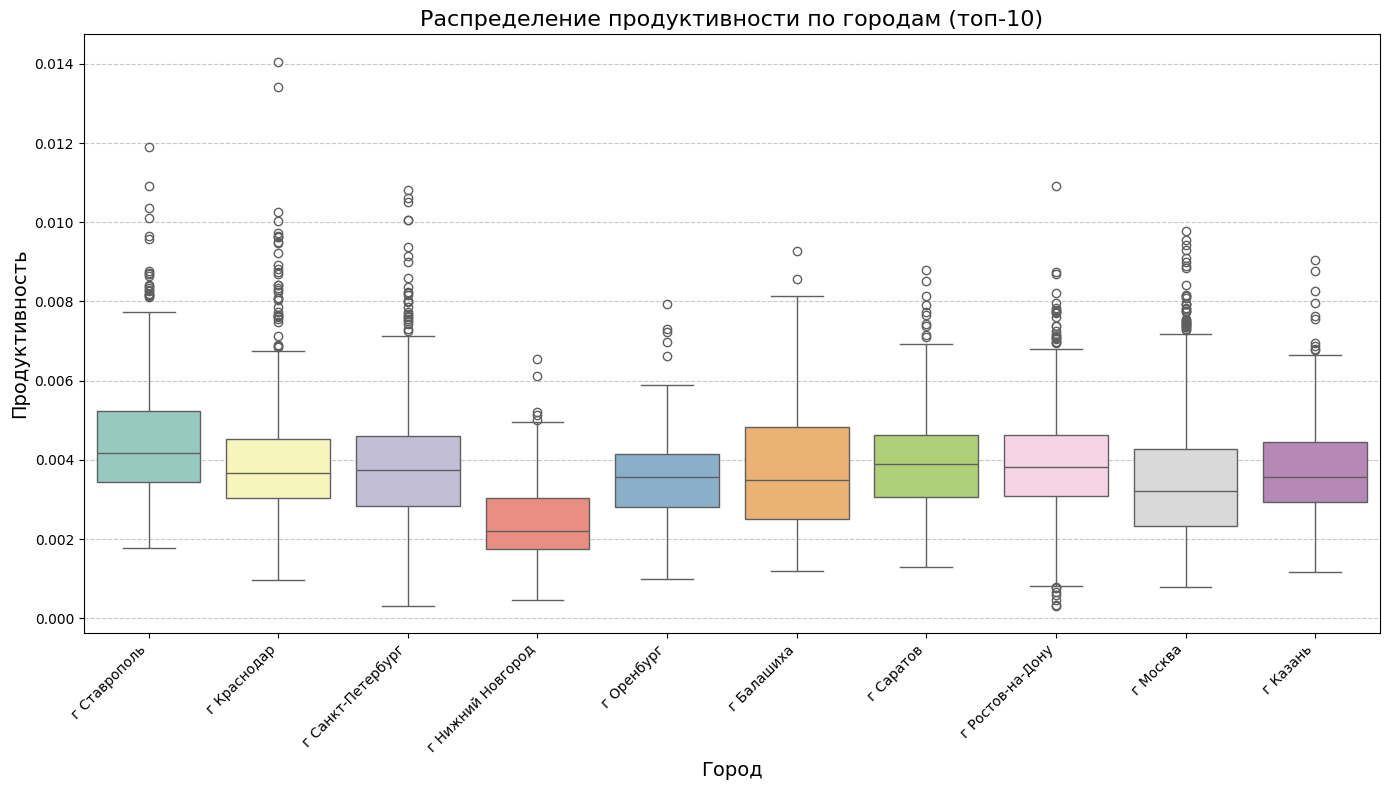

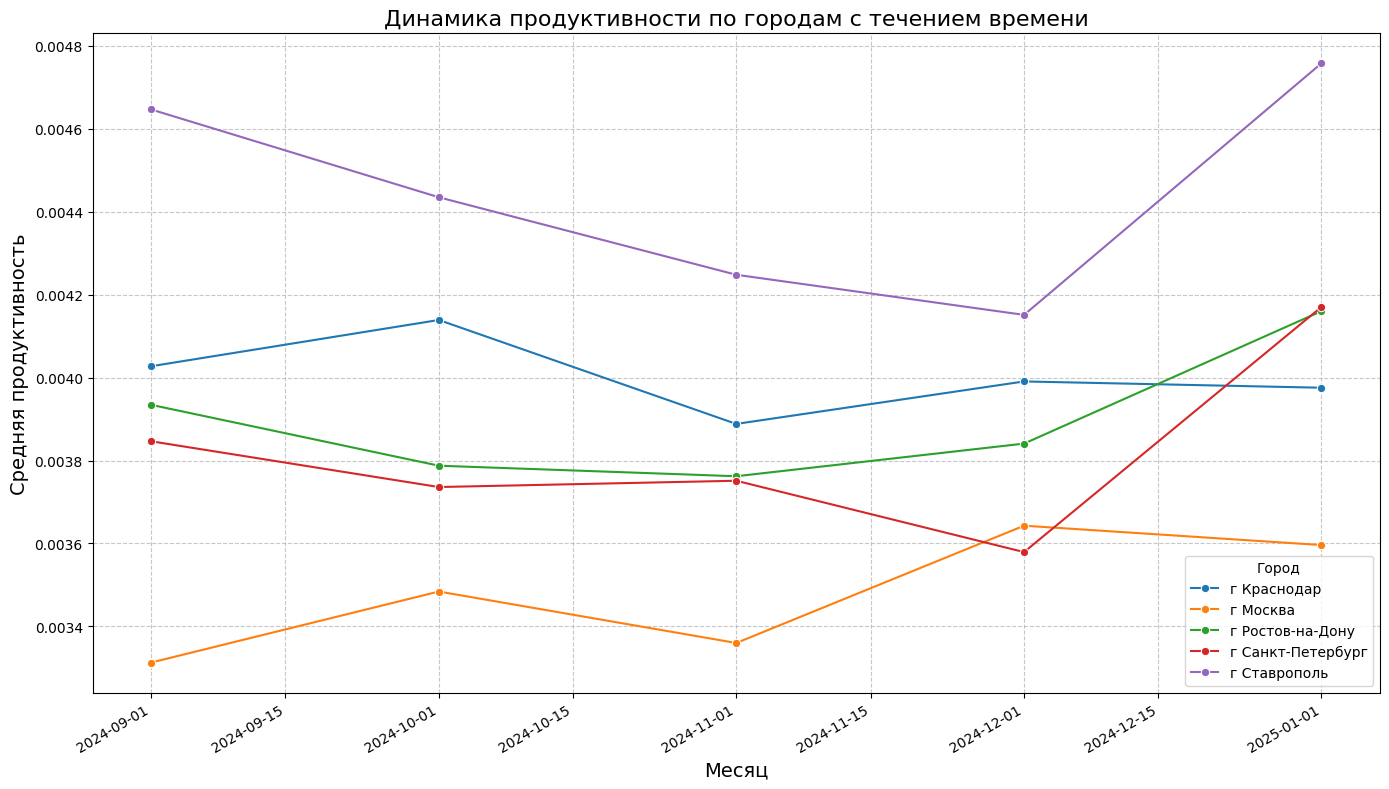

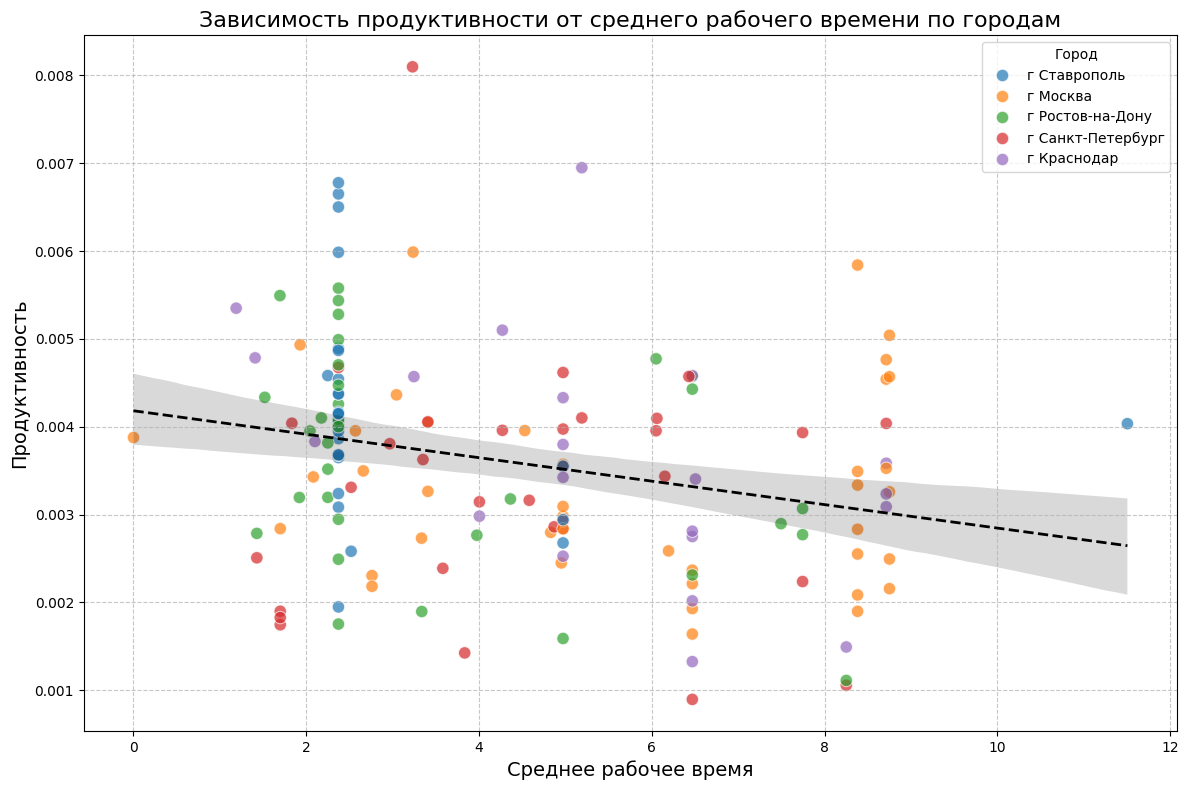

In [ ]:
# График 1: Продуктивность по дням недели
plt.figure(figsize=(12, 7))

# Добавляем день недели как новую колонку
df['day_of_week'] = df['calendar_dt'].dt.day_name()

# Определяем правильный порядок дней недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_ru = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Создаем словарь для перевода
day_translation = dict(zip(day_order, day_order_ru))
df['day_of_week_ru'] = df['day_of_week'].map(day_translation)

# Группируем данные по дням недели и вычисляем среднюю продуктивность
weekday_prod = df.groupby('day_of_week_ru')['prod'].mean().reindex(day_order_ru)

# Создаем барплот
sns.barplot(x=weekday_prod.index, y=weekday_prod.values, palette='viridis')
plt.title('Средняя продуктивность по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График 2: Продуктивность в зависимости от возраста (если есть данные о возрасте)
# Если у вас нет данных о возрасте, можно использовать другой параметр
if 'age' in df.columns:
    plt.figure(figsize=(14, 8))
    
    # Группируем по возрасту
    age_prod = df.groupby('age')['prod'].mean().reset_index()
    
    # Создаем линейный график
    sns.lineplot(data=age_prod, x='age', y='prod', marker='o', linewidth=2)
    plt.title('Зависимость продуктивности от возраста', fontsize=16)
    plt.xlabel('Возраст', fontsize=14)
    plt.ylabel('Средняя продуктивность', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# График 3: Тепловая карта корреляций между числовыми параметрами
plt.figure(figsize=(12, 10))

# Выбираем только числовые колонки
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

# Создаем тепловую карту
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Корреляция между числовыми параметрами', fontsize=16)
plt.tight_layout()
plt.show()

# График 4: Боксплот продуктивности по городам (топ-10 городов)
plt.figure(figsize=(14, 8))

# Находим топ-10 городов по количеству сотрудников
top_cities = df['residential_city_nm'].value_counts().nlargest(10).index.tolist()
top_cities_df = df[df['residential_city_nm'].isin(top_cities)]

# Создаем боксплот
sns.boxplot(
    data=top_cities_df,
    x='residential_city_nm',
    y='prod',
    palette='Set3'
)
plt.title('Распределение продуктивности по городам (топ-10)', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# График 5: Изменение продуктивности с течением времени по разным городам
plt.figure(figsize=(14, 8))

# Группируем данные по месяцу и городу (для топ-5 городов)
top5_cities = df['residential_city_nm'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['residential_city_nm'].isin(top5_cities)].copy()
df_top5['year_month'] = df_top5['calendar_dt'].dt.to_period('M')
city_month_prod = df_top5.groupby(['year_month', 'residential_city_nm'])['prod'].mean().reset_index()
city_month_prod['year_month'] = city_month_prod['year_month'].dt.to_timestamp()

# Создаем линейный график
sns.lineplot(
    data=city_month_prod,
    x='year_month',
    y='prod',
    hue='residential_city_nm',
    marker='o',
    markersize=6
)
plt.title('Динамика продуктивности по городам с течением времени', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Город')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# График 6: Зависимость продуктивности от среднего рабочего времени (с группировкой по городам)
plt.figure(figsize=(12, 8))

# Группируем данные по сотрудникам
employee_stats = df.groupby(['id_employee', 'residential_city_nm']).agg({
    'prod': 'mean',
    'average_work_time': 'mean'
}).reset_index()

# Фильтруем только топ-5 городов для наглядности
employee_stats_top5 = employee_stats[employee_stats['residential_city_nm'].isin(top5_cities)]

# Создаем scatter plot с разными цветами для городов
sns.scatterplot(
    data=employee_stats_top5,
    x='average_work_time',
    y='prod',
    hue='residential_city_nm',
    alpha=0.7,
    s=80
)

# Добавляем общую линию тренда
sns.regplot(
    data=employee_stats_top5,
    x='average_work_time',
    y='prod',
    scatter=False,
    line_kws={"color": "black", "lw": 2, "linestyle": "--"}
)

plt.title('Зависимость продуктивности от среднего рабочего времени по городам', fontsize=16)
plt.xlabel('Среднее рабочее время', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Город')
plt.tight_layout()
plt.show()

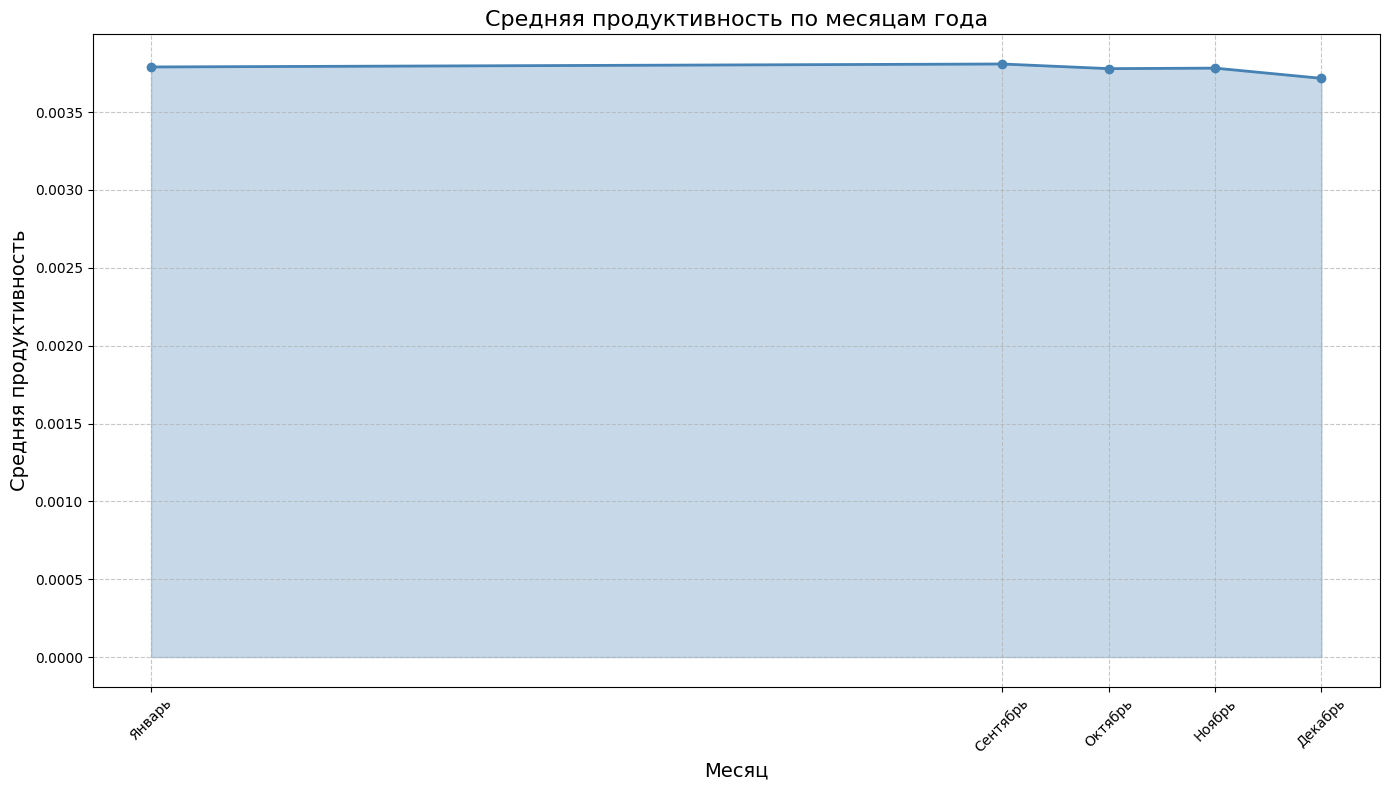

C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\1023359160.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(city_stats['residential_city_nm'], rotation=45, ha='right')


<Figure size 1400x1000 with 0 Axes>

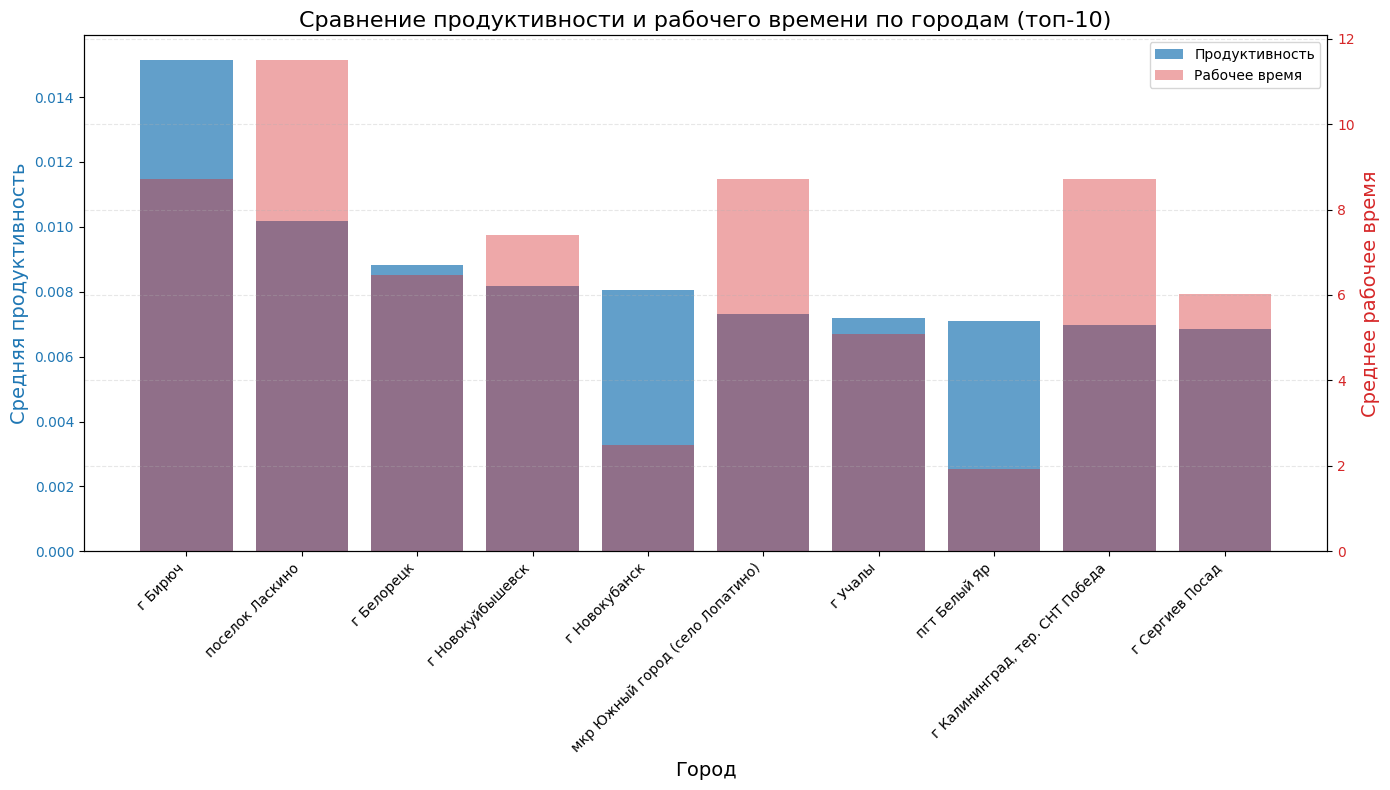

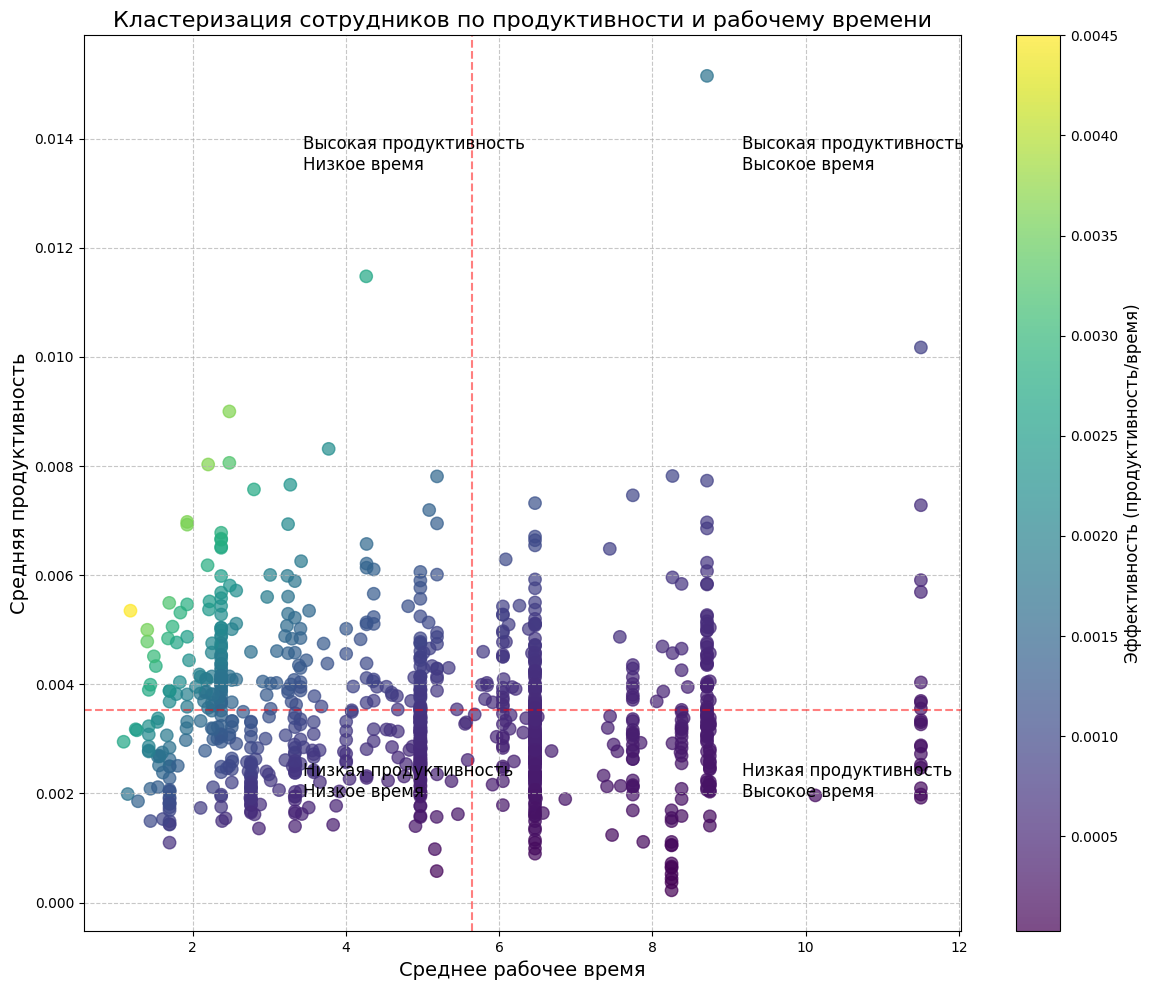

C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\1023359160.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='residential_city_nm', y='prod', data=city_df, ax=ax1, palette='Set3')
C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\1023359160.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='residential_city_nm', y='prod', data=city_df, ax=ax2, palette='Set3', size=5, alpha=0.7)
c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Админ\AppData\Local\Programs\Python\Pyth

<Figure size 1400x1000 with 0 Axes>

c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

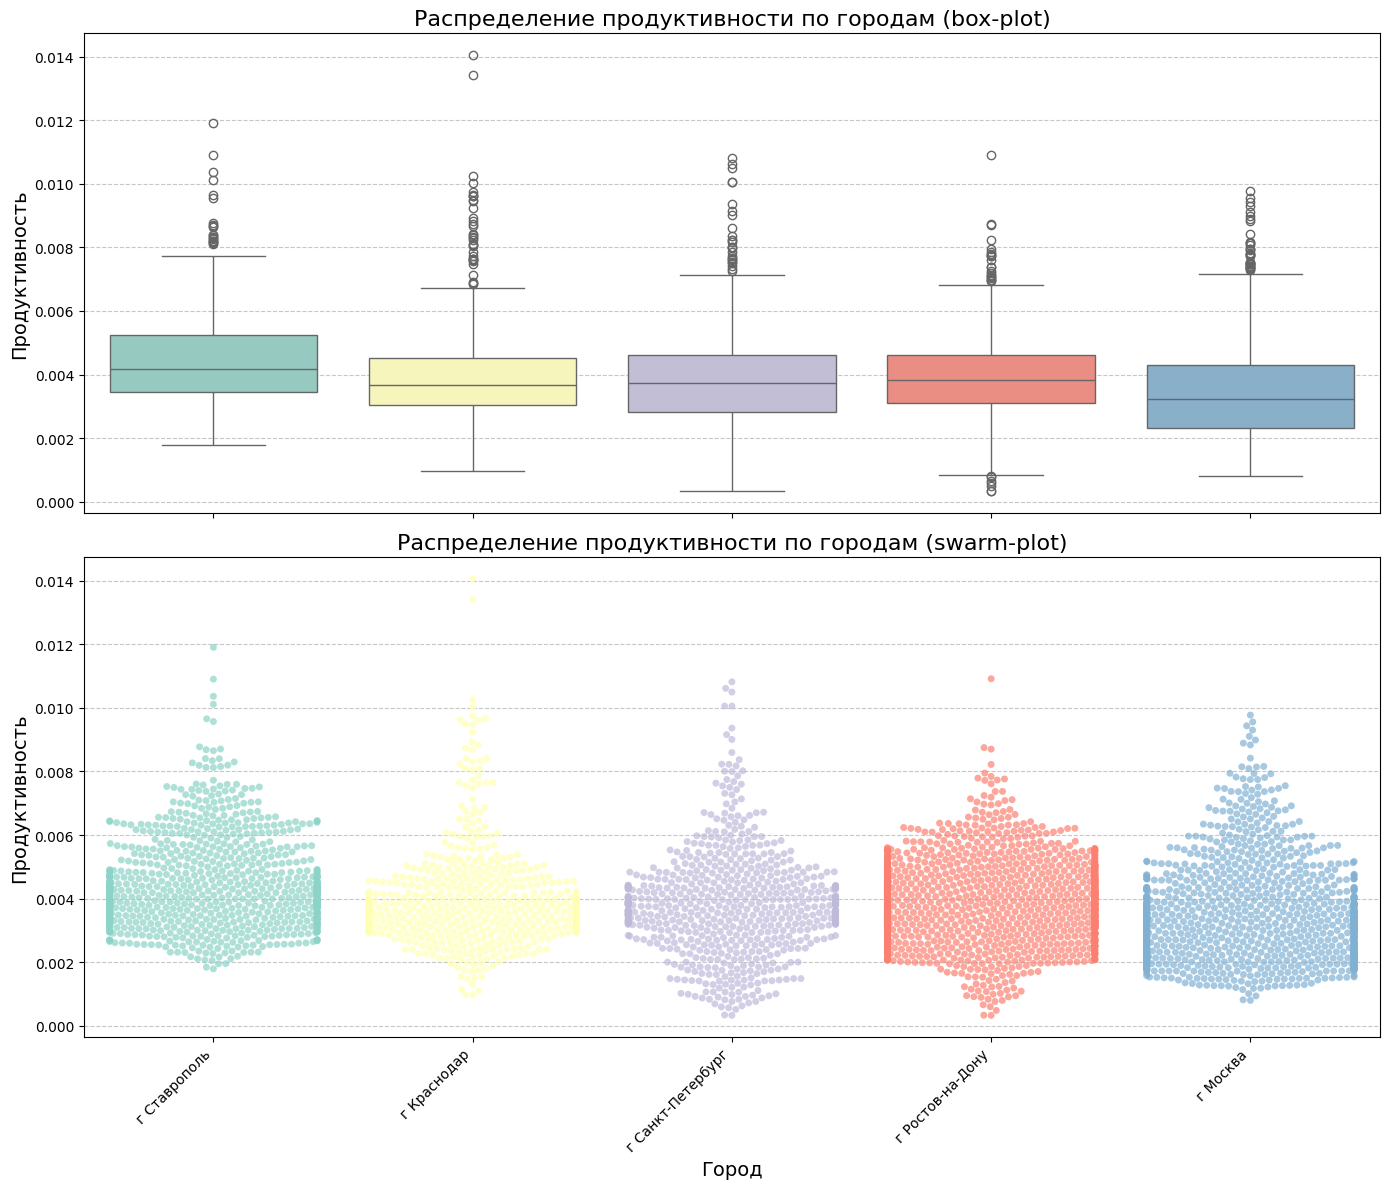

In [ ]:
# График 7: Распределение продуктивности по уровню образования (если есть такие данные)
if 'education_level' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Создаем виолин-плот для визуализации распределения
    sns.violinplot(
        data=df,
        x='education_level',
        y='prod',
        palette='Set2',
        inner='quartile'
    )
    
    plt.title('Распределение продуктивности по уровню образования', fontsize=16)
    plt.xlabel('Уровень образования', fontsize=14)
    plt.ylabel('Продуктивность', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# График 8: Продуктивность в зависимости от стажа работы (если есть такие данные)
if 'experience' in df.columns:
    plt.figure(figsize=(14, 8))
    
    # Группируем по стажу работы
    exp_prod = df.groupby('experience')['prod'].mean().reset_index()
    
    # Создаем график с заполненной областью под кривой
    plt.plot(exp_prod['experience'], exp_prod['prod'], 'o-', linewidth=2, color='steelblue')
    plt.fill_between(exp_prod['experience'], exp_prod['prod'], alpha=0.3, color='steelblue')
    
    plt.title('Зависимость продуктивности от стажа работы', fontsize=16)
    plt.xlabel('Стаж работы (лет)', fontsize=14)
    plt.ylabel('Средняя продуктивность', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    # Альтернативный график: Продуктивность по месяцам года
    plt.figure(figsize=(14, 8))
    
    # Добавляем месяц как новую колонку
    df['month'] = df['calendar_dt'].dt.month
    df['month_name'] = df['calendar_dt'].dt.month_name()
    
    # Определяем правильный порядок месяцев
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_order_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                      'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    # Создаем словарь для перевода
    month_translation = dict(zip(month_order, month_order_ru))
    df['month_name_ru'] = df['month_name'].map(month_translation)
    
    # Группируем данные по месяцам
    month_prod = df.groupby('month')['prod'].mean().reset_index()
    
    # Создаем график с заполненной областью под кривой
    plt.plot(month_prod['month'], month_prod['prod'], 'o-', linewidth=2, color='steelblue')
    plt.fill_between(month_prod['month'], month_prod['prod'], alpha=0.3, color='steelblue')
    
    # Устанавливаем метки месяцев на оси X
    plt.xticks(month_prod['month'], [month_order_ru[i-1] for i in month_prod['month']], rotation=45)
    
    plt.title('Средняя продуктивность по месяцам года', fontsize=16)
    plt.xlabel('Месяц', fontsize=14)
    plt.ylabel('Средняя продуктивность', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# График 9: Сравнение продуктивности и рабочего времени по городам
plt.figure(figsize=(14, 10))

# Группируем данные по городам
city_stats = df.groupby('residential_city_nm').agg({
    'prod': 'mean',
    'average_work_time': 'mean'
}).reset_index()

# Сортируем по продуктивности
city_stats = city_stats.sort_values('prod', ascending=False).head(10)

# Создаем двойной барплот
fig, ax1 = plt.subplots(figsize=(14, 8))

# Первая ось для продуктивности
color1 = 'tab:blue'
ax1.set_xlabel('Город', fontsize=14)
ax1.set_ylabel('Средняя продуктивность', color=color1, fontsize=14)
bars1 = ax1.bar(city_stats['residential_city_nm'], city_stats['prod'], color=color1, alpha=0.7, label='Продуктивность')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(city_stats['residential_city_nm'], rotation=45, ha='right')

# Вторая ось для рабочего времени
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Среднее рабочее время', color=color2, fontsize=14)
bars2 = ax2.bar(city_stats['residential_city_nm'], city_stats['average_work_time'], color=color2, alpha=0.4, label='Рабочее время')
ax2.tick_params(axis='y', labelcolor=color2)

# Добавляем заголовок и легенду
plt.title('Сравнение продуктивности и рабочего времени по городам (топ-10)', fontsize=16)
fig.tight_layout()

# Создаем общую легенду
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# График 10: Кластеризация сотрудников по продуктивности и рабочему времени
plt.figure(figsize=(12, 10))

# Выбираем данные для кластеризации
cluster_data = df.groupby('id_employee').agg({
    'prod': 'mean',
    
    'average_work_time': 'mean'
}).reset_index()

# Создаем scatter plot
scatter = plt.scatter(
    cluster_data['average_work_time'],
    cluster_data['prod'],
    c=cluster_data['prod'] / cluster_data['average_work_time'],  # Эффективность как цвет
    cmap='viridis',
    alpha=0.7,
    s=80
)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Эффективность (продуктивность/время)', fontsize=12)

# Добавляем средние линии для разделения на квадранты
plt.axhline(y=cluster_data['prod'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axvline(x=cluster_data['average_work_time'].mean(), color='red', linestyle='--', alpha=0.5)

# Добавляем аннотации для квадрантов
plt.annotate('Высокая продуктивность\nНизкое время',
             xy=(0.25, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Высокая продуктивность\nВысокое время',
             xy=(0.75, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nНизкое время',
             xy=(0.25, 0.15), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nВысокое время',
             xy=(0.75, 0.15), xycoords='axes fraction', fontsize=12)

plt.title('Кластеризация сотрудников по продуктивности и рабочему времени', fontsize=16)
plt.xlabel('Среднее рабочее время', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# График 11: Анализ выбросов в продуктивности с помощью box-plot и swarm-plot
plt.figure(figsize=(14, 10))

# Создаем подграфики
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Топ-5 городов для анализа
top5_cities = df['residential_city_nm'].value_counts().nlargest(5).index.tolist()
city_df = df[df['residential_city_nm'].isin(top5_cities)]

# Box-plot на первом подграфике
sns.boxplot(x='residential_city_nm', y='prod', data=city_df, ax=ax1, palette='Set3')
ax1.set_title('Распределение продуктивности по городам (box-plot)', fontsize=16)
ax1.set_xlabel('')
ax1.set_ylabel('Продуктивность', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Swarm-plot на втором подграфике для визуализации распределения точек
sns.swarmplot(x='residential_city_nm', y='prod', data=city_df, ax=ax2, palette='Set3', size=5, alpha=0.7)
ax2.set_title('Распределение продуктивности по городам (swarm-plot)', fontsize=16)
ax2.set_xlabel('Город', fontsize=14)
ax2.set_ylabel('Продуктивность', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Поворачиваем метки на оси X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


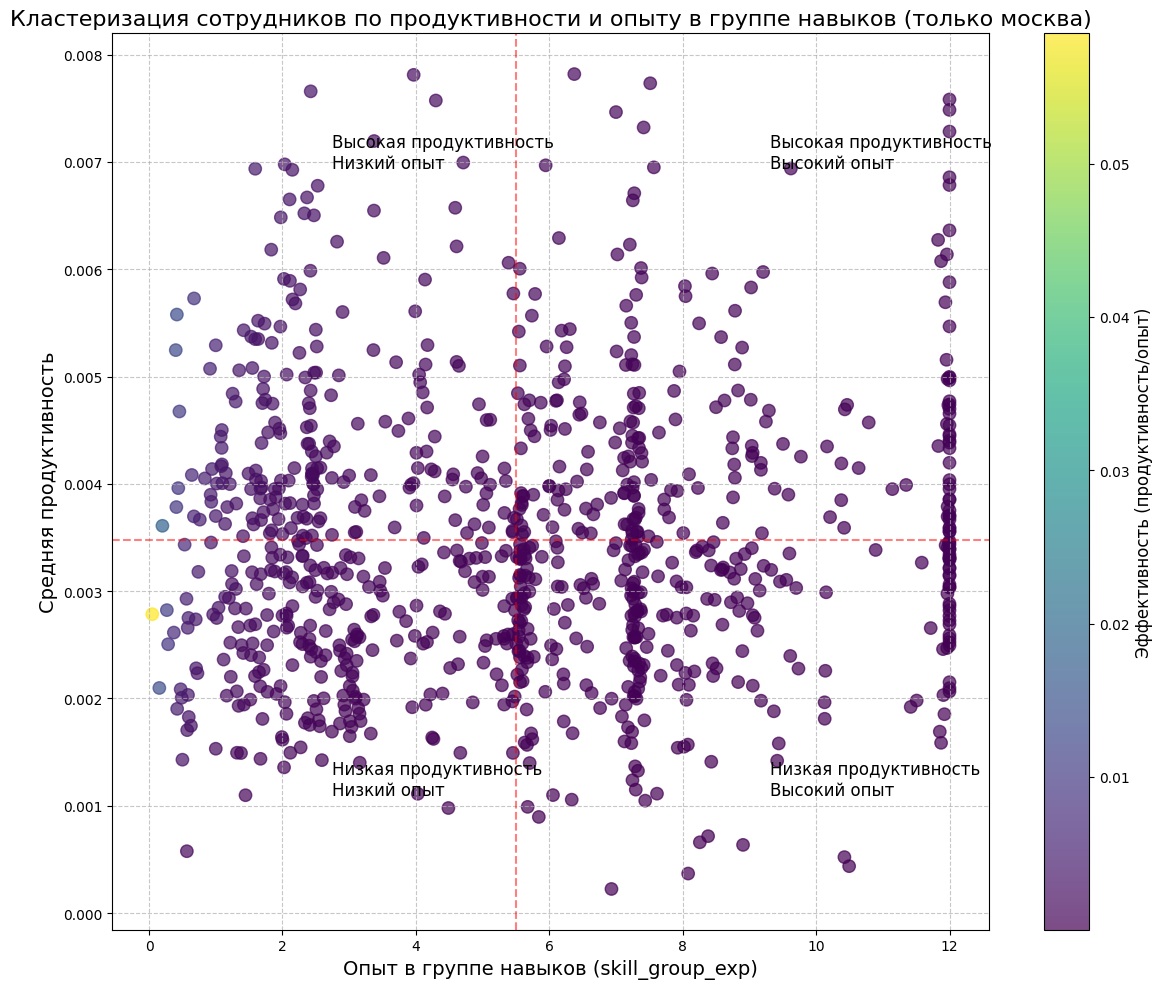

In [ ]:
plt.figure(figsize=(12, 10))


# Выбираем данные для кластеризации
cluster_data = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'skill_group_exp': 'mean' # Используем skill_group_exp вместо average_work_time
}).reset_index()

cluster_data =cluster_data[cluster_data['prod'] < 0.008]

# Создаем scatter plot
scatter = plt.scatter(
    cluster_data['skill_group_exp'],
    cluster_data['prod'],
    c=cluster_data['prod'] / cluster_data['skill_group_exp'],  # Эффективность как цвет
    cmap='viridis',
    alpha=0.7,
    s=80
)


# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Эффективность (продуктивность/опыт)', fontsize=12)


# Добавляем средние линии для разделения на квадранты
plt.axhline(y=cluster_data['prod'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axvline(x=cluster_data['skill_group_exp'].mean(), color='red', linestyle='--', alpha=0.5)


# Добавляем аннотации для квадрантов
plt.annotate('Высокая продуктивность\nНизкий опыт',xy=(0.25, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Высокая продуктивность\nВысокий опыт',xy=(0.75, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nНизкий опыт',xy=(0.25, 0.15), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nВысокий опыт',xy=(0.75, 0.15), xycoords='axes fraction', fontsize=12)


plt.title('Кластеризация сотрудников по продуктивности и опыту в группе навыков (только москва)', fontsize=16)
plt.xlabel('Опыт в группе навыков (skill_group_exp)', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Исходное количество сотрудников: 1879
Количество сотрудников после удаления выбросов: 476
Удалено выбросов: 1403 (74.7%)
Корреляция между продуктивностью и опытом: 0.0957


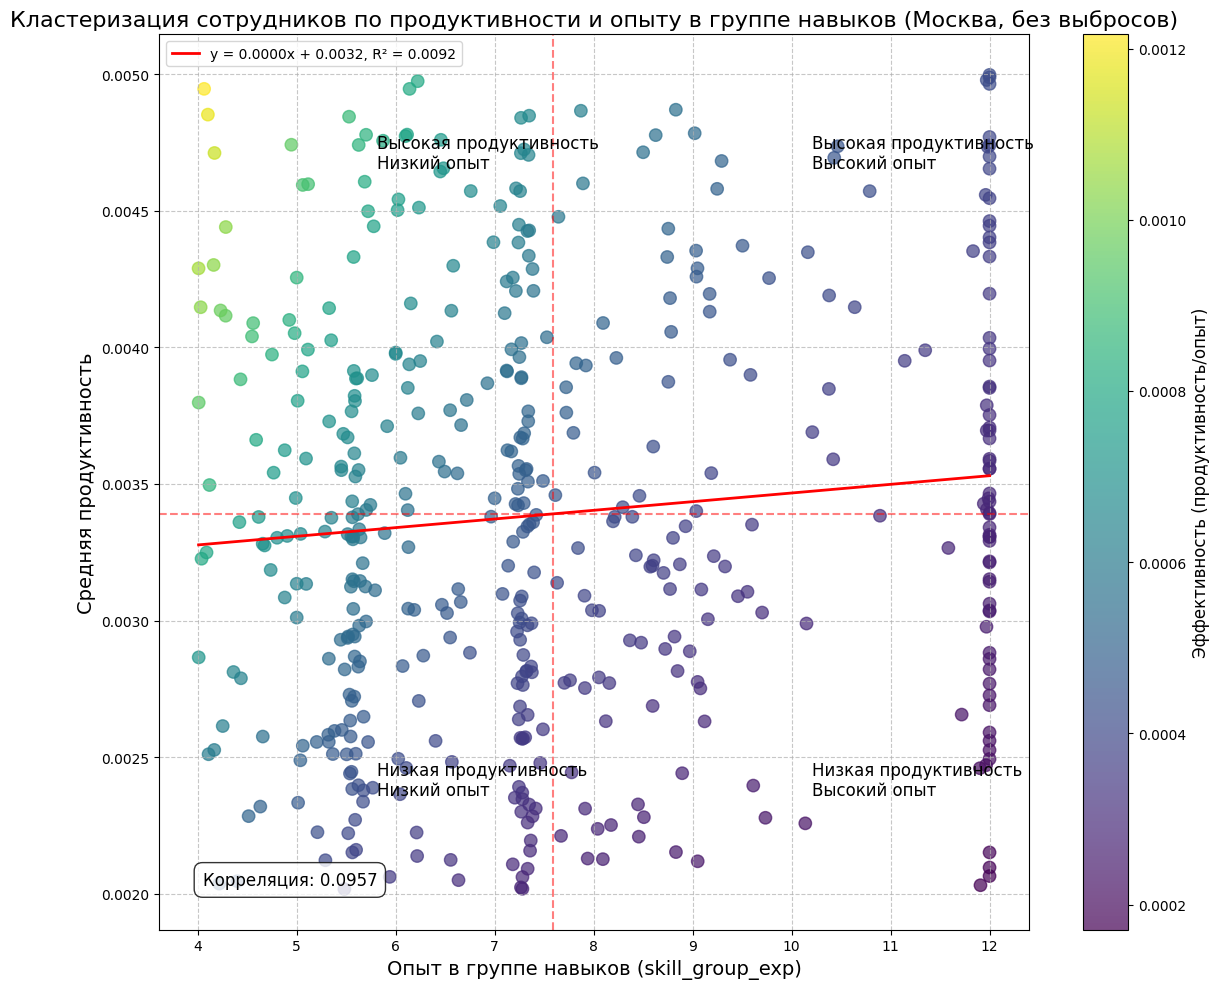

In [ ]:
plt.figure(figsize=(12, 10))

# Выбираем данные для кластеризации
cluster_data = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'skill_group_exp': 'mean'
}).reset_index()

# Очистка от выбросов с использованием IQR (межквартильного размаха)
# Для продуктивности
Q1_prod = cluster_data['prod'].quantile(0.25)
Q3_prod = cluster_data['prod'].quantile(0.75)
IQR_prod = Q3_prod - Q1_prod
lower_bound_prod = Q1_prod - 1.5 * IQR_prod
upper_bound_prod = Q3_prod + 1.5 * IQR_prod

# Для опыта
Q1_exp = cluster_data['skill_group_exp'].quantile(0.25)
Q3_exp = cluster_data['skill_group_exp'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
lower_bound_exp = Q1_exp - 1.5 * IQR_exp
upper_bound_exp = Q3_exp + 1.5 * IQR_exp

# Фильтруем данные без выбросов
filtered_data = cluster_data[
    (cluster_data['prod'] >= 0.002) & 
    (cluster_data['prod'] <= 0.005) &
    (cluster_data['skill_group_exp'] >= 4) & 
    (cluster_data['skill_group_exp'] <= 12)
]

print(f"Исходное количество сотрудников: {len(cluster_data)}")
print(f"Количество сотрудников после удаления выбросов: {len(filtered_data)}")
print(f"Удалено выбросов: {len(cluster_data) - len(filtered_data)} ({((len(cluster_data) - len(filtered_data)) / len(cluster_data) * 100):.1f}%)")

# Создаем scatter plot с очищенными данными
scatter = plt.scatter(
    filtered_data['skill_group_exp'],
    filtered_data['prod'],
    c=filtered_data['prod'] / filtered_data['skill_group_exp'],  # Эффективность как цвет
    cmap='viridis',
    alpha=0.7,
    s=80
)

# Добавляем регрессионную прямую
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    filtered_data['skill_group_exp'], 
    filtered_data['prod']
)

# Строим линию регрессии
x_values = np.array([filtered_data['skill_group_exp'].min(), filtered_data['skill_group_exp'].max()])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, 'r-', linewidth=2, 
         label=f'y = {slope:.4f}x + {intercept:.4f}, R² = {r_value**2:.4f}')

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Эффективность (продуктивность/опыт)', fontsize=12)

# Добавляем средние линии для разделения на квадранты
plt.axhline(y=filtered_data['prod'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axvline(x=filtered_data['skill_group_exp'].mean(), color='red', linestyle='--', alpha=0.5)

# Добавляем аннотации для квадрантов
plt.annotate('Высокая продуктивность\nНизкий опыт',
             xy=(0.25, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Высокая продуктивность\nВысокий опыт',
             xy=(0.75, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nНизкий опыт',
             xy=(0.25, 0.15), xycoords='axes fraction', fontsize=12)
plt.annotate('Низкая продуктивность\nВысокий опыт',
             xy=(0.75, 0.15), xycoords='axes fraction', fontsize=12)

# Добавляем информацию о корреляции
correlation = filtered_data['skill_group_exp'].corr(filtered_data['prod'])
plt.annotate(f'Корреляция: {correlation:.4f}',
             xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
print(f"Корреляция между продуктивностью и опытом: {correlation:.4f}")
plt.title('Кластеризация сотрудников по продуктивности и опыту в группе навыков (Москва, без выбросов)', fontsize=16)
plt.xlabel('Опыт в группе навыков (skill_group_exp)', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\3626174148.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Город')


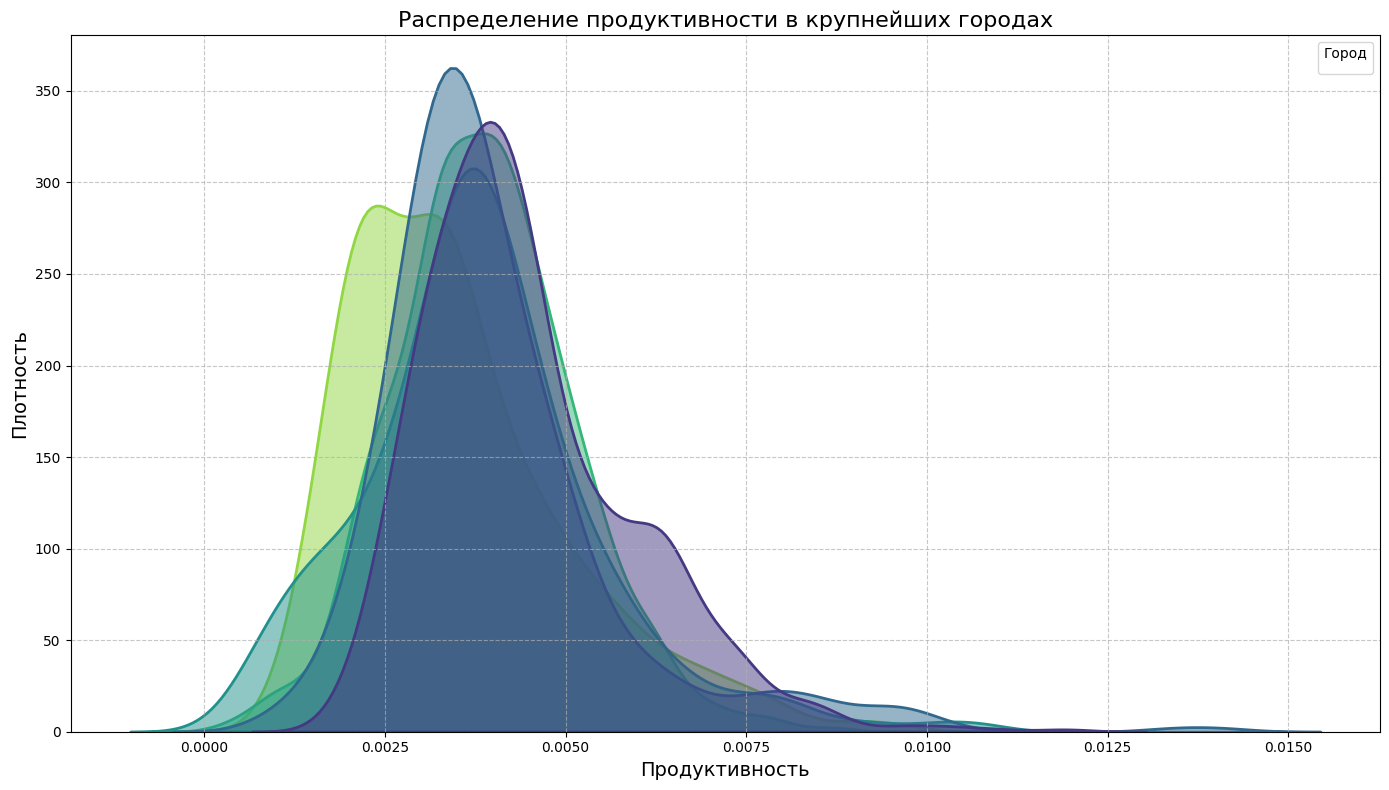

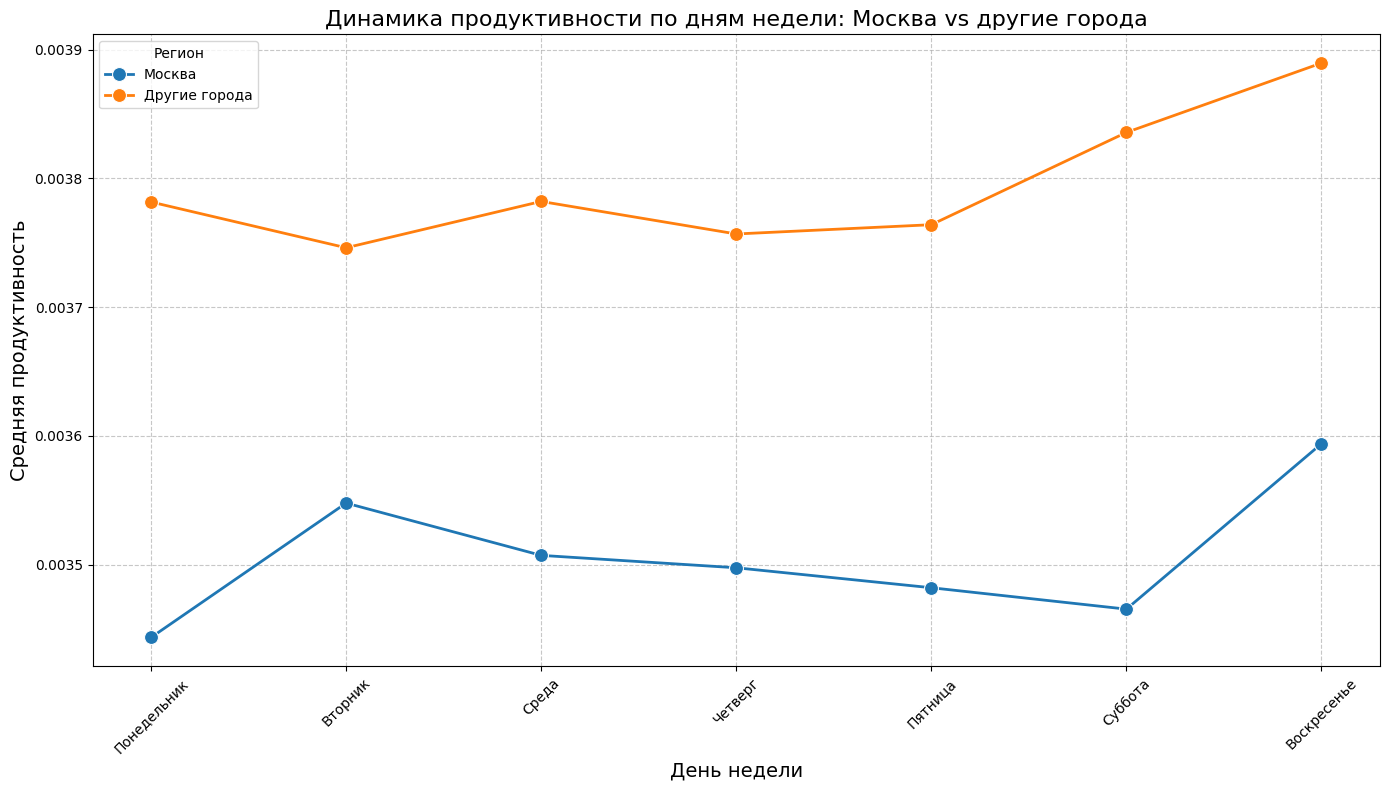

C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\3626174148.py:120: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_stats = moscow_df.groupby('exp_group').agg({
C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\3626174148.py:164: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


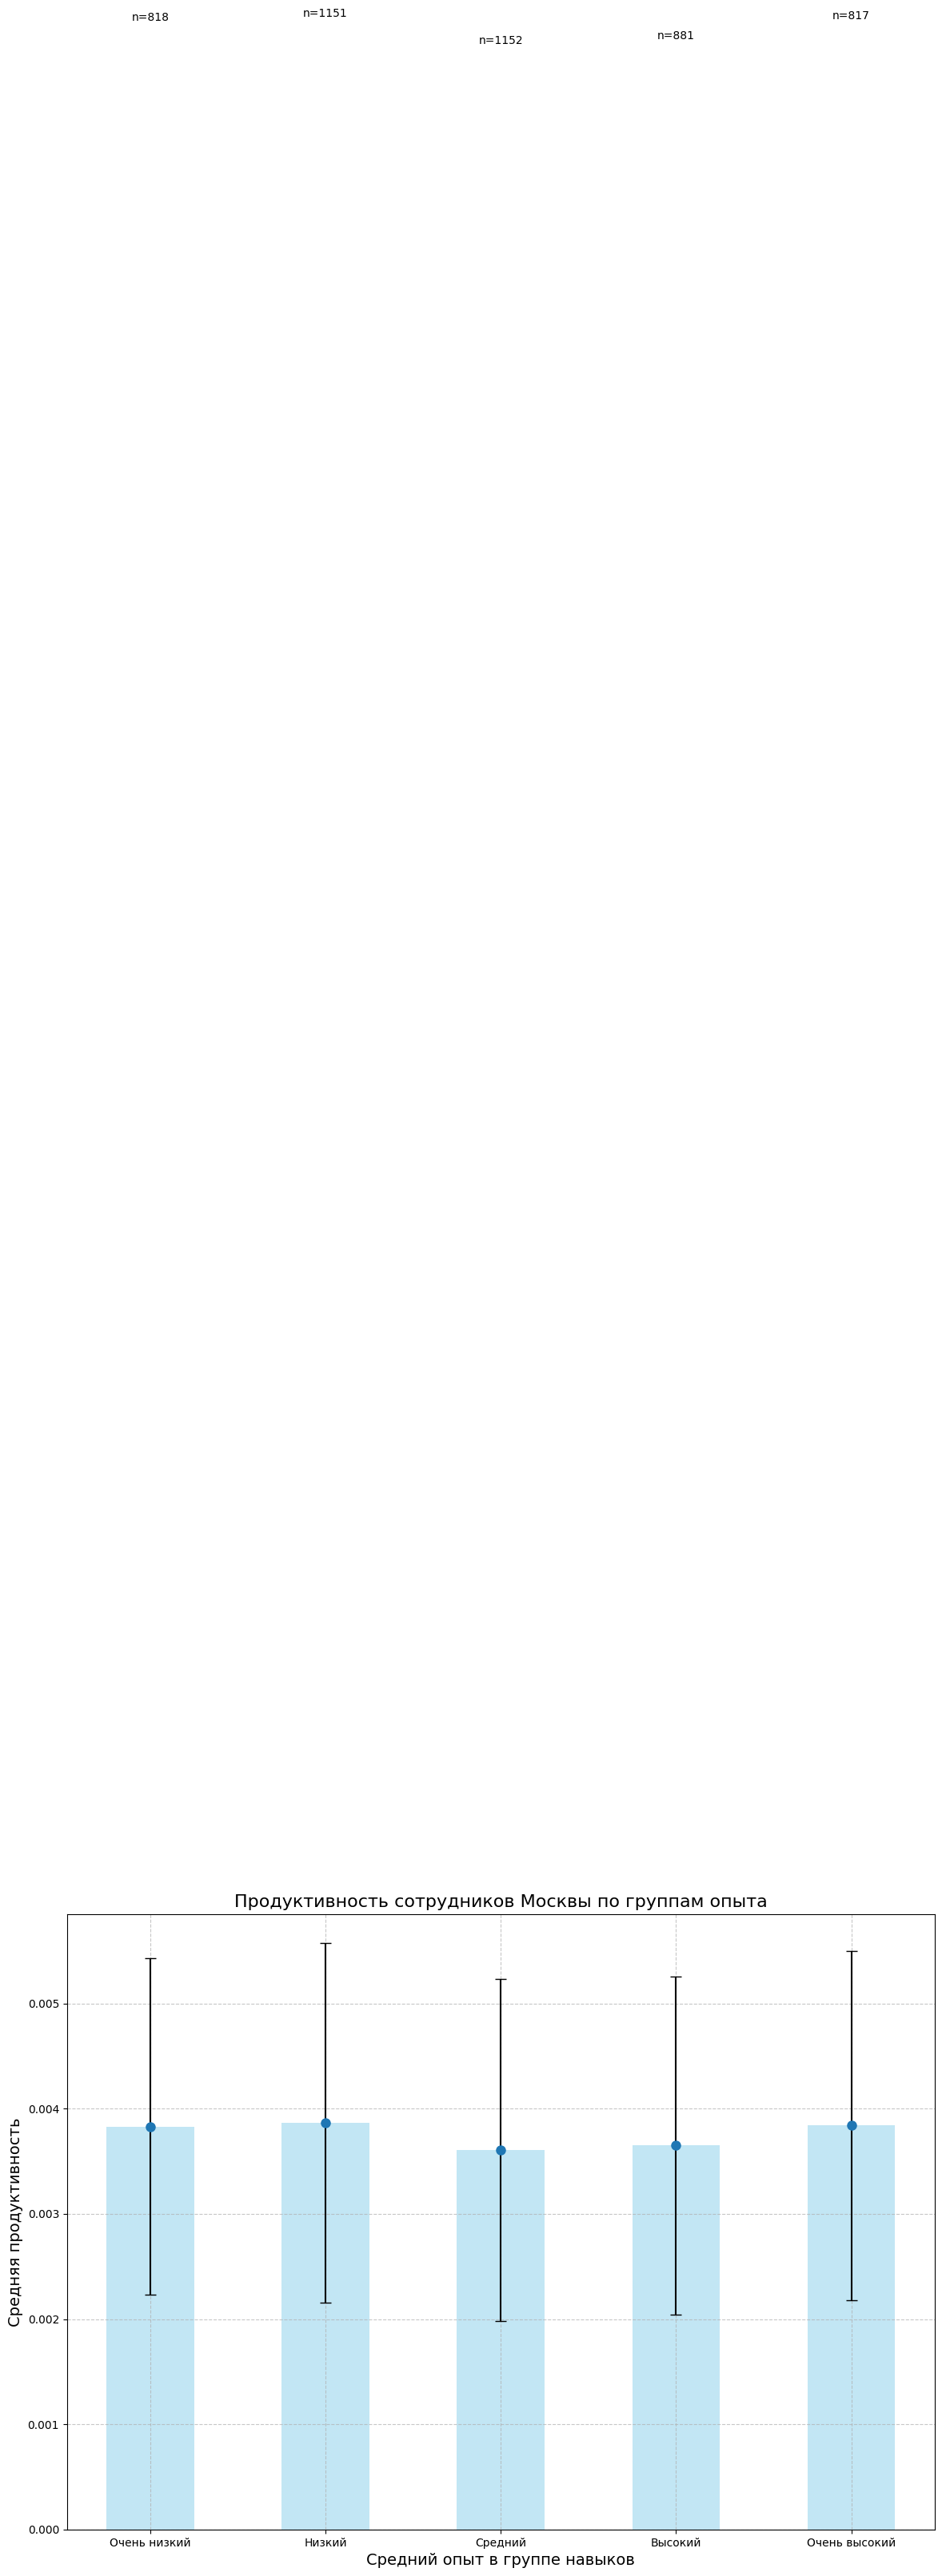

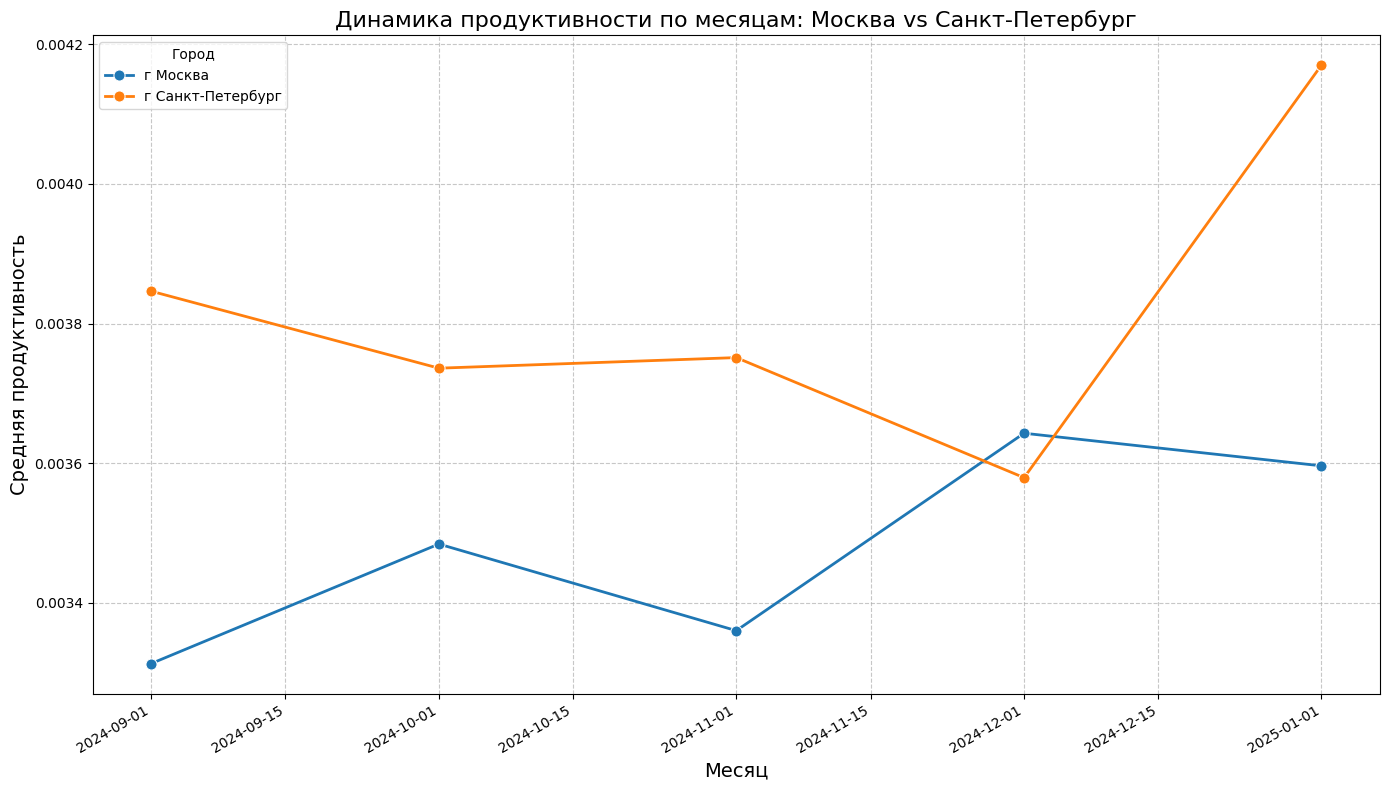

ValueError: Bin labels must be one fewer than the number of bin edges

<Figure size 1400x1000 with 0 Axes>

In [ ]:
# График 1: Сравнение распределения продуктивности в Москве и других крупных городах
plt.figure(figsize=(14, 8))

# Выбираем топ-5 городов по количеству сотрудников
top_cities = df['residential_city_nm'].value_counts().nlargest(5).index.tolist()
top_cities_df = df[df['residential_city_nm'].isin(top_cities)]

# Создаем KDE-plot для сравнения распределений
sns.kdeplot(
    data=top_cities_df, 
    x='prod', 
    hue='residential_city_nm',
    fill=True, 
    common_norm=False, 
    palette='viridis',
    alpha=0.5, 
    linewidth=2
)

plt.title('Распределение продуктивности в крупнейших городах', fontsize=16)
plt.xlabel('Продуктивность', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Город')
plt.tight_layout()
plt.show()

# График 2: Динамика продуктивности в Москве по дням недели в сравнении со средним по России
plt.figure(figsize=(14, 8))

# Добавляем день недели
df['day_of_week'] = df['calendar_dt'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_ru = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
day_translation = dict(zip(day_order, day_order_ru))
df['day_of_week_ru'] = df['day_of_week'].map(day_translation)

# Группируем данные по дням недели для Москвы и для всех остальных городов
moscow_weekday = df[df['residential_city_nm'] == 'г Москва'].groupby('day_of_week_ru')['prod'].mean()
other_weekday = df[df['residential_city_nm'] != 'г Москва'].groupby('day_of_week_ru')['prod'].mean()

# Создаем DataFrame для построения графика
weekday_df = pd.DataFrame({
    'День недели': day_order_ru,
    'Москва': [moscow_weekday.get(day, np.nan) for day in day_order_ru],
    'Другие города': [other_weekday.get(day, np.nan) for day in day_order_ru]
})

# Преобразуем в формат "длинных данных" для seaborn
weekday_df_long = pd.melt(weekday_df, id_vars=['День недели'], 
                          value_vars=['Москва', 'Другие города'],
                          var_name='Регион', value_name='Продуктивность')

# Строим линейный график
sns.lineplot(
    data=weekday_df_long,
    x='День недели',
    y='Продуктивность',
    hue='Регион',
    marker='o',
    markersize=10,
    linewidth=2
)

plt.title('Динамика продуктивности по дням недели: Москва vs другие города', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График 3: Сравнение продуктивности и опыта в разных районах Москвы
plt.figure(figsize=(14, 10))

# Проверяем, есть ли данные о районах Москвы
if 'district' in moscow_df.columns or 'area' in moscow_df.columns or 'region' in moscow_df.columns:
    # Используем соответствующую колонку с районами
    district_col = [col for col in ['district', 'area', 'region'] if col in moscow_df.columns][0]
    
    # Группируем по районам
    district_stats = moscow_df.groupby(district_col).agg({
        'prod': 'mean',
        'skill_group_exp': 'mean',
        'id_employee': 'nunique'  # Количество уникальных сотрудников
    }).reset_index()
    
    # Сортируем по количеству сотрудников и берем топ-10 районов
    district_stats = district_stats.sort_values('id_employee', ascending=False).head(10)
    
    # Создаем scatter plot с размером точек, пропорциональным количеству сотрудников
    plt.scatter(
        district_stats['skill_group_exp'],
        district_stats['prod'],
        s=district_stats['id_employee'] * 5,  # Размер точки зависит от количества сотрудников
        alpha=0.7,
        c=district_stats['prod'] / district_stats['skill_group_exp'],  # Цвет зависит от эффективности
        cmap='viridis'
    )
    
    # Добавляем подписи районов
    for i, row in district_stats.iterrows():
        plt.annotate(
            row[district_col],
            (row['skill_group_exp'], row['prod']),
            fontsize=10,
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )
    
    plt.colorbar(label='Эффективность (продуктивность/опыт)')
    plt.title('Сравнение продуктивности и опыта по районам Москвы', fontsize=16)
else:
    # Если данных о районах нет, строим альтернативный график
    # Группируем сотрудников Москвы по уровню опыта
    moscow_df['exp_group'] = pd.qcut(moscow_df['skill_group_exp'], 5, labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий'])
    
    exp_stats = moscow_df.groupby('exp_group').agg({
        'prod': ['mean', 'std', 'count'],
        'id_employee': 'nunique'
    })
    
    exp_stats.columns = ['Средняя продуктивность', 'Стандартное отклонение', 'Количество записей', 'Количество сотрудников']
    exp_stats = exp_stats.reset_index()
    
    # Создаем bar plot с error bars
    plt.errorbar(
        x=exp_stats['exp_group'],
        y=exp_stats['Средняя продуктивность'],
        yerr=exp_stats['Стандартное отклонение'],
        fmt='o',
        capsize=5,
        ecolor='black',
        markersize=8
    )
    
    # Добавляем bar plot
    bars = plt.bar(
        exp_stats['exp_group'],
        exp_stats['Средняя продуктивность'],
        alpha=0.5,
        color='skyblue',
        width=0.5
    )
    
    # Добавляем подписи с количеством сотрудников
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.02,
            f"n={exp_stats['Количество сотрудников'].iloc[i]}",
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    plt.title('Продуктивность сотрудников Москвы по группам опыта', fontsize=16)

plt.xlabel('Средний опыт в группе навыков', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# График 4: Сравнение продуктивности в Москве и Санкт-Петербурге по месяцам
plt.figure(figsize=(14, 8))

# Добавляем месяц и год
df['year_month'] = df['calendar_dt'].dt.to_period('M')

# Фильтруем данные только для Москвы и Санкт-Петербурга
msk_spb_df = df[df['residential_city_nm'].isin(['г Москва', 'г Санкт-Петербург'])]

# Группируем по городу и месяцу
city_month_prod = msk_spb_df.groupby(['residential_city_nm', 'year_month'])['prod'].mean().reset_index()
city_month_prod['year_month'] = city_month_prod['year_month'].dt.to_timestamp()

# Создаем линейный график
sns.lineplot(
    data=city_month_prod,
    x='year_month',
    y='prod',
    hue='residential_city_nm',
    marker='o',
    markersize=8,
    linewidth=2
)

plt.title('Динамика продуктивности по месяцам: Москва vs Санкт-Петербург', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Город')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# График 5: Зависимость продуктивности от опыта для разных возрастных групп в Москве
plt.figure(figsize=(14, 10))

# Проверяем, есть ли данные о возрасте
if 'age' in moscow_df.columns:
    # Создаем возрастные группы
    moscow_df['age_group'] = pd.cut(
        moscow_df['age'],
        bins=[0, 25, 35, 45, 55, 100],
        labels=['до 25', '25-35', '35-45', '45-55', '55+']
    )
    
    # Группируем данные по сотрудникам и возрастным группам
    age_exp_prod = moscow_df.groupby(['id_employee', 'age_group']).agg({
        'prod': 'mean',
        'skill_group_exp': 'mean'
    }).reset_index()
    
    # Создаем scatter plot с разными цветами для возрастных групп
    sns.lmplot(
        data=age_exp_prod,
        x='skill_group_exp',
        y='prod',
        hue='age_group',
        palette='viridis',
        height=8,
        aspect=1.5,
        scatter_kws={'alpha': 0.7, 's': 80},
        line_kws={'linewidth': 2}
    )
    
    plt.title('Зависимость продуктивности от опыта для разных возрастных групп в Москве', fontsize=16)
else:
    # Если данных о возрасте нет, группируем по уровню рабочего времени
    # Исправляем проблему с дубликатами в границах квантилей
    # Сначала проверим уникальность значений
    unique_work_times = moscow_df['average_work_time'].nunique()
    
    if unique_work_times < 5:
        # Если уникальных значений меньше 5, используем категории вручную
        moscow_df['work_time_group'] = pd.cut(
            moscow_df['average_work_time'],
            bins=[0, 3, 6, 9, 12, float('inf')],
            labels=['Очень низкое', 'Низкое', 'Среднее', 'Высокое', 'Очень высокое'],
            include_lowest=True
        )
    else:
        # Используем qcut с обработкой дубликатов
        moscow_df['work_time_group'] = pd.qcut(
            moscow_df['average_work_time'],
            5,
            labels=['Очень низкое', 'Низкое', 'Среднее', 'Высокое', 'Очень высокое'],
            duplicates='drop'
        )
    
    # Группируем данные по сотрудникам и группам рабочего времени
    work_exp_prod = moscow_df.groupby(['id_employee', 'work_time_group']).agg({
        'prod': 'mean',
        'skill_group_exp': 'mean'
    }).reset_index()
    
    # Создаем scatter plot с разными цветами для групп рабочего времени
    sns.lmplot(
        data=work_exp_prod,
        x='skill_group_exp',
        y='prod',
        hue='work_time_group',
        palette='viridis',
        height=8,
        aspect=1.5,
        scatter_kws={'alpha': 0.7, 's': 80},
        line_kws={'linewidth': 2}
    )
    
    plt.title('Зависимость продуктивности от опыта для разных групп рабочего времени в Москве', fontsize=16)

plt.xlabel('Опыт в группе навыков', fontsize=14)
plt.ylabel('Продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# График 6: Сравнение распределения эффективности (продуктивность/опыт) в Москве и других городах
plt.figure(figsize=(14, 8))

# Вычисляем эффективность для каждого сотрудника
employee_efficiency = df.groupby(['id_employee', 'residential_city_nm']).agg({
    'prod': 'mean',
    'skill_group_exp': 'mean'
}).reset_index()

# Добавляем колонку эффективности
employee_efficiency['efficiency'] = employee_efficiency['prod'] / employee_efficiency['skill_group_exp']

# Создаем категорию для Москвы и других городов
employee_efficiency['city_category'] = np.where
(employee_efficiency['residential_city_nm'] == 'г Москва', 'Москва', 'Другие города')
# Создаем boxplot
sns.boxplot(
    data=employee_efficiency,
    x='city_category',
    y='efficiency',
    palette='Set2')


C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\2397411254.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_stats = moscow_df.groupby('exp_group').agg({
C:\Users\Админ\AppData\Local\Temp\ipykernel_4024\2397411254.py:135: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


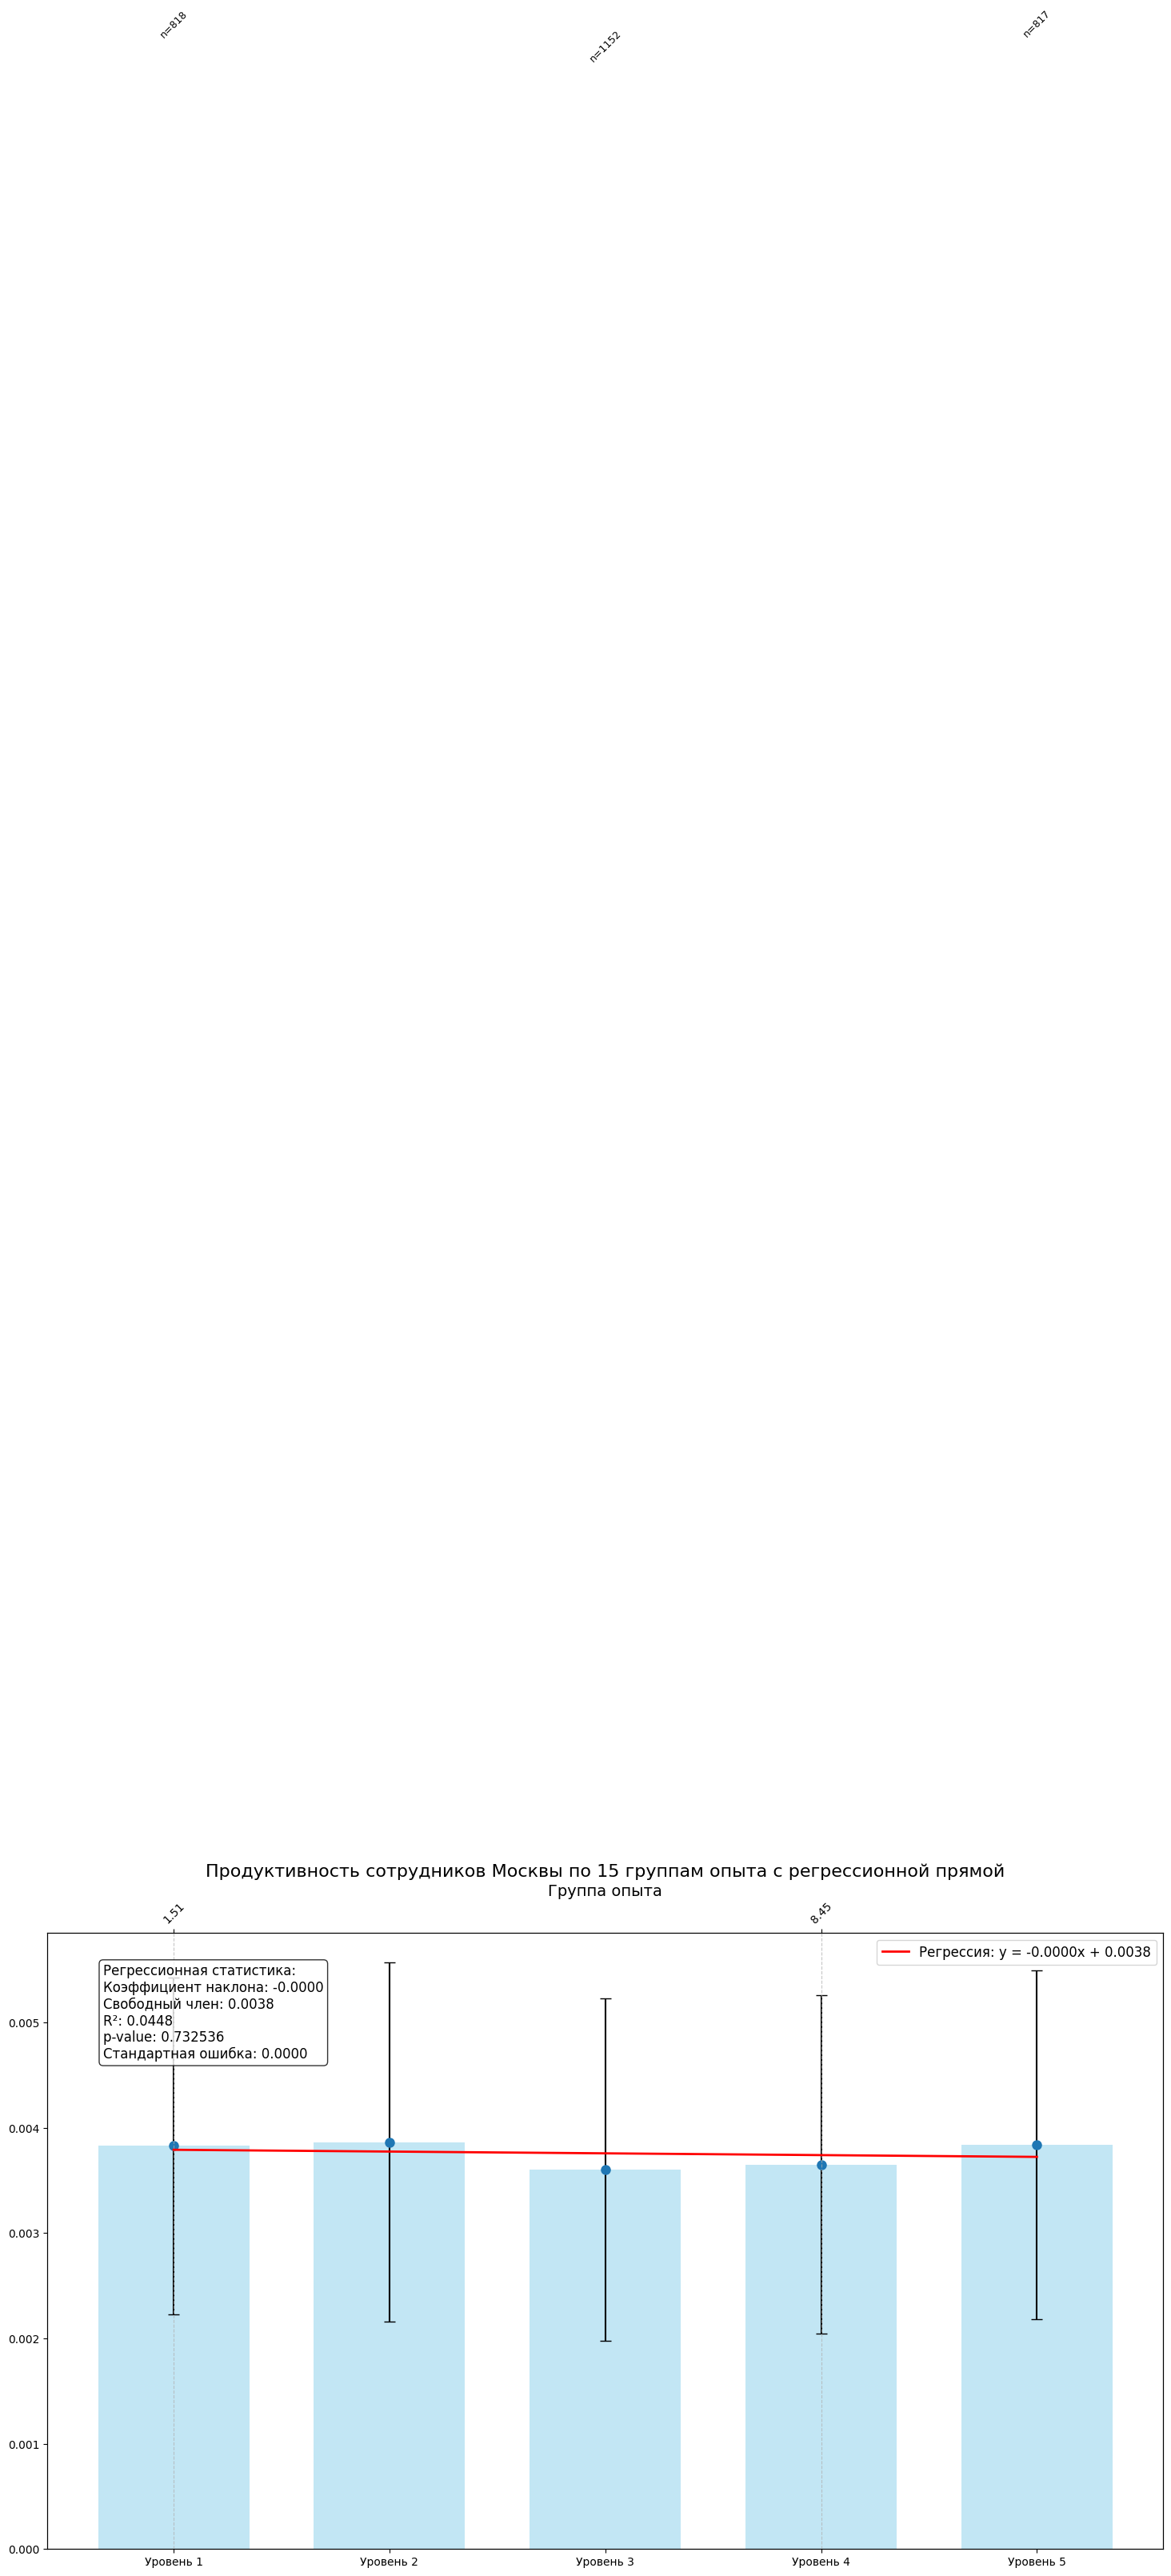


Анализ взаимосвязи между опытом и продуктивностью сотрудников в Москве:
Количество сотрудников в анализе: 1879
Корреляция Пирсона: nan (p-value: nan)
Корреляция Спирмена: nan (p-value: nan)

ВЫВОД:
Между опытом сотрудников и их продуктивностью в Москве наблюдается статистически незначимая слабая отрицательная связь.
Коэффициент детерминации (R²) составляет 0.0448, что означает, что 4.5% вариации
в продуктивности можно объяснить различиями в опыте сотрудников.
P-value (0.732536) больше 0.05, что указывает на отсутствие статистически значимой связи.
Нельзя с уверенностью утверждать, что опыт влияет на продуктивность сотрудников в Москве.

Проверка на нелинейную зависимость:
R² для линейной модели: 0.0448
R² для полиномиальной модели 2-й степени: 0.4301
Полиномиальная модель значительно лучше описывает данные, что указывает на нелинейную зависимость.


In [ ]:
from scipy import stats

# Создаем группы по опыту - теперь 15 групп вместо 5
try:
    # Пробуем использовать qcut с 15 группами
    moscow_df['exp_group'] = pd.qcut(
        moscow_df['skill_group_exp'], 
        5, 
        labels=[f'Уровень {i+1}' for i in range(5)],
        duplicates='drop'  # Обрабатываем возможные дубликаты
    )
except ValueError:
    # Если возникает ошибка из-за недостаточного количества уникальных значений,
    # используем меньшее количество групп
    n_groups = min(15, moscow_df['skill_group_exp'].nunique())
    print(f"Невозможно создать 15 групп, создаем {n_groups} групп")
    moscow_df['exp_group'] = pd.qcut(
        moscow_df['skill_group_exp'], 
        n_groups, 
        labels=[f'Уровень {i+1}' for i in range(n_groups)],
        duplicates='drop'
    )

# Агрегируем данные по группам опыта
exp_stats = moscow_df.groupby('exp_group').agg({
    'prod': ['mean', 'std', 'count'],
    'id_employee': 'nunique',
    'skill_group_exp': 'mean'  # Добавляем среднее значение опыта для каждой группы
})

exp_stats.columns = ['Средняя продуктивность', 'Стандартное отклонение', 'Количество записей',
                     'Количество сотрудников', 'Средний опыт']
exp_stats = exp_stats.reset_index()

# Создаем фигуру
plt.figure(figsize=(18, 10))

# Создаем bar plot с error bars
plt.errorbar(
    x=exp_stats['exp_group'],
    y=exp_stats['Средняя продуктивность'],
    yerr=exp_stats['Стандартное отклонение'],
    fmt='o',
    capsize=5,
    ecolor='black',
    markersize=8
)

# Добавляем bar plot
bars = plt.bar(
    exp_stats['exp_group'],
    exp_stats['Средняя продуктивность'],
    alpha=0.5,
    color='skyblue',
    width=0.7
)

# Добавляем подписи с количеством сотрудников (только для каждой второй группы, чтобы избежать перекрытия)
for i, bar in enumerate(bars):
    if i % 2 == 0:  # Показываем метки только для каждой второй группы
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.02,
            f"n={exp_stats['Количество сотрудников'].iloc[i]}",
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=45
        )

# Рассчитываем регрессию
x = exp_stats['Средний опыт'].values
y = exp_stats['Средняя продуктивность'].values

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Добавляем вторую ось X для отображения среднего опыта
ax1 = plt.gca()
ax2 = ax1.twiny()

# Устанавливаем позиции и метки для второй оси X
ax2.set_xlim(ax1.get_xlim())
# Показываем только каждую третью метку, чтобы избежать перекрытия
tick_positions = range(0, len(exp_stats), 3)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels([f"{exp_stats['Средний опыт'].iloc[i]:.2f}" for i in tick_positions])
ax2.set_xlabel('Средний опыт в группе (числовое значение)', fontsize=12)

# Создаем более детальную линию регрессии для плавного отображения
x_reg = np.linspace(min(x), max(x), 100)
y_reg = intercept + slope * x_reg

# Преобразуем значения x_reg для соответствия позициям на оси категорий
x_min, x_max = min(x), max(x)
x_reg_normalized = (x_reg - x_min) / (x_max - x_min) * (len(exp_stats) - 1)

# Добавляем линию регрессии на график
ax2.plot(
    x_reg_normalized,
    y_reg,
    'r-',
    linewidth=2,
    label=f'y = {slope:.4f}x + {intercept:.4f}'
)

# Добавляем информацию о регрессии в легенду
plt.legend([
    f'Регрессия: y = {slope:.4f}x + {intercept:.4f}',
    f'R² = {r_value**2:.4f}',
    f'p-value = {p_value:.6f}',
    f'Стандартная ошибка = {std_err:.4f}'
], loc='best', fontsize=12)

# Добавляем текстовую информацию о регрессии на график
plt.text(
    0.05, 0.95,
    f'Регрессионная статистика:\n'
    f'Коэффициент наклона: {slope:.4f}\n'
    f'Свободный член: {intercept:.4f}\n'
    f'R²: {r_value**2:.4f}\n'
    f'p-value: {p_value:.6f}\n'
    f'Стандартная ошибка: {std_err:.4f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.title('Продуктивность сотрудников Москвы по 15 группам опыта с регрессионной прямой', fontsize=16)
plt.xlabel('Группа опыта', fontsize=14)
plt.ylabel('Средняя продуктивность', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Поворачиваем метки для лучшей читаемости
plt.tight_layout()
plt.show()

# Дополнительно: рассчитываем корреляцию Пирсона между опытом и продуктивностью
# на уровне индивидуальных сотрудников для более точного анализа
employee_level_data = moscow_df.groupby('id_employee').agg({
    'prod': 'mean',
    'skill_group_exp': 'mean'
}).reset_index()

pearson_corr, pearson_p = stats.pearsonr(employee_level_data['skill_group_exp'], employee_level_data['prod'])
spearman_corr, spearman_p = stats.spearmanr(employee_level_data['skill_group_exp'], employee_level_data['prod'])

print("\nАнализ взаимосвязи между опытом и продуктивностью сотрудников в Москве:")
print(f"Количество сотрудников в анализе: {len(employee_level_data)}")
print(f"Корреляция Пирсона: {pearson_corr:.4f} (p-value: {pearson_p:.6f})")
print(f"Корреляция Спирмена: {spearman_corr:.4f} (p-value: {spearman_p:.6f})")

# Интерпретация результатов
print("\nВЫВОД:")
if p_value < 0.05:
    significance = "статистически значимая"
else:
    significance = "статистически незначимая"

if r_value**2 < 0.3:
    strength = "слабая"
elif r_value**2 < 0.6:
    strength = "умеренная"
else:
    strength = "сильная"

if slope > 0:
    direction = "положительная"
else:
    direction = "отрицательная"

print(f"Между опытом сотрудников и их продуктивностью в Москве наблюдается {significance} {strength} {direction} связь.")
print(f"Коэффициент детерминации (R²) составляет {r_value**2:.4f}, что означает, что {r_value**2*100:.1f}% вариации")
print(f"в продуктивности можно объяснить различиями в опыте сотрудников.")

if p_value < 0.05:
    print(f"P-value ({p_value:.6f}) меньше 0.05, что указывает на статистическую значимость результатов.")
    print(f"С увеличением опыта на 1 единицу, продуктивность в среднем изменяется на {slope:.4f} единиц.")
else:
    print(f"P-value ({p_value:.6f}) больше 0.05, что указывает на отсутствие статистически значимой связи.")
    print("Нельзя с уверенностью утверждать, что опыт влияет на продуктивность сотрудников в Москве.")

if pearson_p < 0.05 and spearman_p < 0.05:
    print("\nАнализ на уровне индивидуальных сотрудников также подтверждает наличие статистически значимой связи.")
    print(f"Корреляция Пирсона ({pearson_corr:.4f}) и Спирмена ({spearman_corr:.4f}) указывают на")
    if abs(pearson_corr - spearman_corr) > 0.1:
        print("существенные различия между линейной и ранговой корреляцией, что может говорить о нелинейной связи.")
    else:
        print("схожие значения, что подтверждает характер выявленной линейной зависимости.")

# Дополнительно: проверка на нелинейную зависимость
print("\nПроверка на нелинейную зависимость:")

# Полиномиальная регрессия 2-й степени
poly_features = np.column_stack((x, x**2))
poly_model = np.polyfit(x, y, 2)
poly_y = np.polyval(poly_model, x_reg)

# Рассчитываем R² для полиномиальной модели
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - np.polyval(poly_model, x))**2)
r_squared_poly = 1 - (ss_residual / ss_total)

print(f"R² для линейной модели: {r_value**2:.4f}")
print(f"R² для полиномиальной модели 2-й степени: {r_squared_poly:.4f}")

if r_squared_poly > r_value**2 + 0.1:
    print("Полиномиальная модель значительно лучше описывает данные, что указывает на нелинейную зависимость.")
elif r_squared_poly > r_value**2:
    print("Полиномиальная модель немного лучше описывает данные, возможна слабая нелинейная зависимость.")
else:
    print("Линейная модель адекватно описывает данные, нет существенных признаков нелинейной зависимости.")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Предполагаем, что данные уже загружены в DataFrame df
# Проверим наличие столбца 'prod' в данных
if 'prod' not in df.columns:
    raise ValueError("Столбец 'prod' не найден в данных")

# Получим список всех параметров, кроме 'prod'
other_params = [col for col in df.columns if col != 'prod']

# Создадим словарь для хранения результатов
results = {}

# Выполним линейную регрессию для каждого параметра отдельно
plt.figure(figsize=(20, 15))
for i, param in enumerate(other_params):
    print(f"Обработка параметра: {param}")
    
    # Создаем временный DataFrame без пропущенных значений
    temp_df = df[[param, 'prod']].dropna()
    
    # Проверяем, что у нас достаточно данных
    if len(temp_df) < 2:
        print(f"Недостаточно данных для параметра {param}")
        continue
    
    # Проверяем тип данных
    if pd.api.types.is_datetime64_any_dtype(temp_df[param]):
        # Преобразуем datetime в числовой формат (timestamp в секундах)
        temp_df['param_numeric'] = temp_df[param].map(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
        X = temp_df['param_numeric'].values.reshape(-1, 1)
    else:
        # Для числовых данных используем их напрямую
        X = temp_df[param].values.reshape(-1, 1)
    
    y = temp_df['prod'].values
    
    # Обучаем модель
    model = LinearRegression()
    model.fit(X, y)
    
    # Предсказания
    y_pred = model.predict(X)
    
    # Сохраняем результаты
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results[param] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r2': r2,
        'rmse': rmse,
        'sample_size': len(temp_df)
    }
    
    # Визуализация
    plt.subplot(4, 4, i+1)
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(f'{param} vs prod\nR²: {r2:.3f}, RMSE: {rmse:.3f}')
    plt.xlabel(param)
    plt.ylabel('prod')

plt.tight_layout()
plt.show()

# Вывод результатов в виде таблицы
results_df = pd.DataFrame({
    'Parameter': list(results.keys()),
    'Coefficient': [results[param]['coefficient'] for param in results],
    'Intercept': [results[param]['intercept'] for param in results],
    'R²': [results[param]['r2'] for param in results],
    'RMSE': [results[param]['rmse'] for param in results],
    'Sample Size': [results[param]['sample_size'] for param in results]
})

# Сортировка по R²
results_df = results_df.sort_values('R²', ascending=False)
print("Результаты линейной регрессии для каждого параметра:")
print(results_df)

# Визуализация R² для всех параметров
plt.figure(figsize=(12, 8))
sns.barplot(x='R²', y='Parameter', data=results_df)
plt.title('Коэффициент детерминации (R²) для каждого параметра')
plt.xlabel('R²')
plt.ylabel('Параметр')
plt.tight_layout()
plt.show()

# Визуализация коэффициентов
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Parameter', data=results_df)
plt.title('Коэффициенты линейной регрессии для каждого параметра')
plt.xlabel('Коэффициент')
plt.ylabel('Параметр')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Теперь построим множественную линейную регрессию со всеми параметрами
print("\nМножественная линейная регрессия со всеми параметрами:")

# Создаем копию данных
df_multi = df.copy()

# Преобразуем datetime столбцы в числовой формат
for col in other_params:
    if pd.api.types.is_datetime64_any_dtype(df_multi[col]):
        df_multi[col] = df_multi[col].map(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# Удаляем строки с пропущенными значениями
df_multi_clean = df_multi.dropna()

if len(df_multi_clean) < len(other_params) + 1:
    print("Недостаточно данных для множественной регрессии после удаления пропущенных значений.")
    print(f"Доступно строк: {len(df_multi_clean)}, требуется минимум: {len(other_params) + 1}")
else:
    # Подготовка данных
    X_multi = df_multi_clean[other_params]
    y_multi = df_multi_clean['prod']
    
    # Обучаем модель
    model_multi = LinearRegression()
    model_multi.fit(X_multi, y_multi)
    
    # Предсказания
    y_pred_multi = model_multi.predict(X_multi)
    
    # Оценка модели
    r2_multi = r2_score(y_multi, y_pred_multi)
    rmse_multi = np.sqrt(mean_squared_error(y_multi, y_pred_multi))
    
    print(f"R² множественной регрессии: {r2_multi:.3f}")
    print(f"RMSE множественной регрессии: {rmse_multi:.3f}")
    
    # Создаем DataFrame с коэффициентами
    multi_coef_df = pd.DataFrame({
        'Parameter': other_params,
        'Coefficient': model_multi.coef_
    })
    multi_coef_df = multi_coef_df.sort_values('Coefficient', key=abs, ascending=False)
    
    print("\nКоэффициенты множественной регрессии:")
    print(multi_coef_df)
    print(f"Константа (intercept): {model_multi.intercept_}")
    
    # Визуализация коэффициентов множественной регрессии
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Parameter', data=multi_coef_df)
    plt.title('Коэффициенты множественной линейной регрессии')
    plt.xlabel('Коэффициент')
    plt.ylabel('Параметр')
    plt.axvline(x=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Визуализация предсказанных vs фактических значений
    plt.figure(figsize=(8, 8))
    plt.scatter(y_multi, y_pred_multi, alpha=0.5)
    plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--')
    plt.xlabel('Фактические значения prod')
    plt.ylabel('Предсказанные значения prod')
    plt.title(f'Предсказанные vs Фактические значения\nR²: {r2_multi:.3f}')
    plt.tight_layout()
    plt.show()


print(len(df[df["skill_group_exp"] == 17]))


ValueError: Столбец 'prod' не найден в данных